<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li><li><span><a href="#Тестируем-модель" data-toc-modified-id="Тестируем-модель-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Тестируем модель</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Вывод-по-результатам-исследования" data-toc-modified-id="Вывод-по-результатам-исследования-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод по результатам исследования</a></span></li></ul></div>

# Отток клиентов

Источник данных: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

## Описание данных

Признаки:

    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — количество недвижимости у клиента
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата
    
Целевой признак:

    Exited — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math
import datetime as dt
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import plotly.graph_objs as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans

%config InlineBackend.figure_format='retina'
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_colwidth = 600

In [2]:
try:
    df = pd.read_csv('/content/drive/My Drive/Diploma/Churn_Modelling.csv',  sep=',')
except:
    df = pd.read_csv('Churn_Modelling.csv',  sep=',')

In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [6]:
# Проверим наличие дубликатов

df.duplicated().sum()

0

In [7]:
# Проверим пустые значения

df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [9]:
# посмотрим на распределения всех признаков
def view(data, hue=None):
    #дискретные значения
    for column in ['Geography','Gender', 'HasCrCard', 'IsActiveMember', 'Tenure', 'NumOfProducts', 'Exited']:
        ax = sns.countplot(data=data, x=column, hue=hue);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize = 15, color = 'black')
        plt.show()
    #распределение по возрасту
    plt.figure(figsize=(15,7))
    sns.countplot(data=data, x='Age', hue=hue);
    plt.title('Распределение клиентов по признаку Age', fontsize = 15, color = 'black')
    plt.show()

    #непрерывные значения
    for column in ['CreditScore', 'Balance', 'EstimatedSalary']:
        sns.kdeplot(data=data, x=column, hue=hue);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize = 15, color = 'black')
        plt.show()

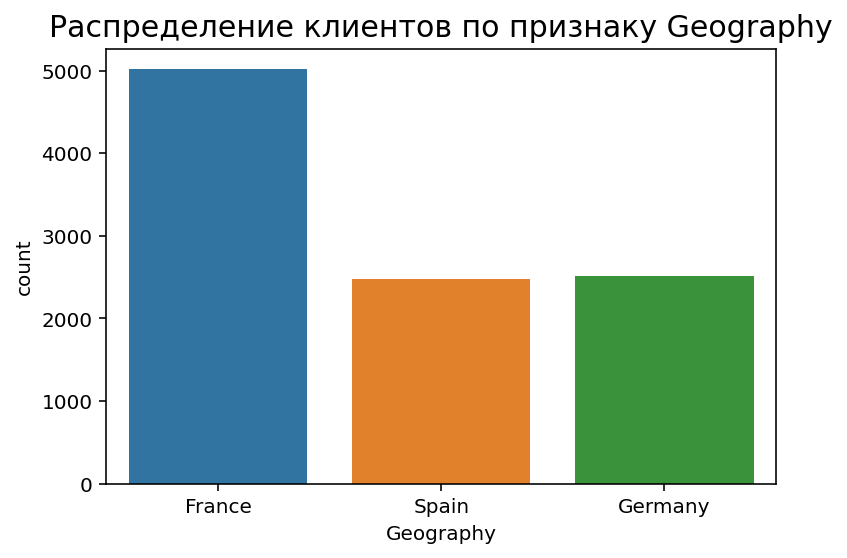

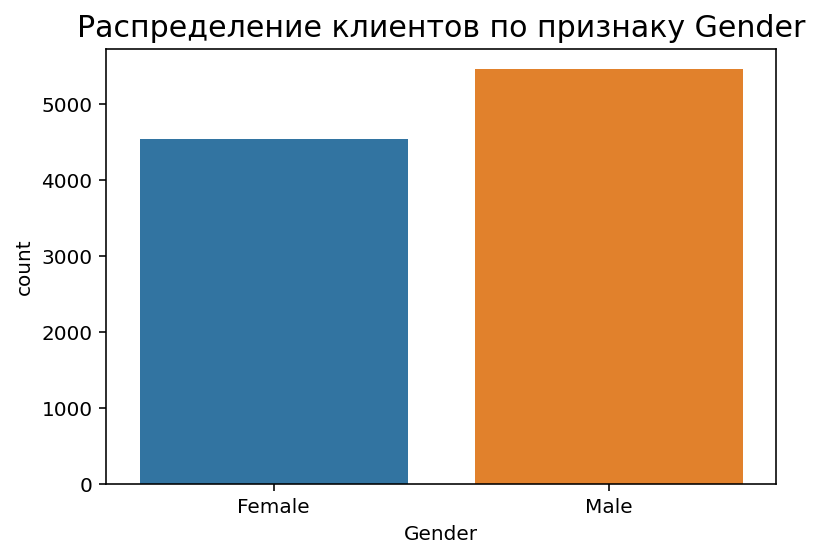

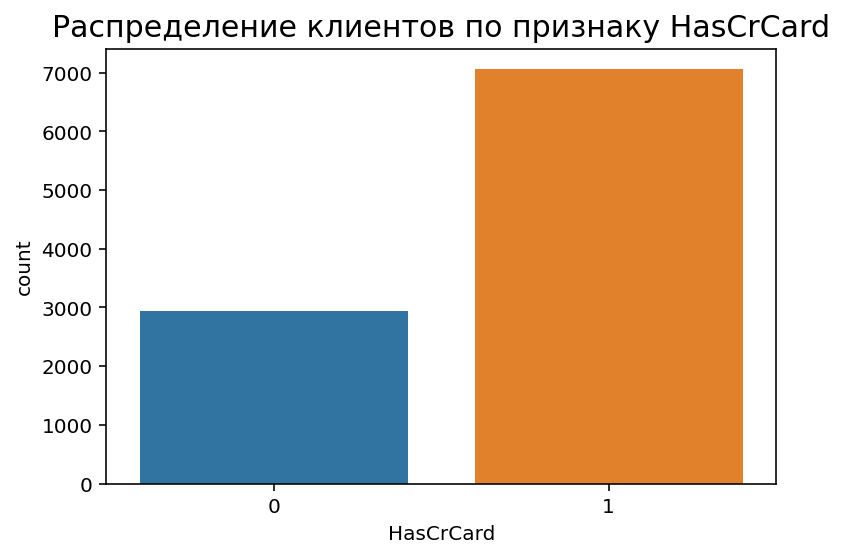

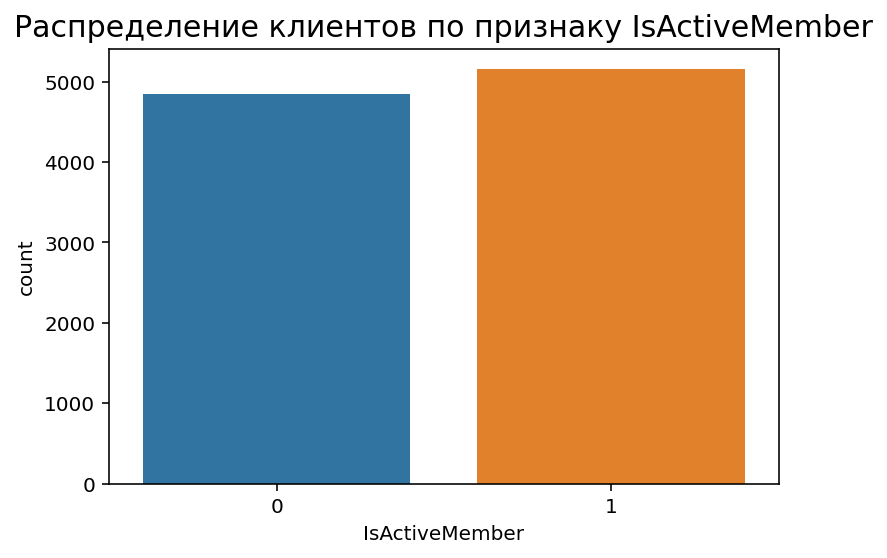

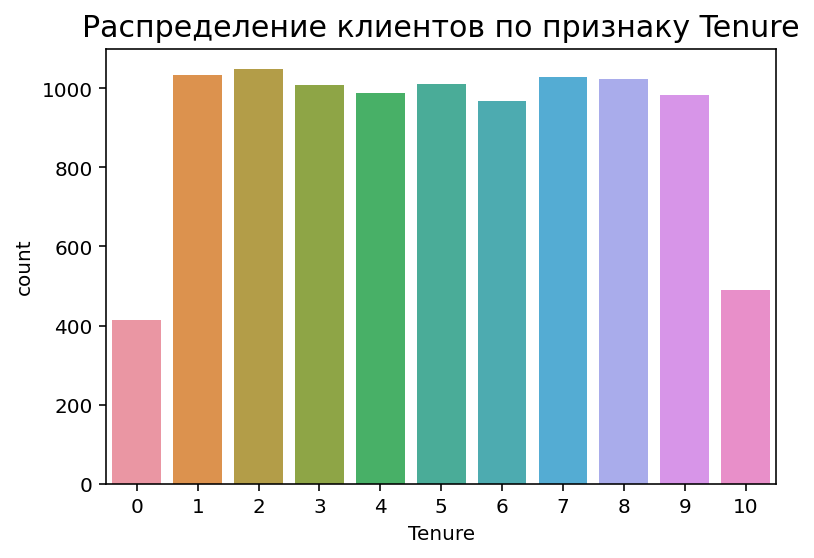

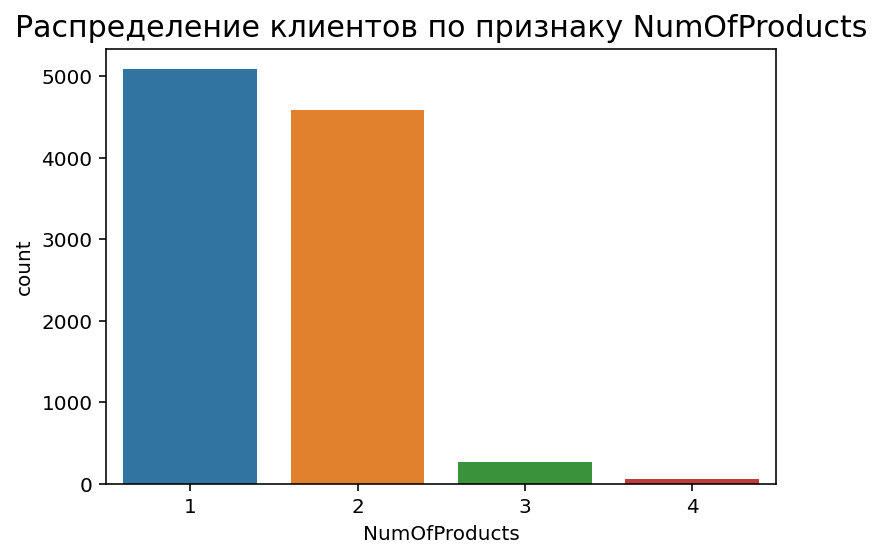

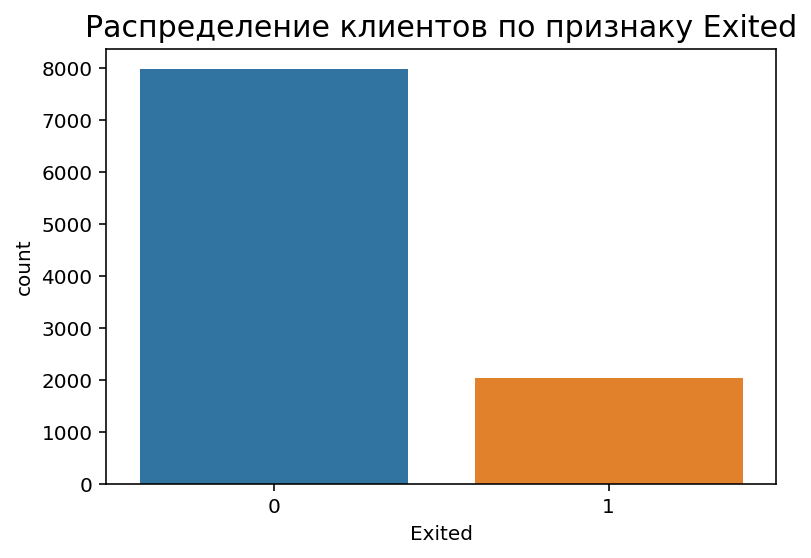

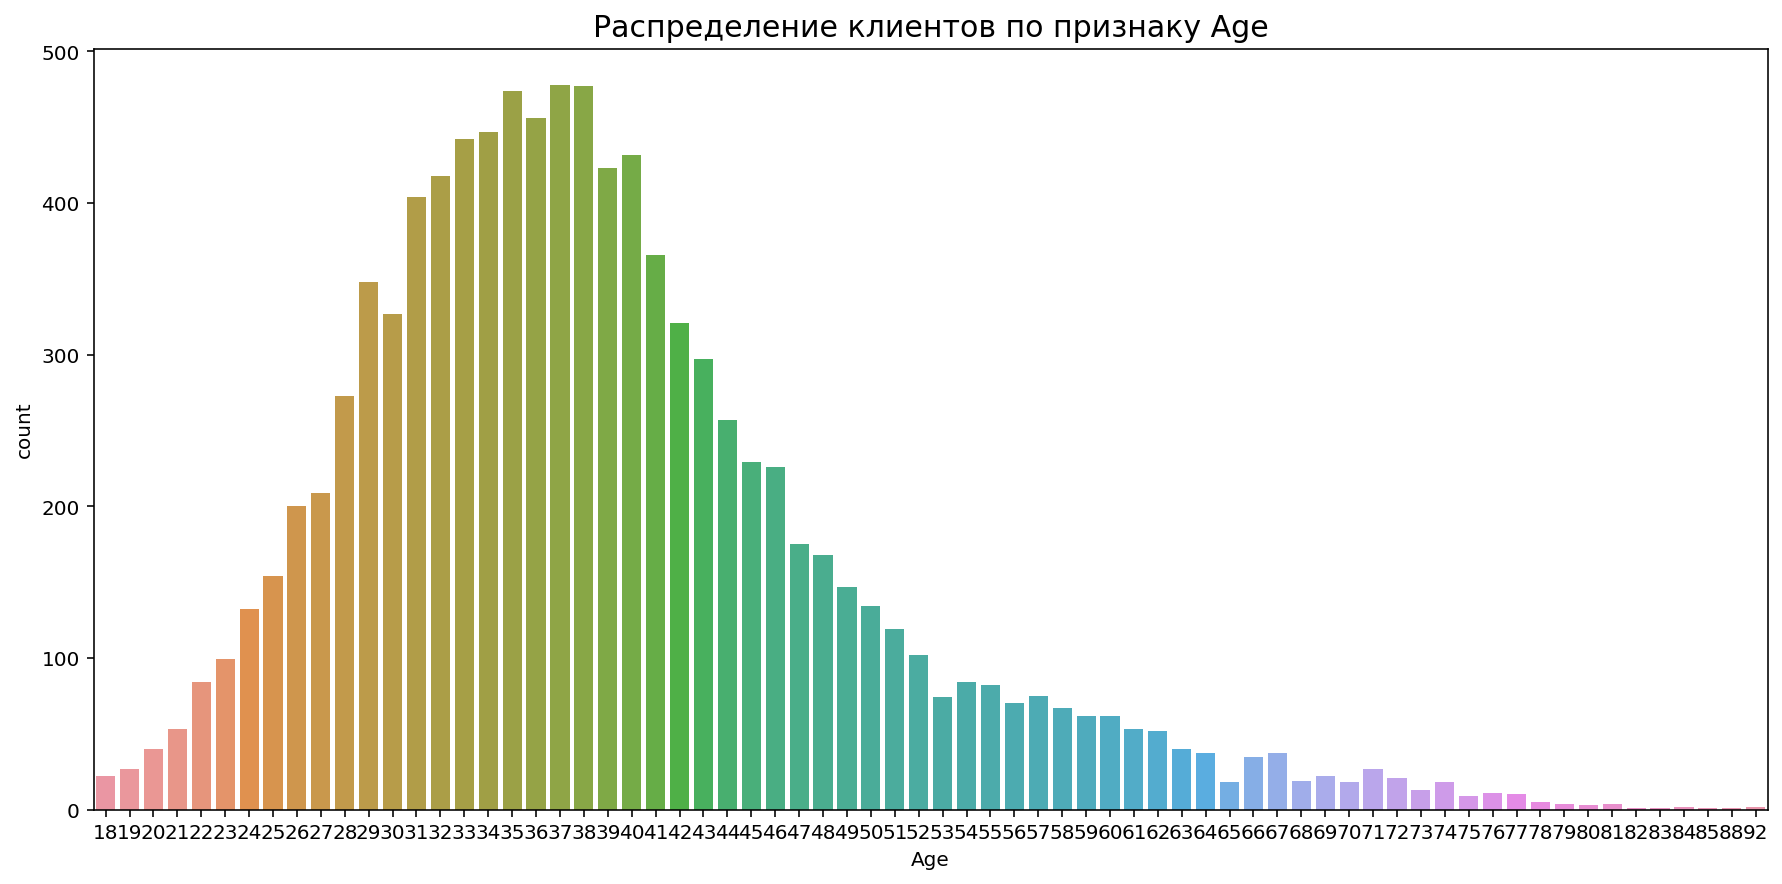

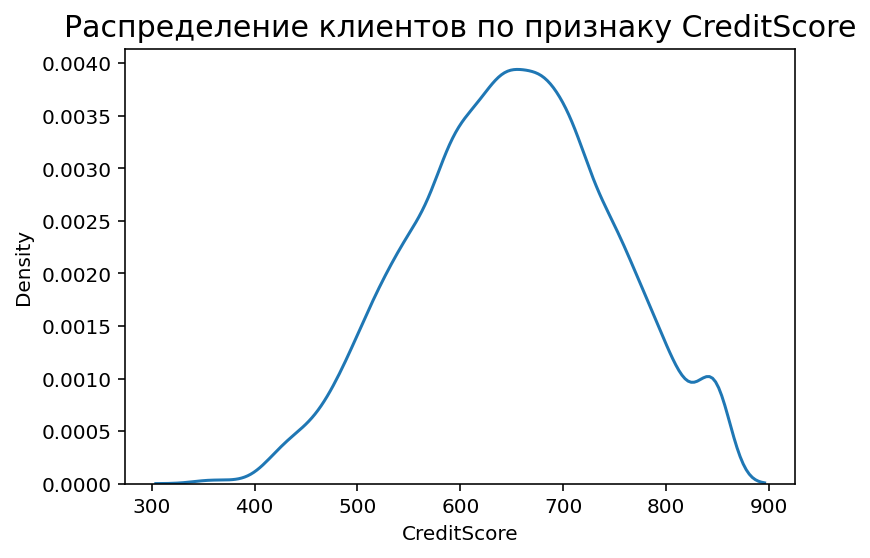

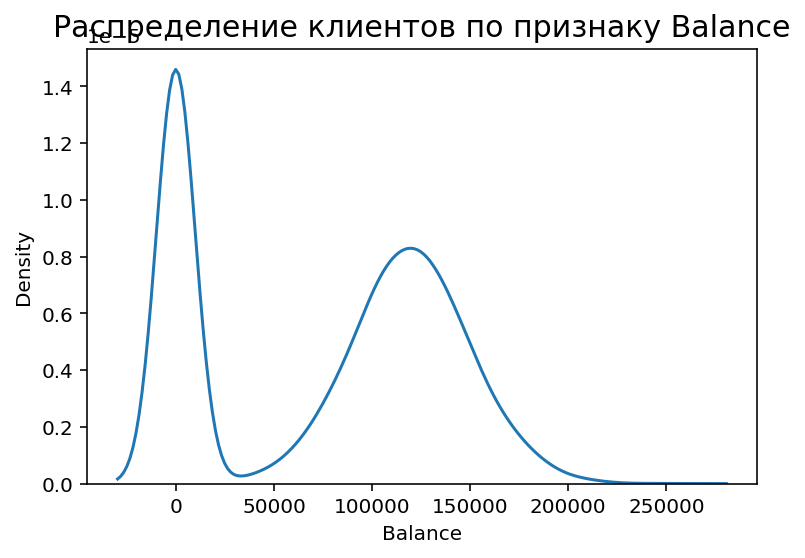

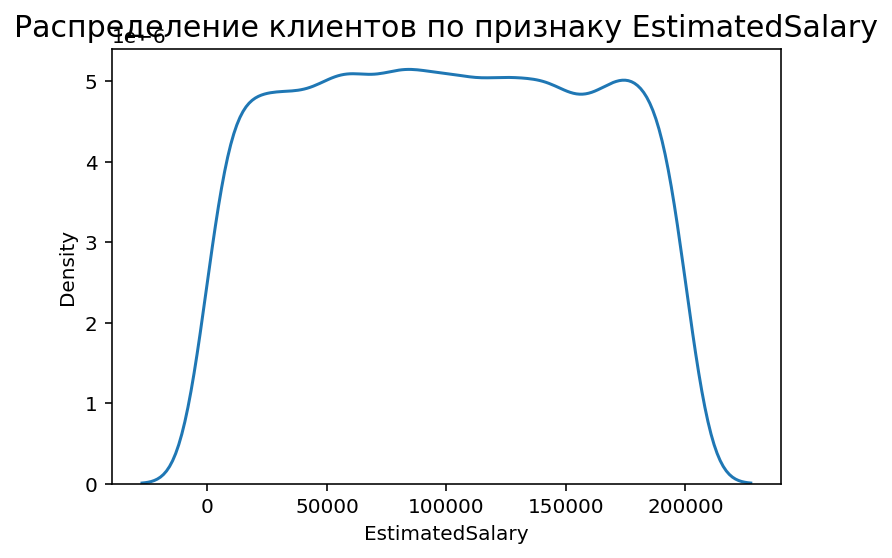

In [10]:
# визуализация
view(df, hue=None) 

### Вывод по первчиному анализу данных: 

- в датасете 13 столбцов по 10000 записей 
- в датасете отсутствуют явные дубликаты
- пропуски не были найдены
- все названия столбцов следует перевести в нижний змеиный регистр

**По распределению признаков можно сказать:**

- у нас есть филиалы в трех странах, из них больше всего клиентов во Франции, в Испании и Германии примерно одинаковое кол-во
- по гендеру - больше мужчин, чем женщин
- клиентов с кредитными картами больше
- лояльнсть у клиентов примерно одинаковая, хотя лояльных клиентов больше
- кол-во объектов - большие значения, но в среднем 5 объектов недвижимости 
- у банка 4 продукта, пользователи пользуются в основном 1-2 продуктами
- ушедших клиентов не так мало, но оставшихся значительная часть
- возраст клиентов от 18 до 92 лет
- график кредитного рейтинга можно сказать распределен нормально
- в графике баланса есть скачок на нулевом значении, значит у клиентов ничего не лежит на балансе
- зп клиентов в среднем 100 тыс. руб.

## Предобработка данных

In [11]:
# перевод названий столбцов в нижний змеиный регистр 
df.columns = df.columns.str.replace(r'(?<!^)(?=[A-Z])', '_').str.lower()
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [12]:
# #перевод к числовому типу, обозначим женский пол - 0, мужской - 1

# #замена значений "Male" на 1, "Female" на 0:
# df.loc[df['gender']=='Male', 'gender'] = 1
# df.loc[df['gender']=='Female','gender'] = 0

# #приведем к типу данных int:
# df['gender'] = df['gender'].astype(int)

In [13]:
df.head(10)

row_number  customer_id   surname  credit_score geography  gender  age  \
0           1     15634602  Hargrave           619    France  Female   42   
1           2     15647311      Hill           608     Spain  Female   41   
2           3     15619304      Onio           502    France  Female   42   
3           4     15701354      Boni           699    France  Female   39   
4           5     15737888  Mitchell           850     Spain  Female   43   
5           6     15574012       Chu           645     Spain    Male   44   
6           7     15592531  Bartlett           822    France    Male   50   
7           8     15656148    Obinna           376   Germany  Female   29   
8           9     15792365        He           501    France    Male   44   
9          10     15592389        H?           684    France    Male   27   

   tenure    balance  num_of_products  has_cr_card  is_active_member  \
0       2       0.00                1            1                 1   
1       1   83807.86                1            0                 1   
2       8  159660.80                3            1                 0   
3       1       0.00                2            0                 0   
4       2  125510.82                1            1                 1   
5       8  113755.78                2            1                 0   
6       7       0.00                2            1                 1   
7       4  115046.74                4            1                 0   
8       4  142051.07                2            0                 1   
9       2  134603.88                1            1                 1   

   estimated_salary  exited  
0         101348.88       1  
1         112542.58       0  
2         113931.57       1  
3          93826.63       0  
4          79084.10       0  
5         149756.71       1  
6          10062.80       0  
7         119346.88       1  
8          74940.50       0  
9          71725.73       0

Чтобы понять природу скачка на нулевом балансе клиентов и более корректно обработать их в столбце баланса необходимо обратить вниманание на остальные признаки клиентов, у которых были обнаружены эти пропуски. Таким образом, создадим переменную для этого столбца.

In [14]:
balance = df[df['balance'].notna()]

In [15]:
def hist(dataset, col, multi, col_multi=None):
    f, ax = plt.subplots(figsize=(15, 10))
    sns.despine(f)
    ticks = list(dataset[col].unique())
    if not multi:
        sns.histplot(
            dataset,
            x=col,
            multiple='layer'
        )
    else:
        sns.histplot(
            dataset,
            x=col,
            hue=col_multi
        )
    ax.set_xlabel(f'Признак {col}')
    ax.set_ylabel(f'Частота признака {col}')
    ax.set_title(f'Гистограмма распределения признака {col}')
    if len(ticks) <= 20:
        if not (0 in ticks):       
            ticks.append(0)
        ax.set_xticks(range(len(ticks)))
        ax.set_xticklabels(sorted(ticks)) 
    plt.show()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64

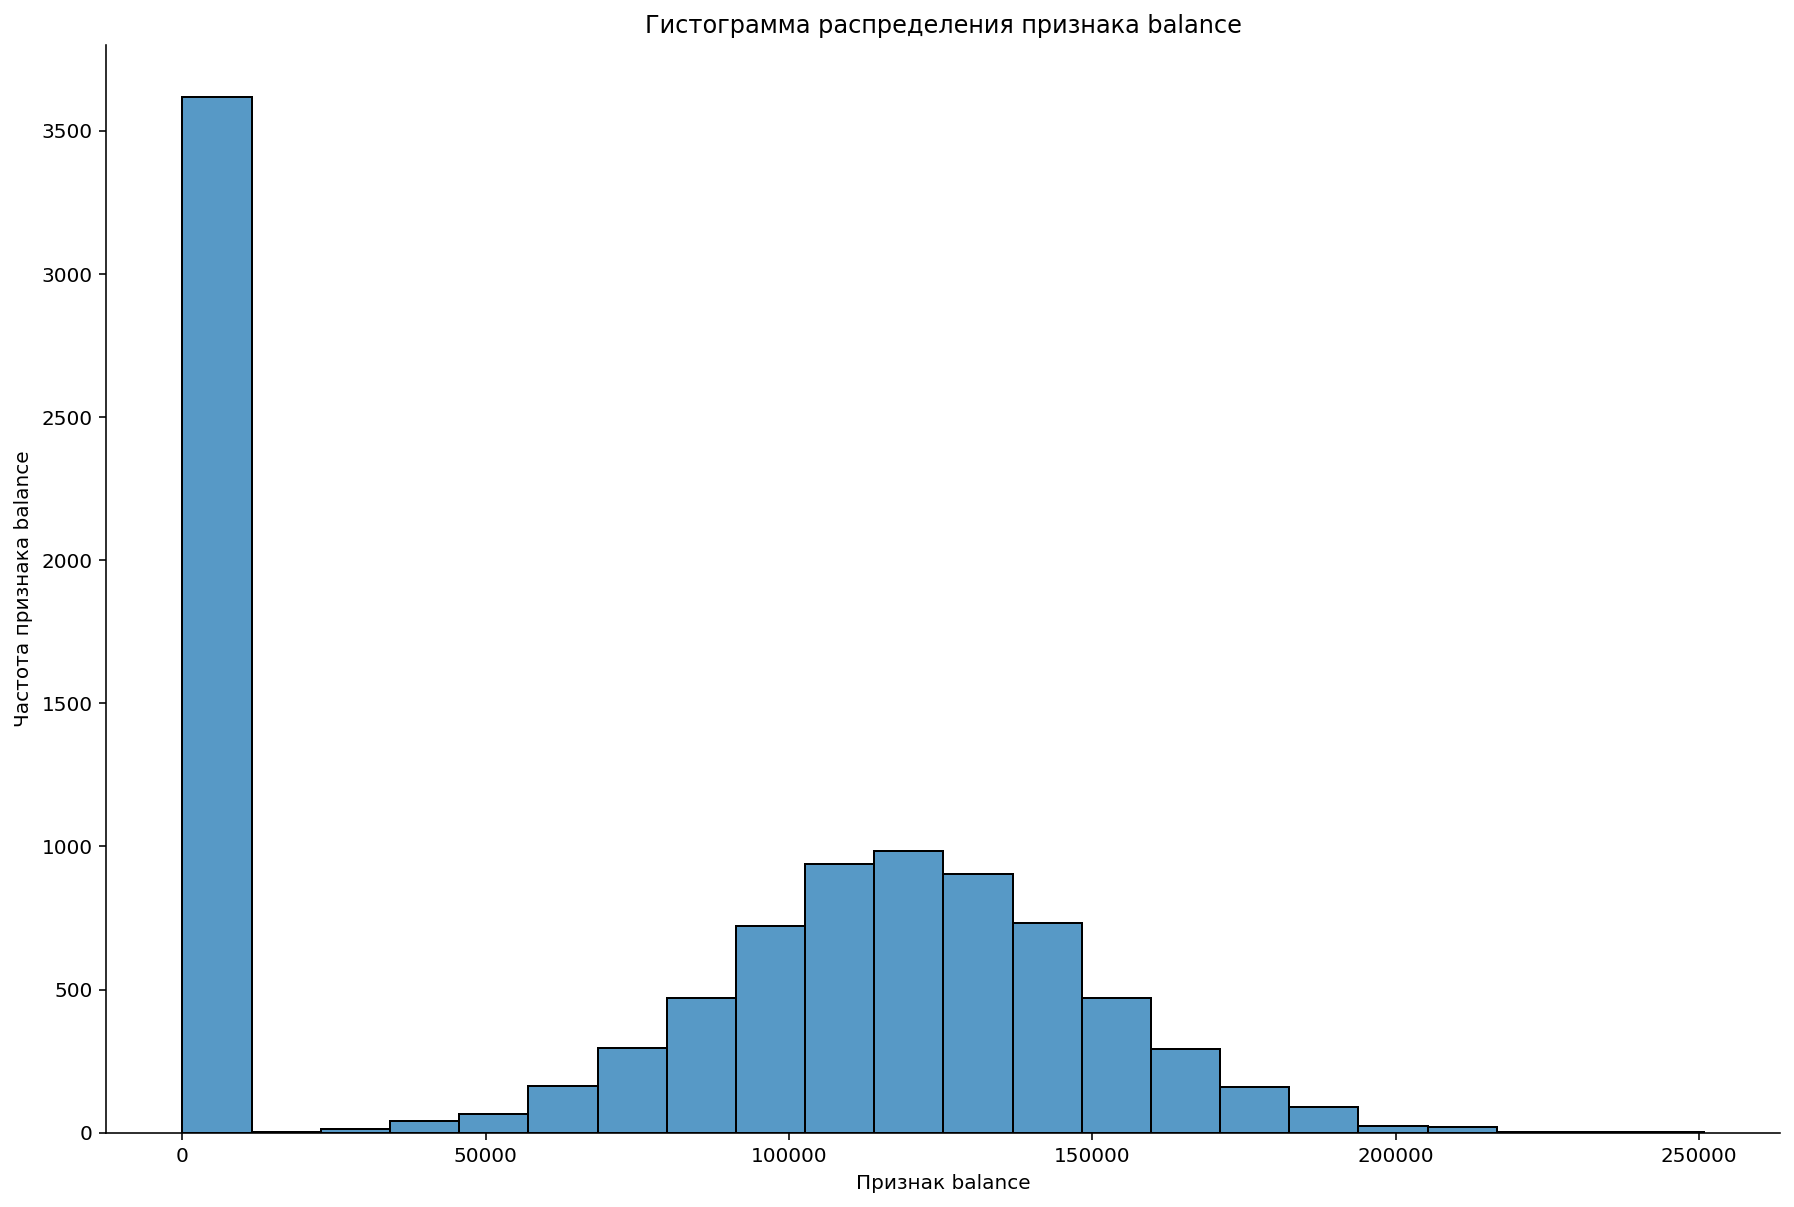

In [16]:
display(df[df['balance'].notna()]['balance'].describe())

# Строим гистограмму
hist(df[df['balance'].notna()], 'balance', False)

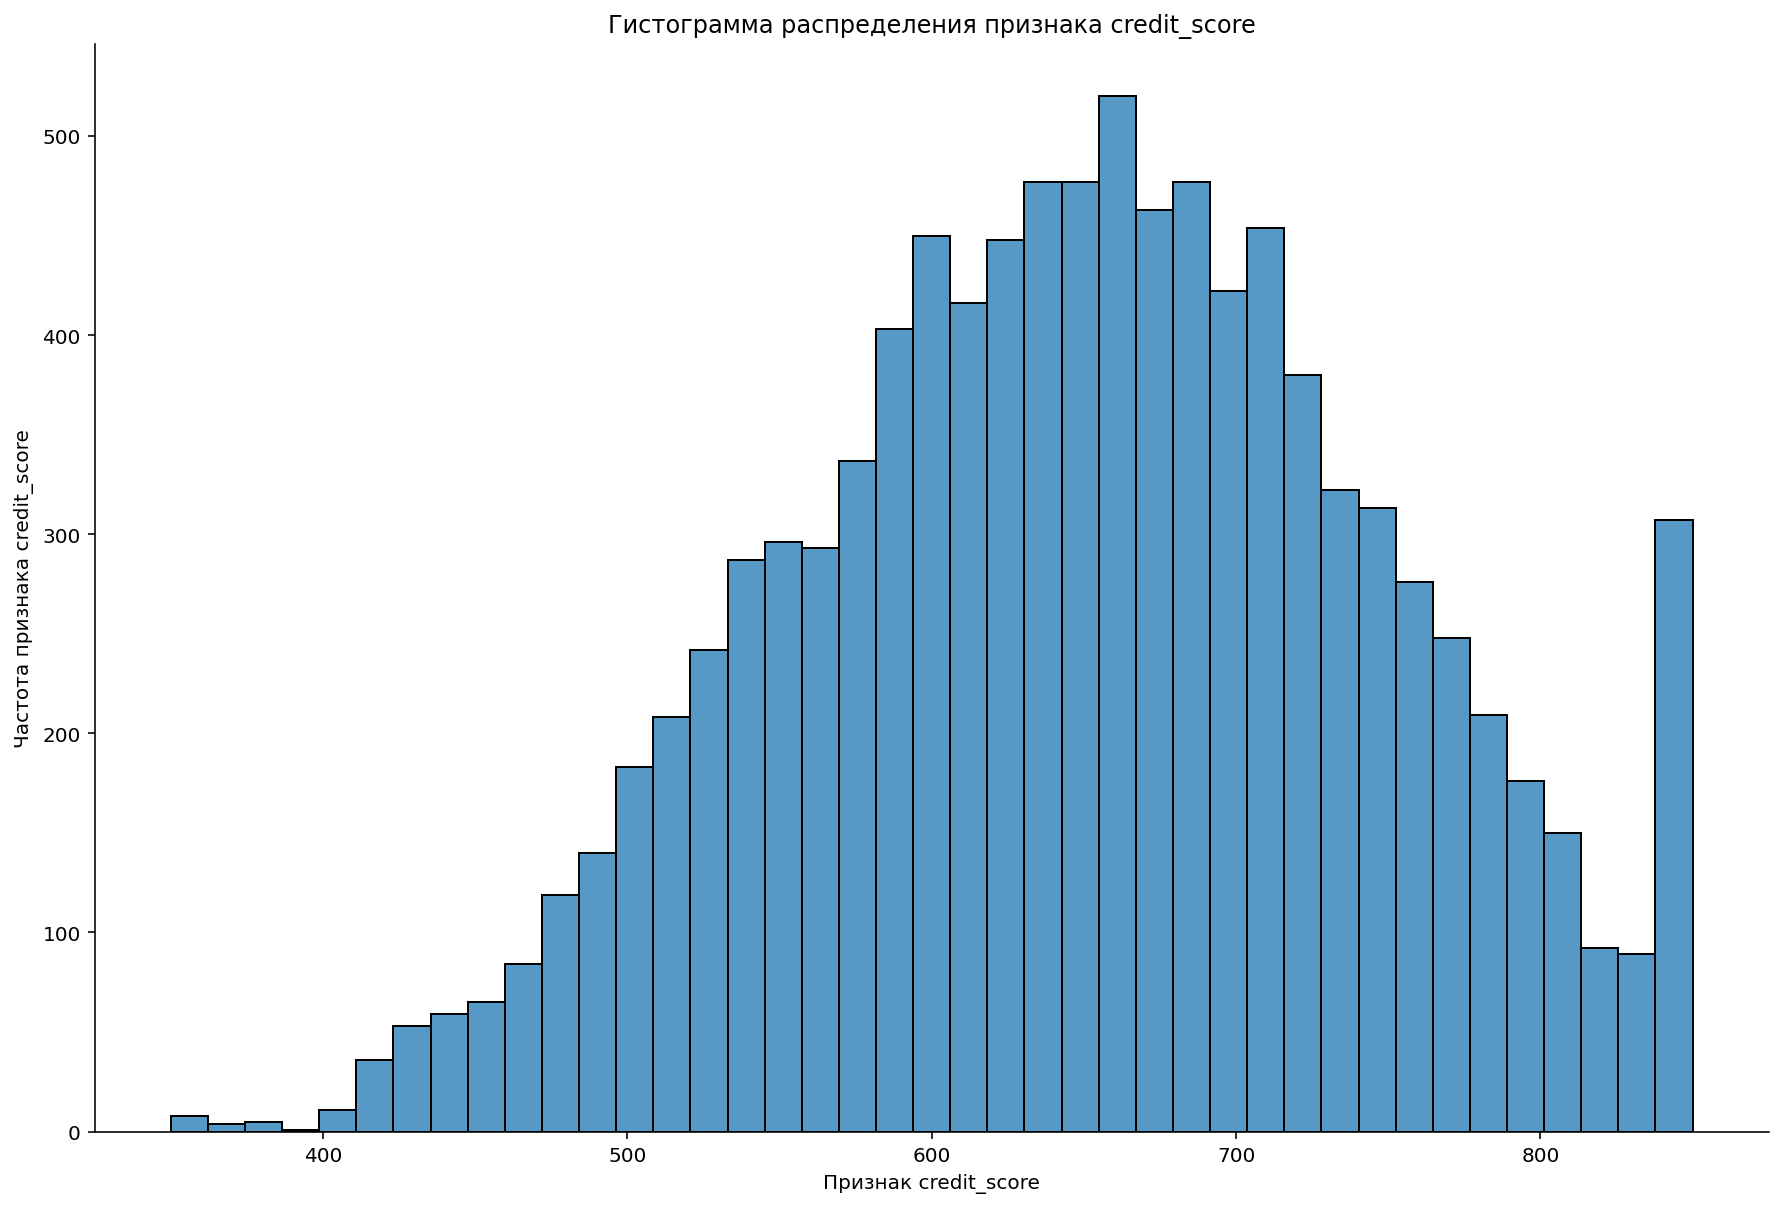

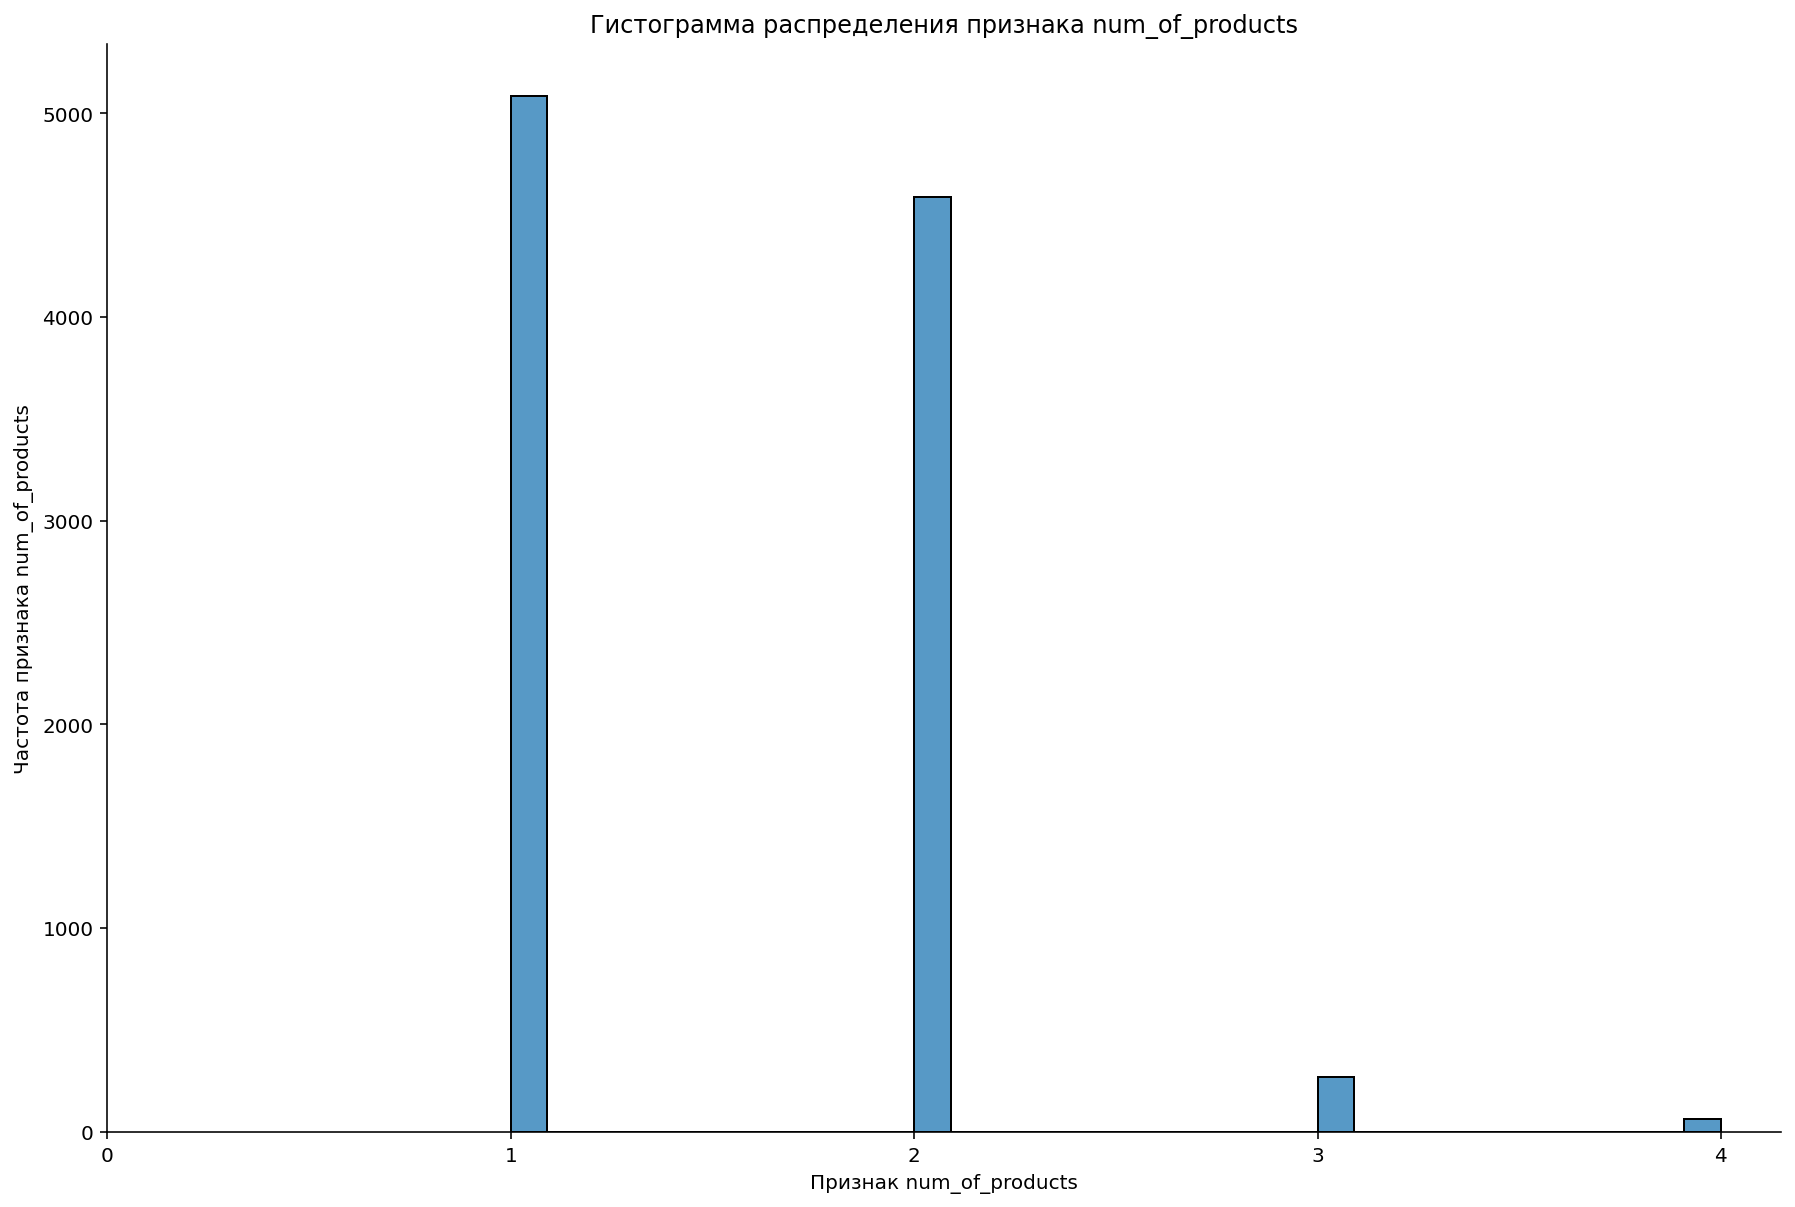

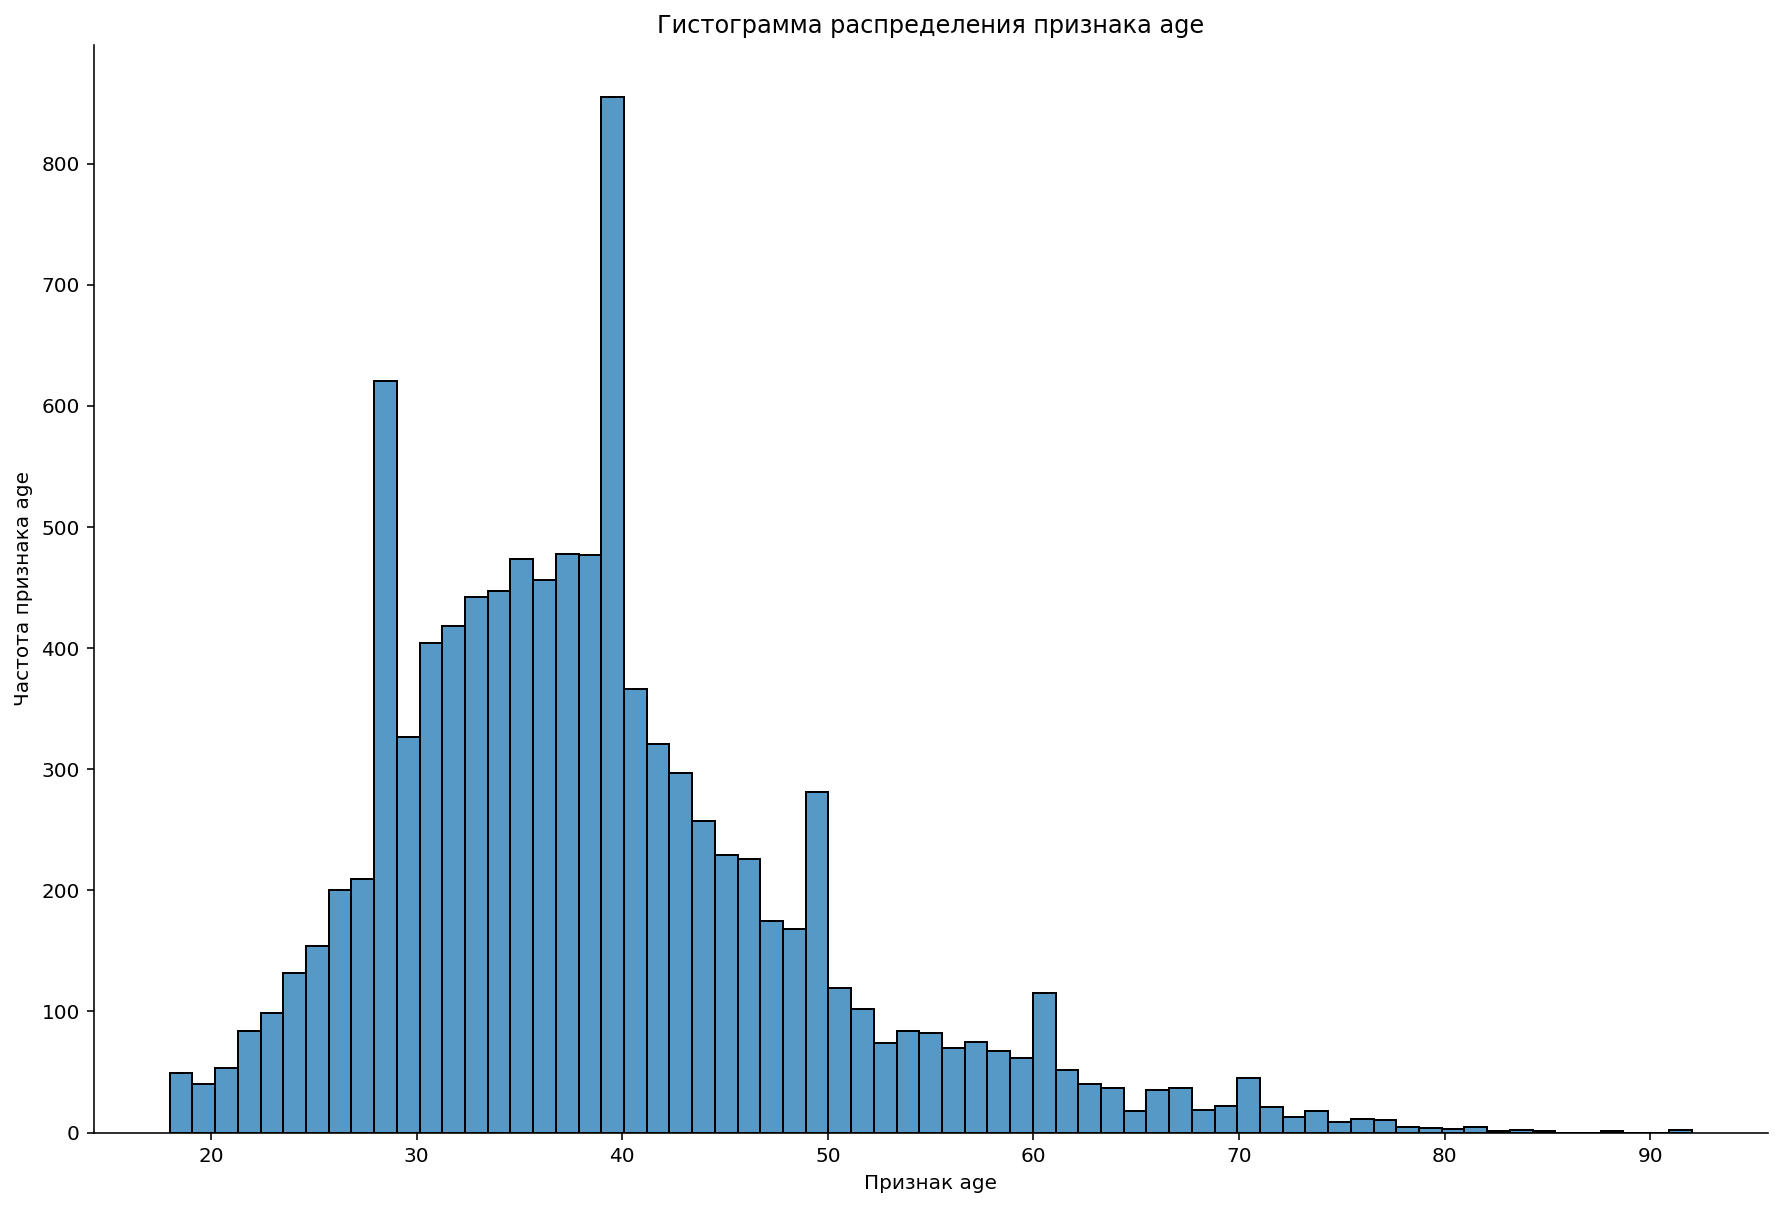

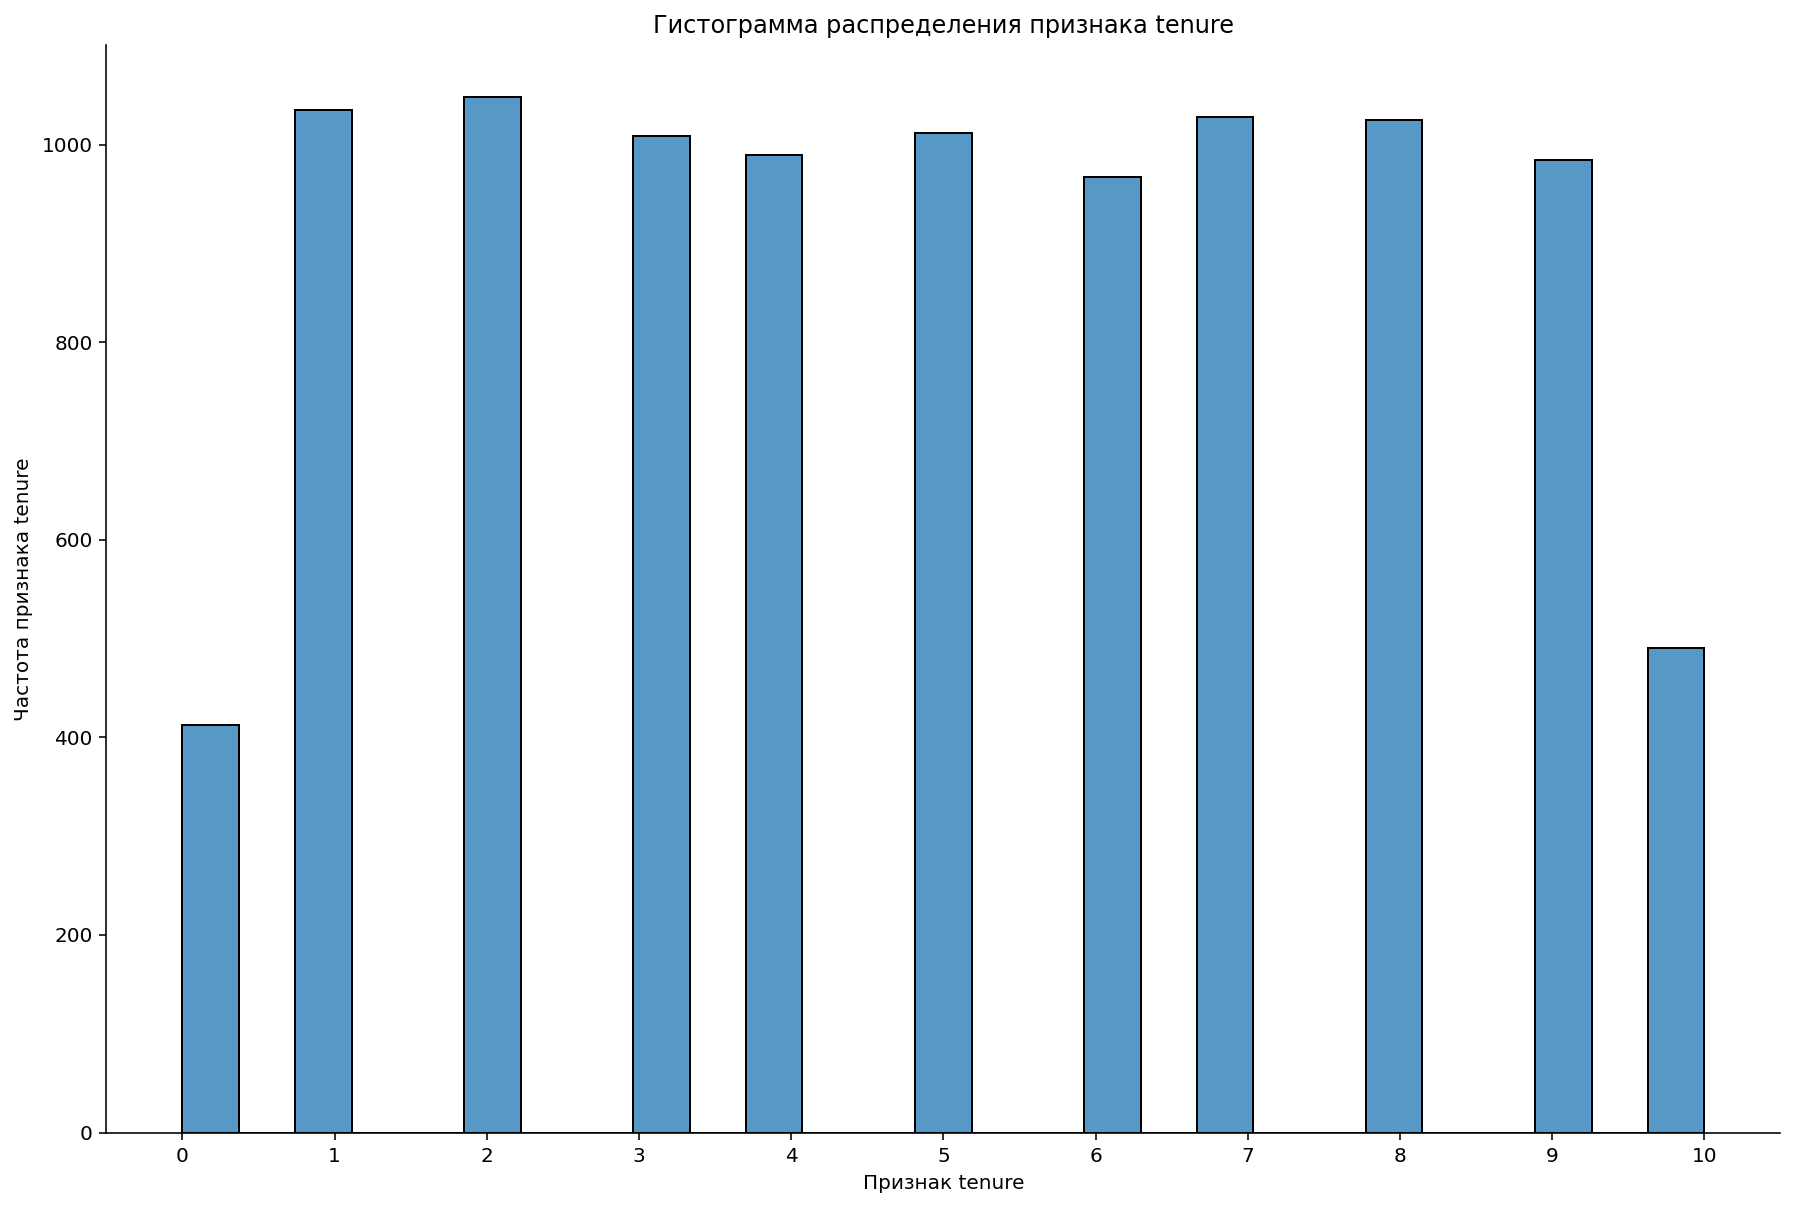

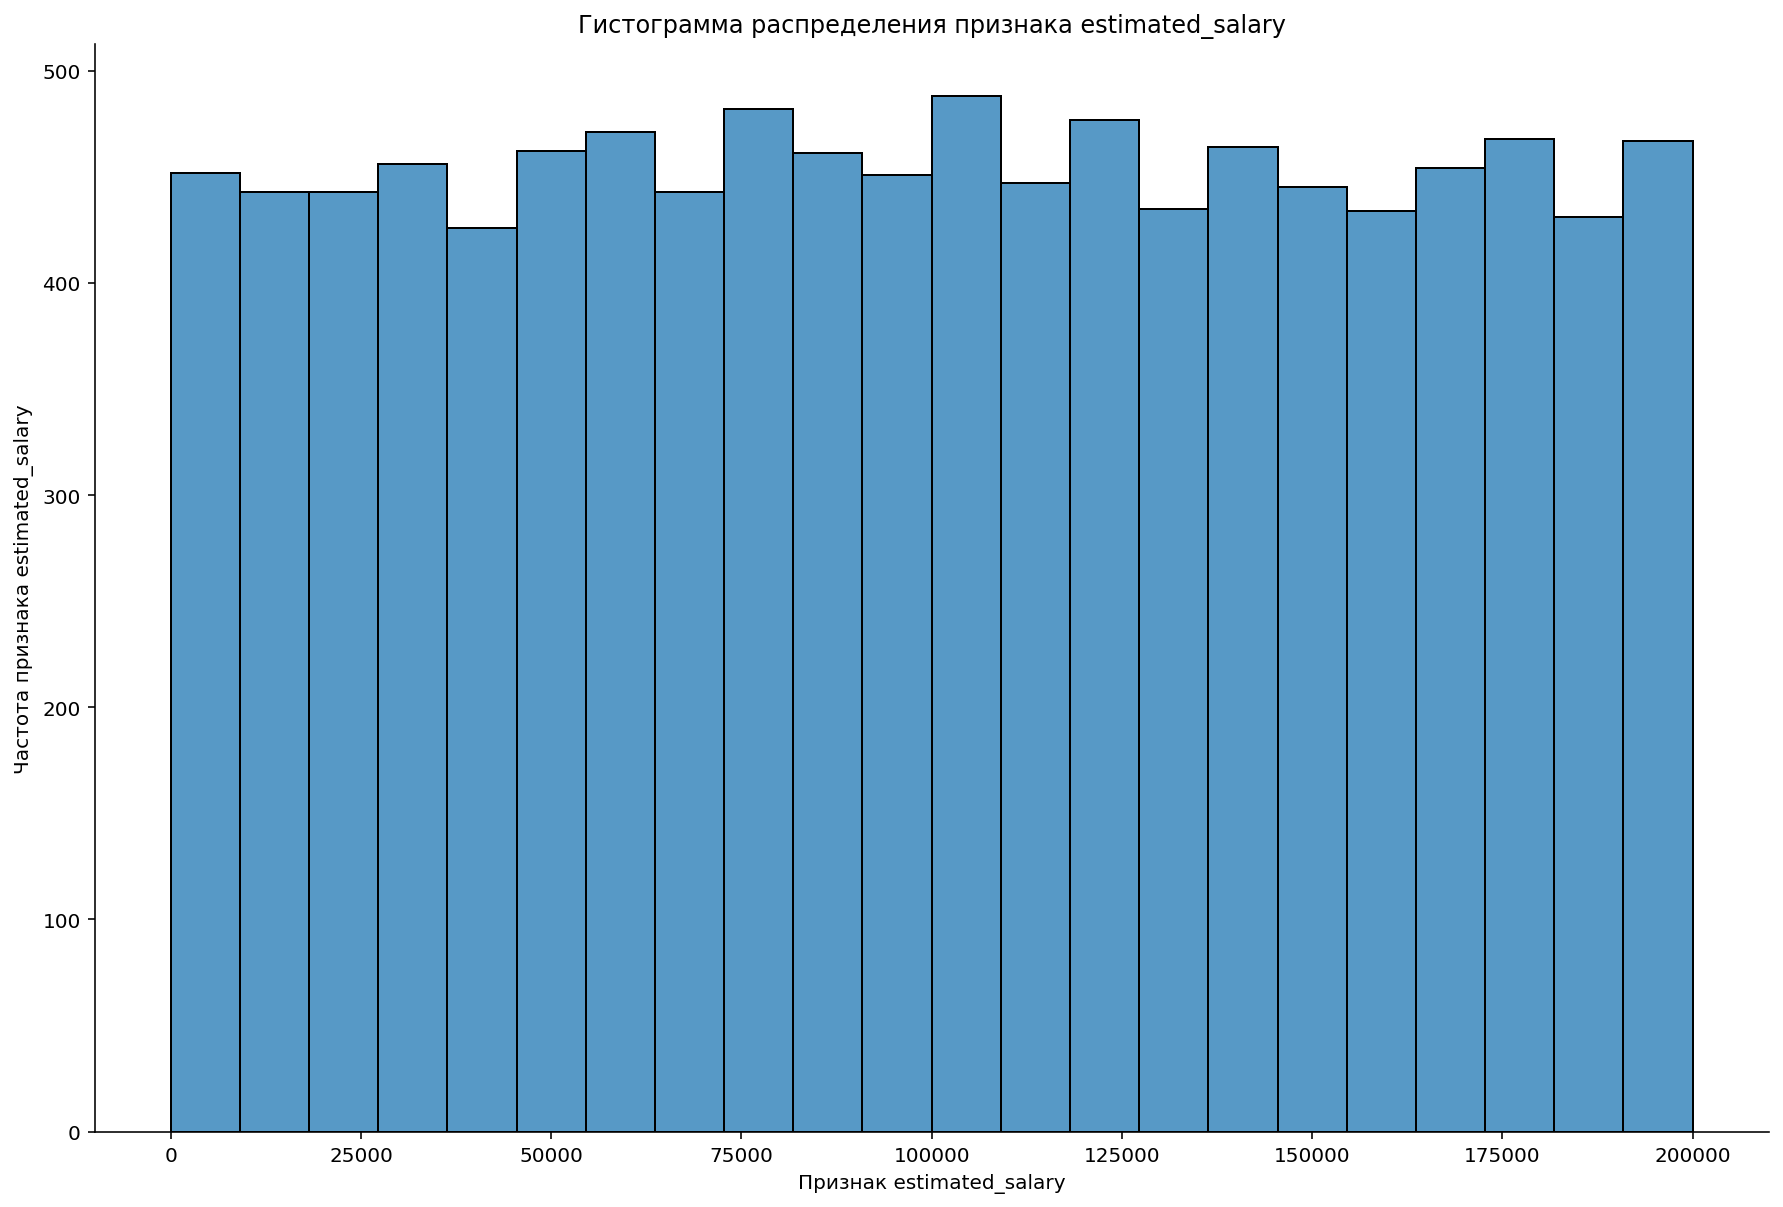

In [17]:
# построим гистограммы для остальных столбцов

for i in [
    'credit_score',
    'num_of_products',
    'age',
    'tenure',
    'estimated_salary']:
    hist(balance,
        i,
        False)

In [18]:
#проверим, есть ли нулевые остатки в столбце `balance`
df.query('balance == 0')

row_number  customer_id      surname  credit_score geography  gender  \
0              1     15634602     Hargrave           619    France  Female   
3              4     15701354         Boni           699    France  Female   
6              7     15592531     Bartlett           822    France    Male   
11            12     15737173      Andrews           497     Spain    Male   
12            13     15632264          Kay           476    France  Female   
...          ...          ...          ...           ...       ...     ...   
9989        9990     15605622     McMillan           841     Spain    Male   
9992        9993     15657105  Chukwualuka           726     Spain    Male   
9994        9995     15719294         Wood           800    France  Female   
9995        9996     15606229     Obijiaku           771    France    Male   
9997        9998     15584532          Liu           709    France  Female   

      age  tenure  balance  num_of_products  has_cr_card  is_active_member  \
0      42       2      0.0                1            1                 1   
3      39       1      0.0                2            0                 0   
6      50       7      0.0                2            1                 1   
11     24       3      0.0                2            1                 0   
12     34      10      0.0                2            1                 0   
...   ...     ...      ...              ...          ...               ...   
9989   28       4      0.0                2            1                 1   
9992   36       2      0.0                1            1                 0   
9994   29       2      0.0                2            0                 0   
9995   39       5      0.0                2            1                 0   
9997   36       7      0.0                1            0                 1   

      estimated_salary  exited  
0            101348.88       1  
3             93826.63       0  
6             10062.80       0  
11            76390.01       0  
12            26260.98       0  
...                ...     ...  
9989         179436.60       0  
9992         195192.40       0  
9994         167773.55       0  
9995          96270.64       0  
9997          42085.58       1  

[3617 rows x 14 columns]

In [19]:
df['balance'].describe().to_frame()

balance
count   10000.000000
mean    76485.889288
std     62397.405202
min         0.000000
25%         0.000000
50%     97198.540000
75%    127644.240000
max    250898.090000

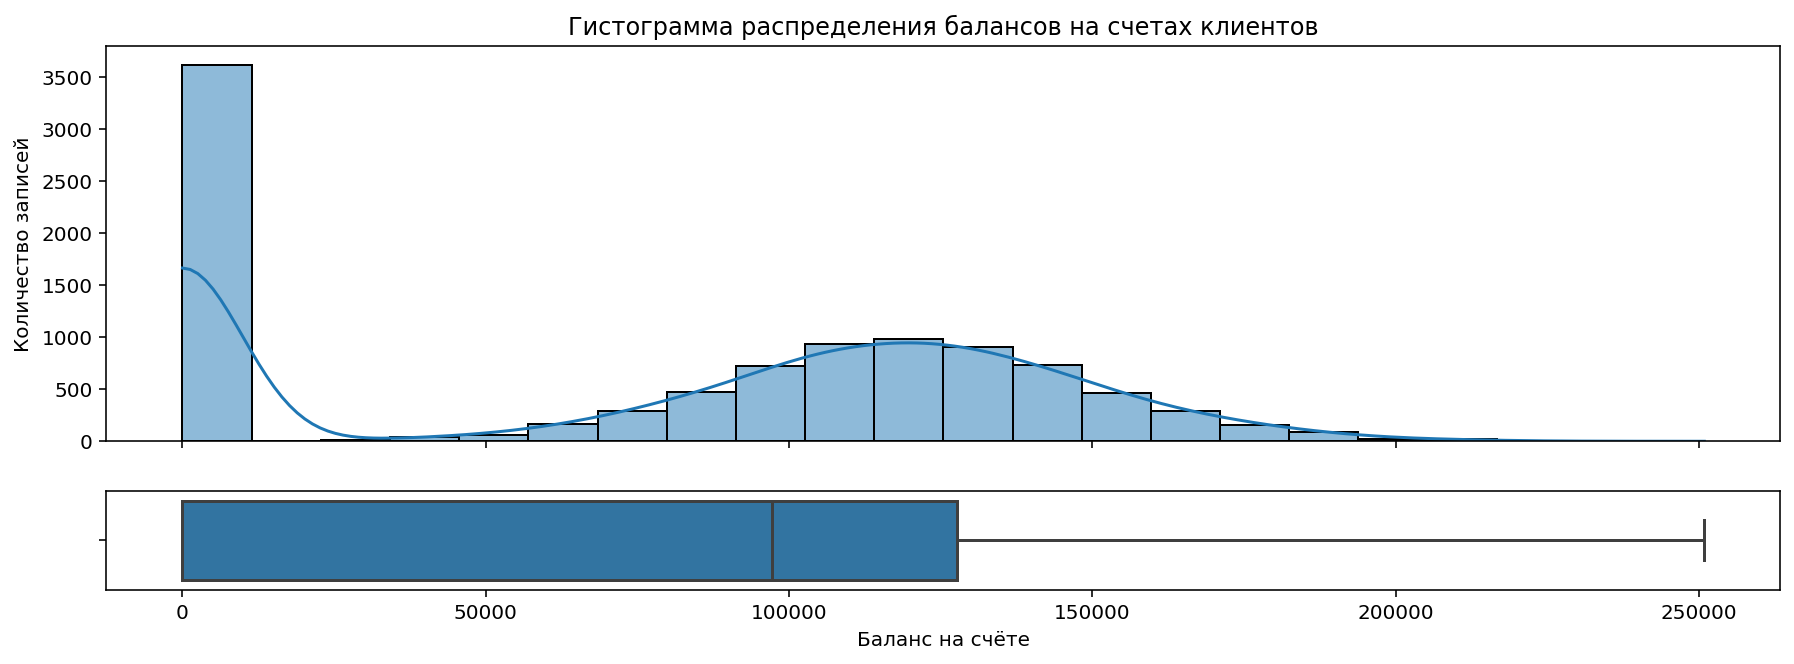

In [20]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=df, x='balance', kde=True, ax=axs_hist)\
.set(title='Гистограмма распределения балансов на счетах клиентов',
     ylabel='Количество записей')
sns.boxplot(data=df, x='balance', ax=axs_box)\
.set(xlabel='Баланс на счёте');

Значения балансов на счетах лежат в диапазоне от 0 до 250 тысяч, медианное значение — 97 тысяч, среднее — 76 тысяч. На гистограмме видно, что у значительного количества клиентов нулевой баланс на счёте.

In [21]:
# посмотрим на распределение среднего баланса по признаку оттока
df.groupby('exited').agg({'balance' : ['count', 'mean']})

balance              
         count          mean
exited                      
0         7963  72745.296779
1         2037  91108.539337

## Исследовательский анализ данных

In [22]:
# посмотрим на все признаки, кроме balance

df.loc[:, df.columns != 'balance'].describe()

row_number   customer_id  credit_score           age        tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

       num_of_products  has_cr_card  is_active_member  estimated_salary  \
count     10000.000000  10000.00000      10000.000000      10000.000000   
mean          1.530200      0.70550          0.515100     100090.239881   
std           0.581654      0.45584          0.499797      57510.492818   
min           1.000000      0.00000          0.000000         11.580000   
25%           1.000000      0.00000          0.000000      51002.110000   
50%           1.000000      1.00000          1.000000     100193.915000   
75%           2.000000      1.00000          1.000000     149388.247500   
max           4.000000      1.00000          1.000000     199992.480000   

             exited  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

- средний рейтинг 650
- в среднем, мужчин чуть больше, чем женщин
- средний возраст 38 лет 
- среднее кол-во недвижимости - 5
- в среднем используются 1-2 продукта
- у большинства есть кредитные карты
- лояльных клиентов чуть больше, чем нелояльных, но практически равное кол-во
- средняя зп 100 тыс руб
- средний отток 20%

### Расчёт средних значений для групп с оттоком и без оттока и их сравнение

In [23]:
# рассчитаем средние значения для групп с оттоком и без

df.pivot_table(index='exited', aggfunc='mean').apply(lambda x: x.apply('{0:.2f}'.format))

age   balance credit_score  customer_id estimated_salary  \
exited                                                               
0       37.41  72745.30       651.85  15691167.88         99738.39   
1       44.84  91108.54       645.35  15690051.96        101465.68   

       has_cr_card is_active_member num_of_products row_number tenure  
exited                                                                 
0             0.71             0.55            1.54    5024.69   5.03  
1             0.70             0.36            1.48    4905.92   4.93

Можно сказать, что: 

- уходят люди 44+ лет
- к оттоку более сколнны женщины
- лояльность, возможно, как-то влияет на отток

Между другими признаками заметить закономерность сложно, так как они в обоих случаях примерно одинаковые

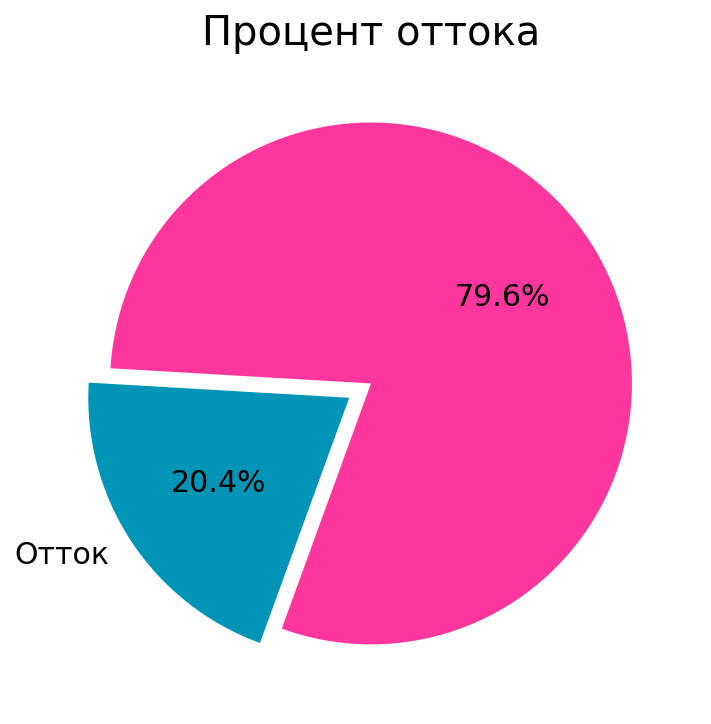

In [24]:
# Визуализируем процент оттока

sizes = df['exited'].value_counts(sort = True)
colors = ["#ff369d","#0095b6"] 
labels = '', 'Отток'
explode = (0, 0.1)
rcParams['figure.figsize'] = 6,6

plt.pie(sizes, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%', startangle=250, textprops={'fontsize': 15})

plt.title('Процент оттока', fontdict = {'fontsize' : 20})
plt.show()

ушли 20.4% клиентов, это достаточно много

### Построение графиков с учетом оттока

In [25]:
def view(data, hue=None):
    #дискретные значения
    for column in ['geography','gender', 'has_cr_card', 'is_active_member', 'tenure', 'num_of_products', 'exited']:
        ax = sns.countplot(data=data, x=column, hue=hue);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize = 15, color = 'black')
        plt.show()
    #распределение по возрасту
    plt.figure(figsize=(15,7))
    sns.countplot(data=data, x='age', hue=hue);
    plt.title('Распределение клиентов по признаку age', fontsize = 15, color = 'black')
    plt.show()

    #непрерывные значения
    for column in ['credit_score',  'balance', 'estimated_salary']:
        sns.kdeplot(data=data, x=column, hue=hue);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize = 15, color = 'black')
        plt.show()

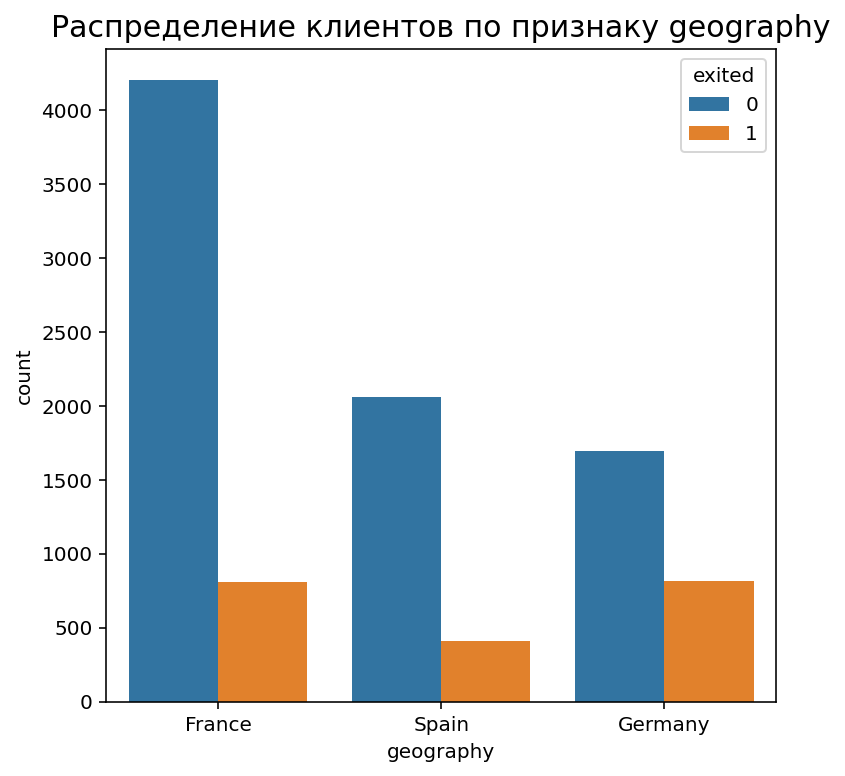

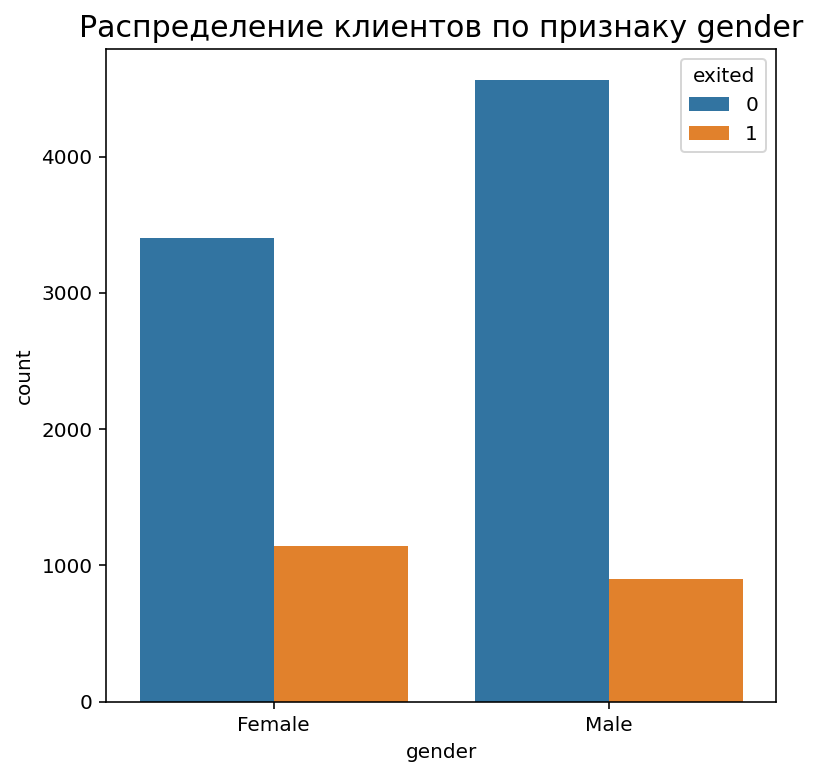

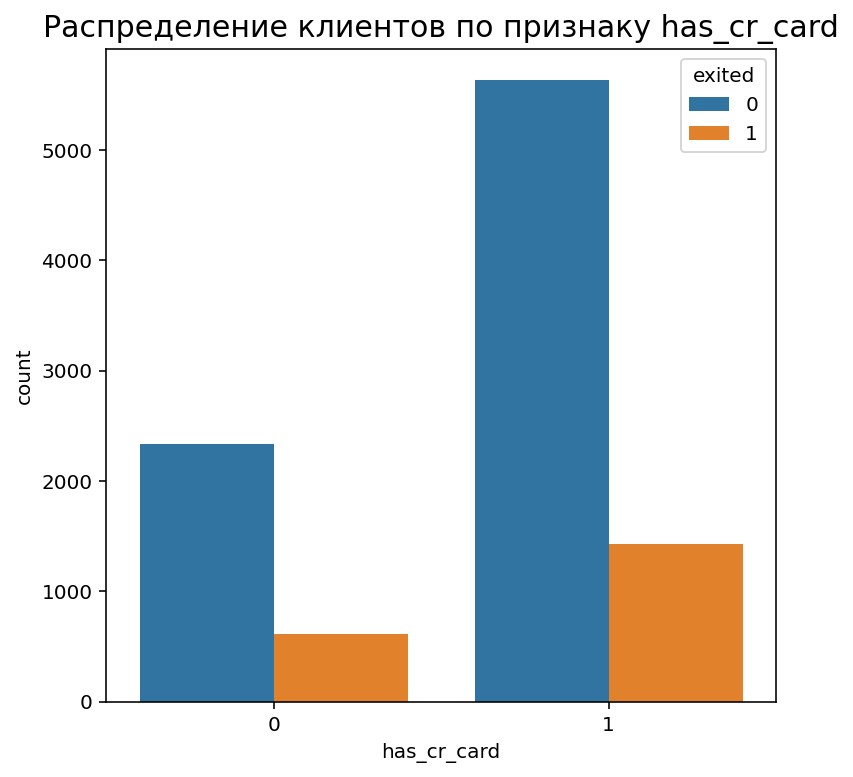

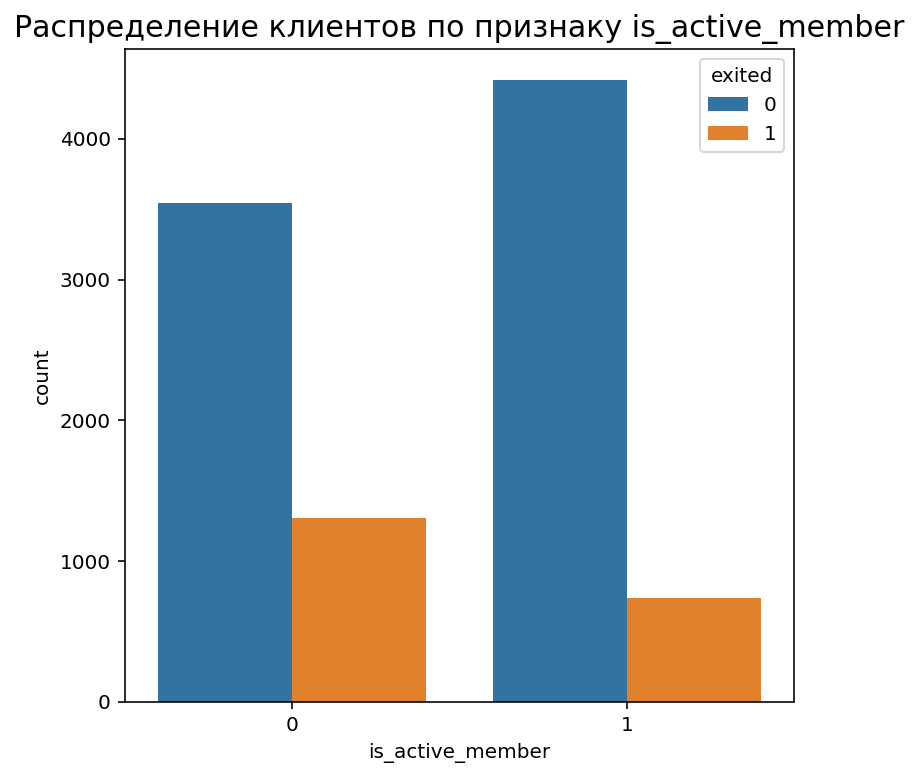

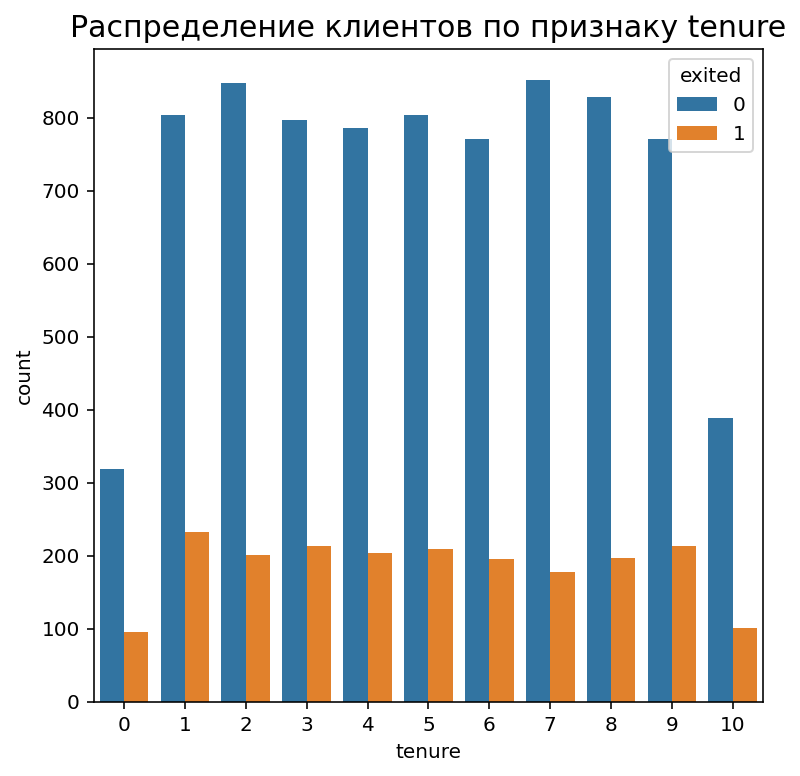

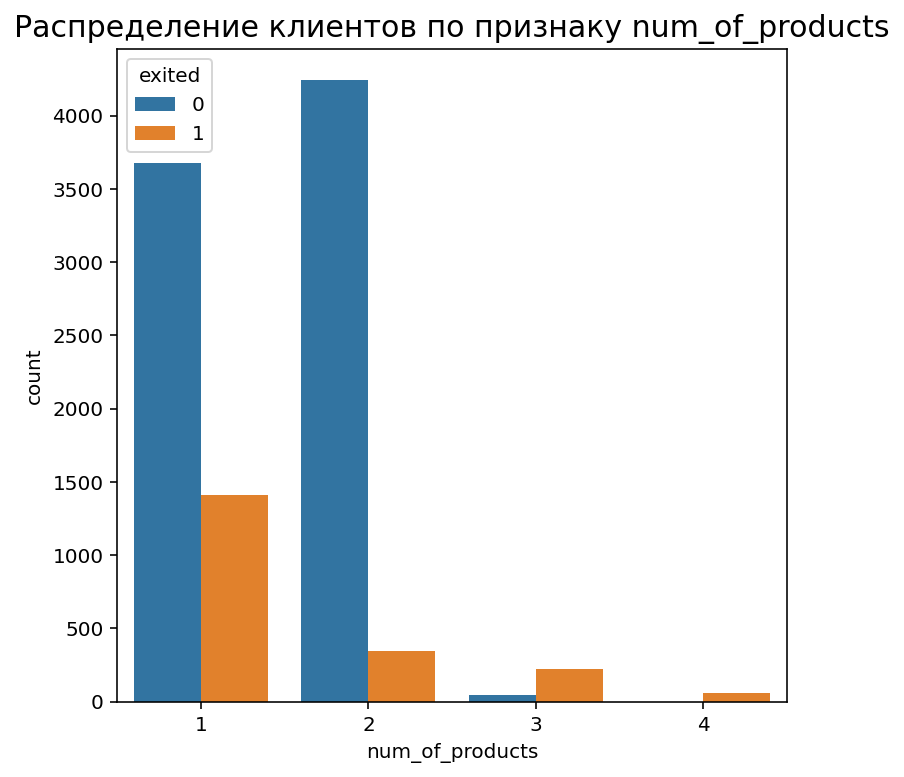

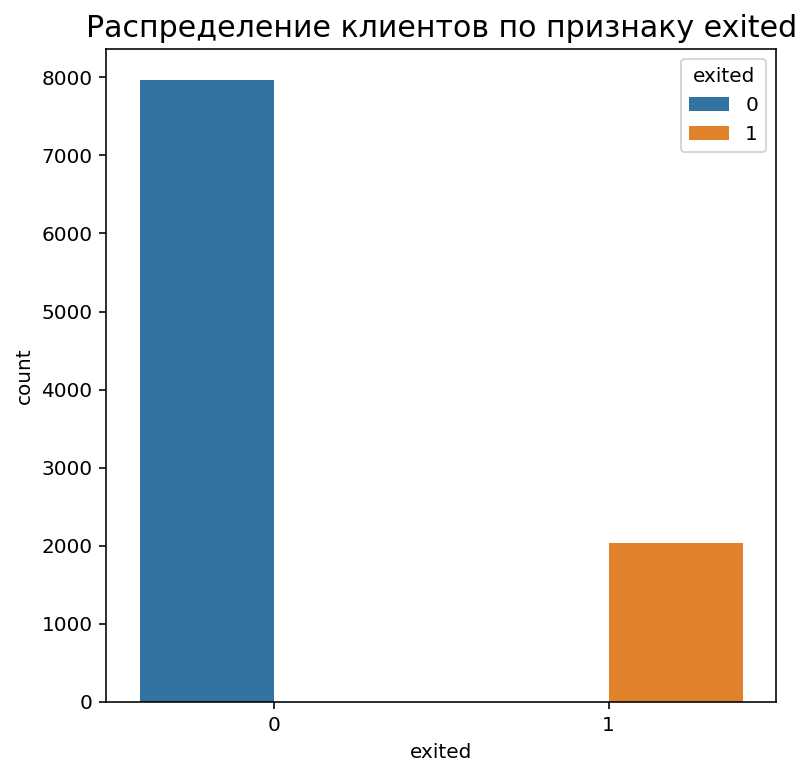

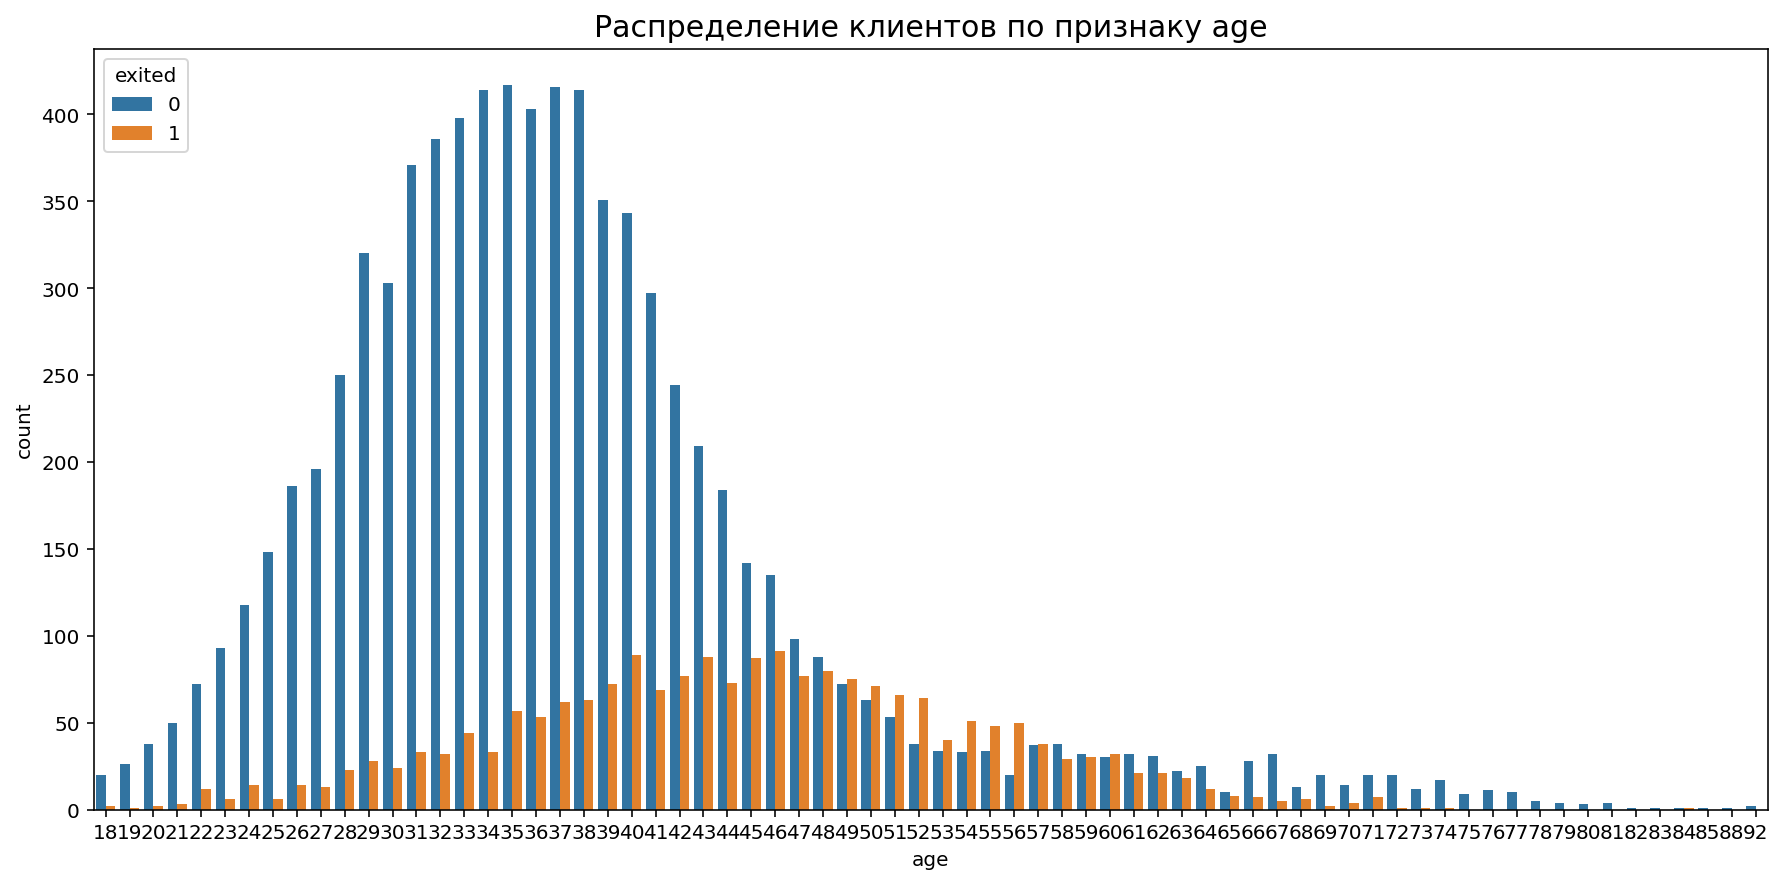

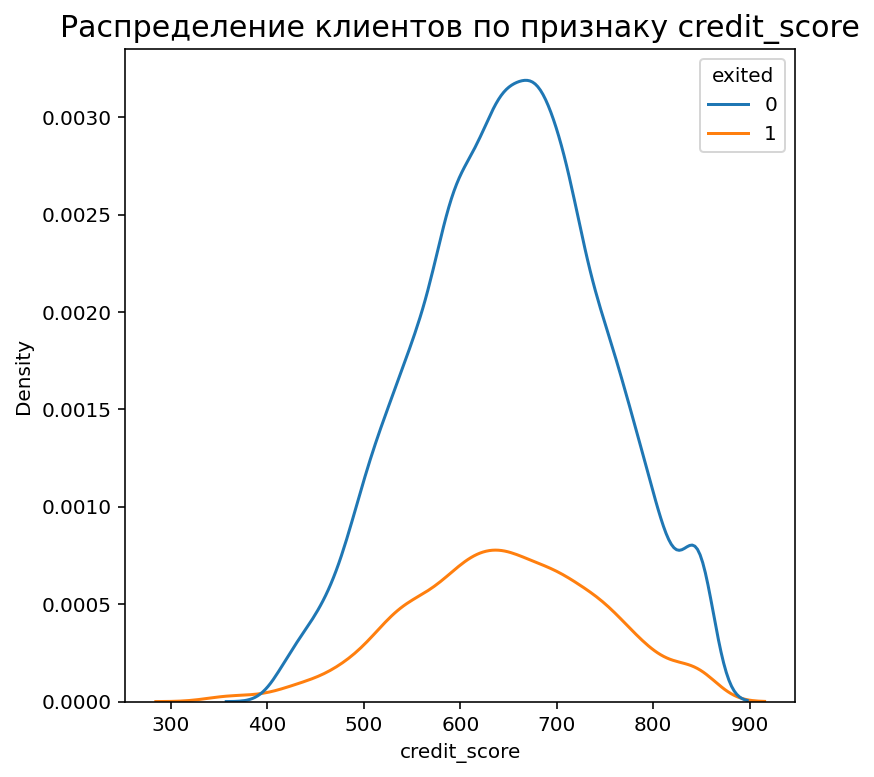

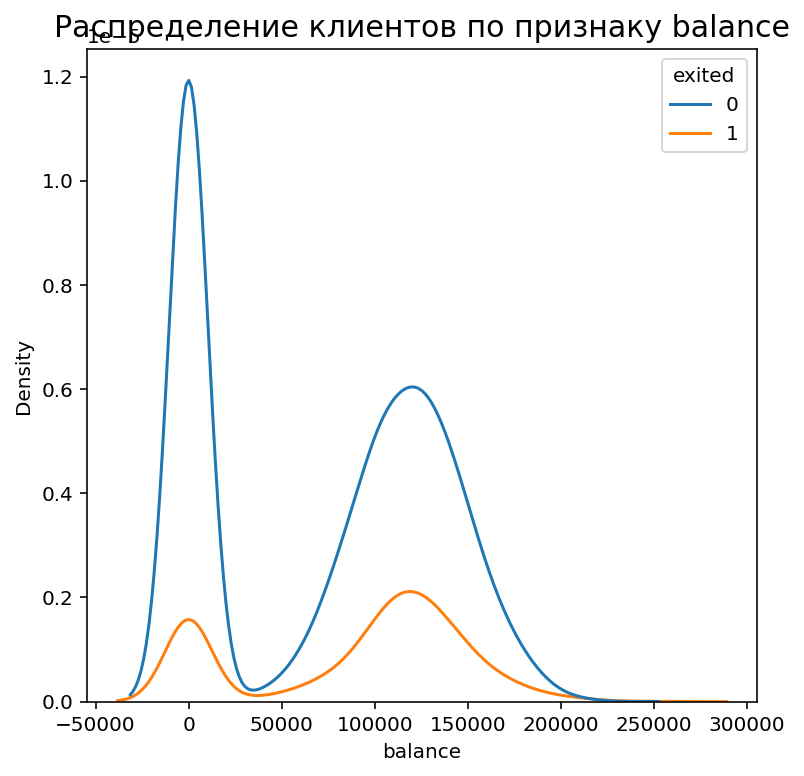

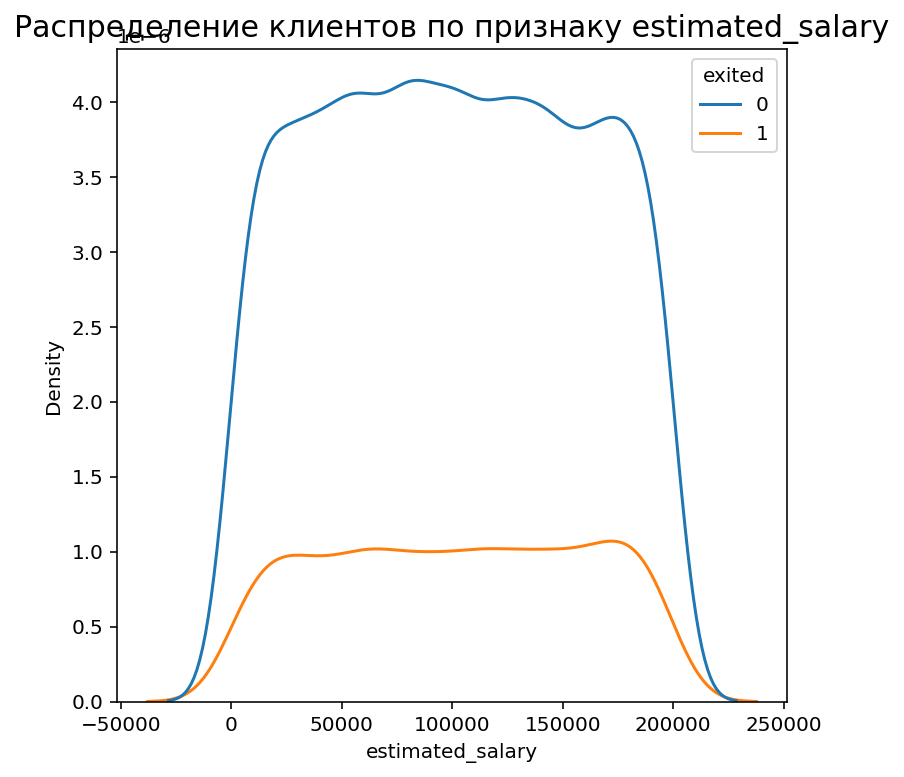

In [26]:
view(df, hue='exited')    

**Можно отметить следующее:**

- в Германии больше отток, чем в Испании
- женщины наиболее склонны к оттоку, нежели мужчины
- клиенты с кредитными картами наиболее склонны к оттоку
- лояльность: менее активные клиенты склонны к оттоку, что логично
- клиенты, которые используют 2 продукта, с большой вероятностью останутся с банком, клиенты с 3-4 продуктами можно сказать полностью отточны, клиенты с 1 продуктом также склонны к оттоку
- наиболее склонны к оттоку люди 46-57 лет
- думаю, что кол-во недвижимости, рейтинг, баланс и зп не влияют на отток

### Анализ распределения клиентов по странам с учетом оттока

In [27]:
# посмотрим на кол-во клиентов в каждой стране
geography_clients = df.groupby('geography')['geography'].count().to_frame()
geography_clients.columns = ['clients_count']
geography_clients

clients_count
geography               
France              5014
Germany             2509
Spain               2477

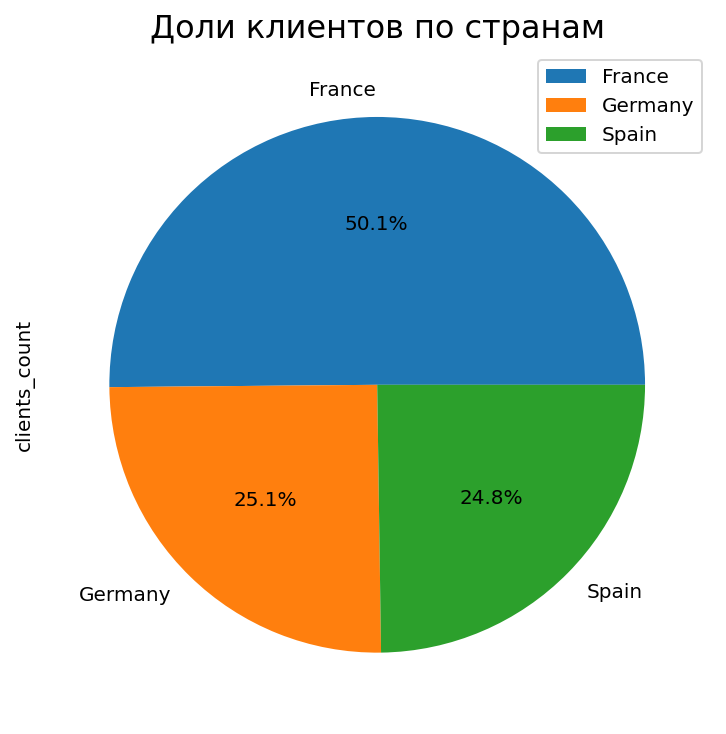

In [28]:
geography_clients.plot(kind = 'pie', y ='clients_count', autopct='%1.1f%%', figsize= (6,8));
plt.title('Доли клиентов по странам', fontsize = 16)
plt.show()

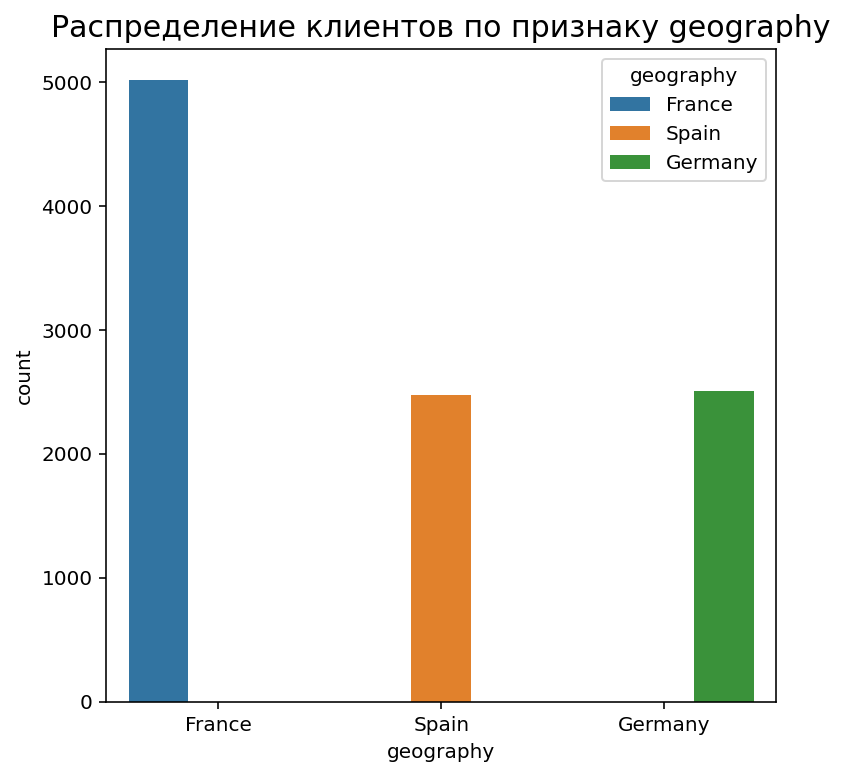

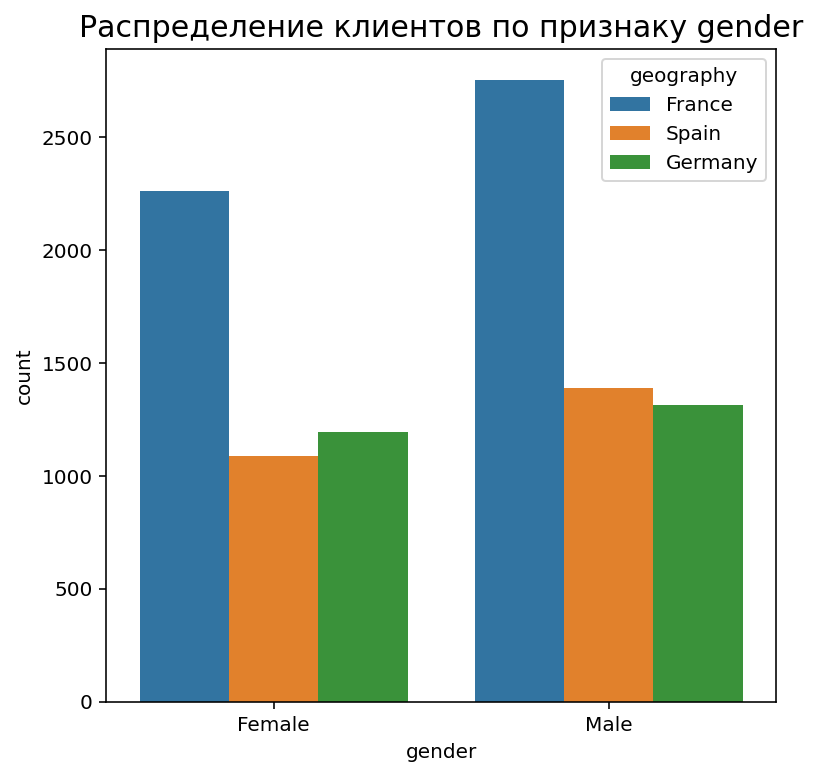

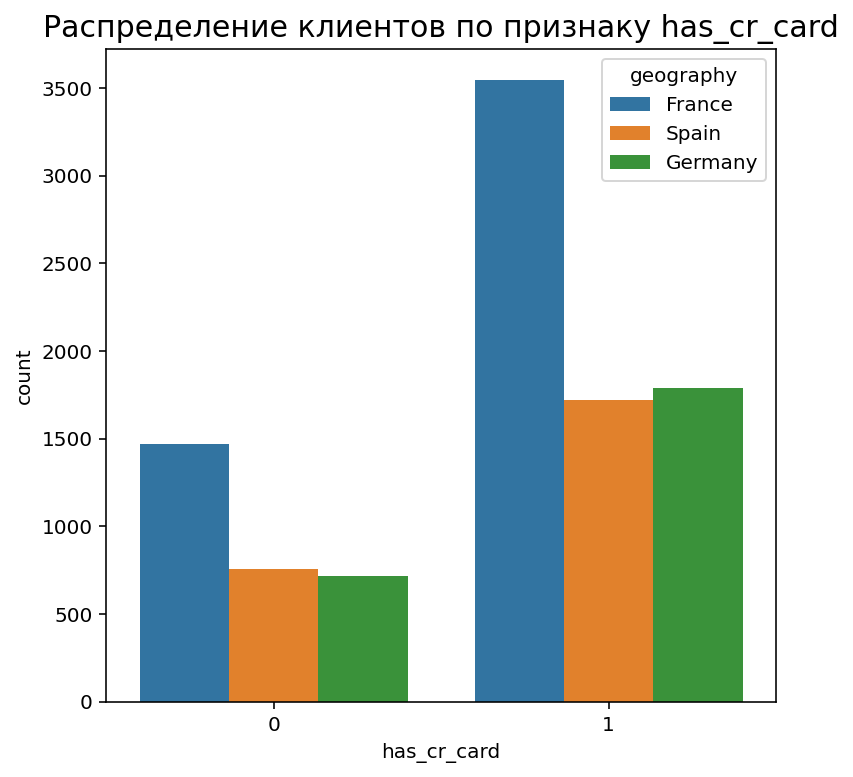

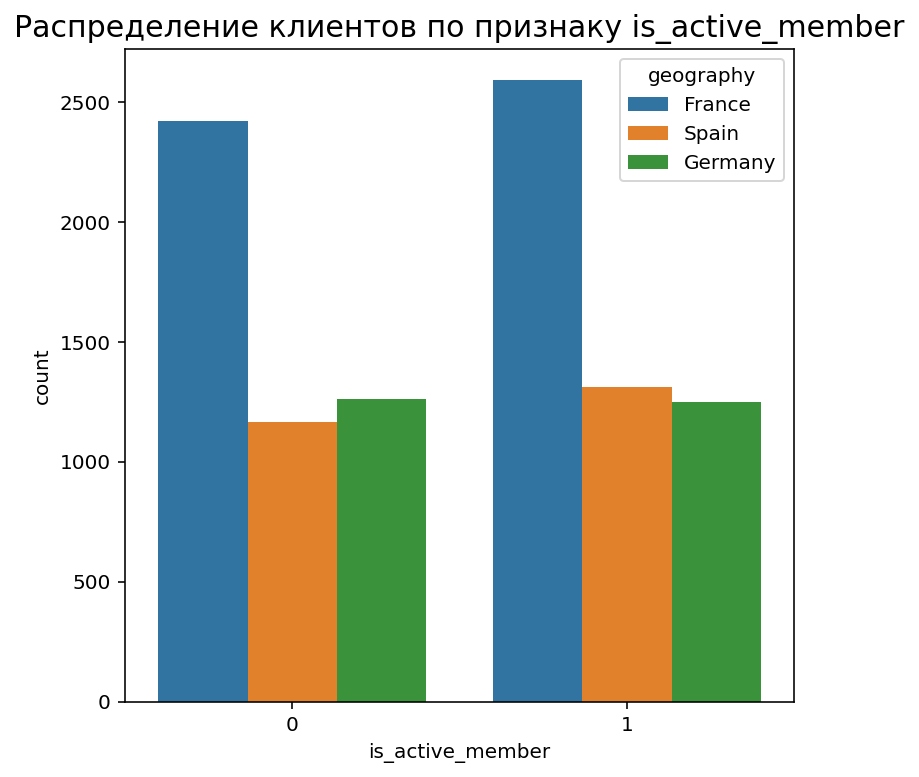

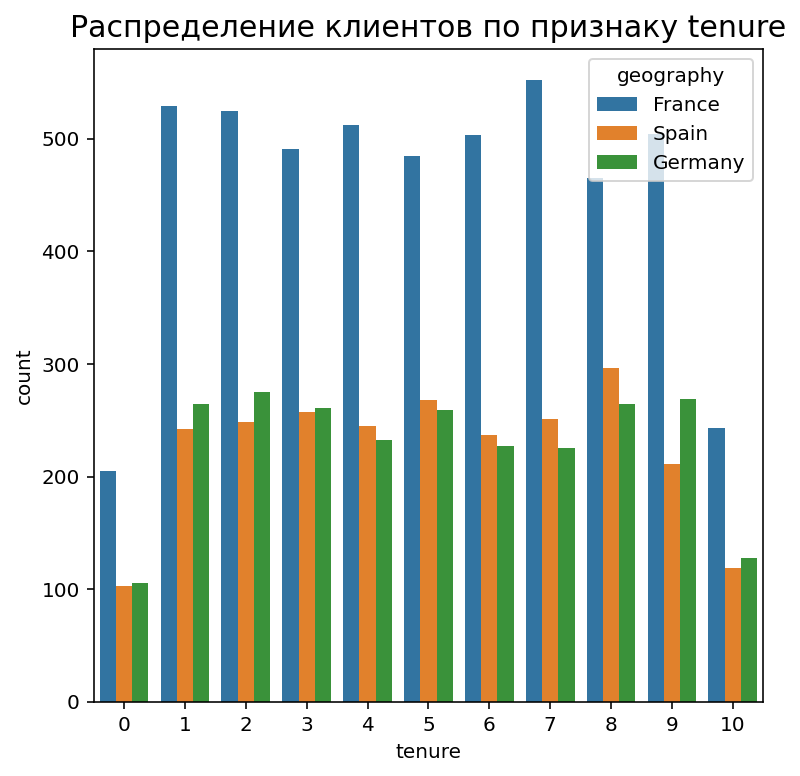

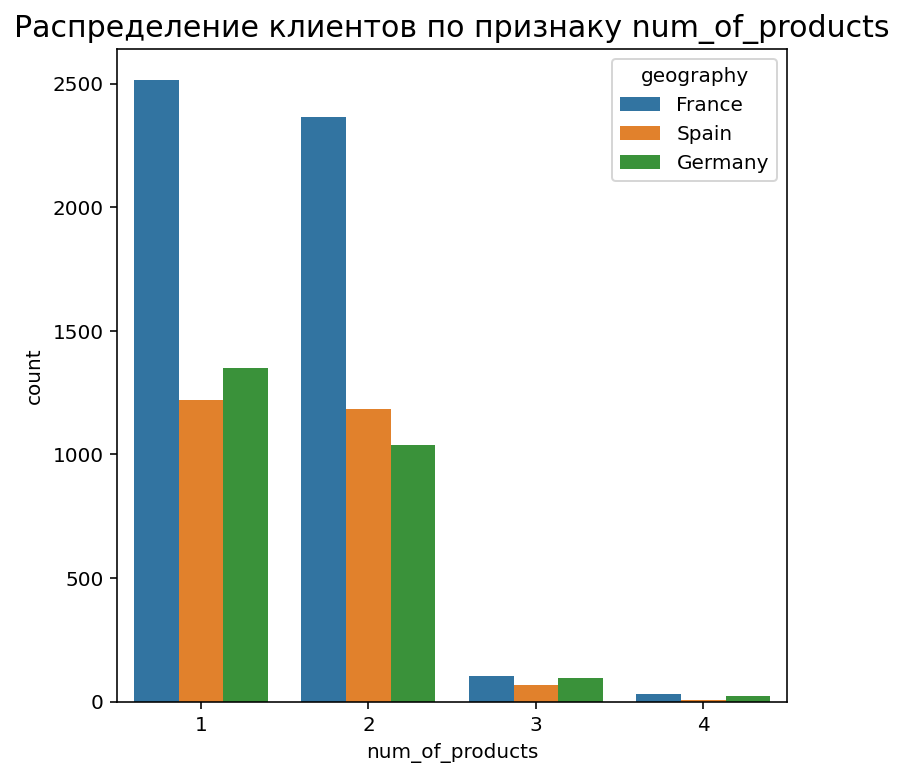

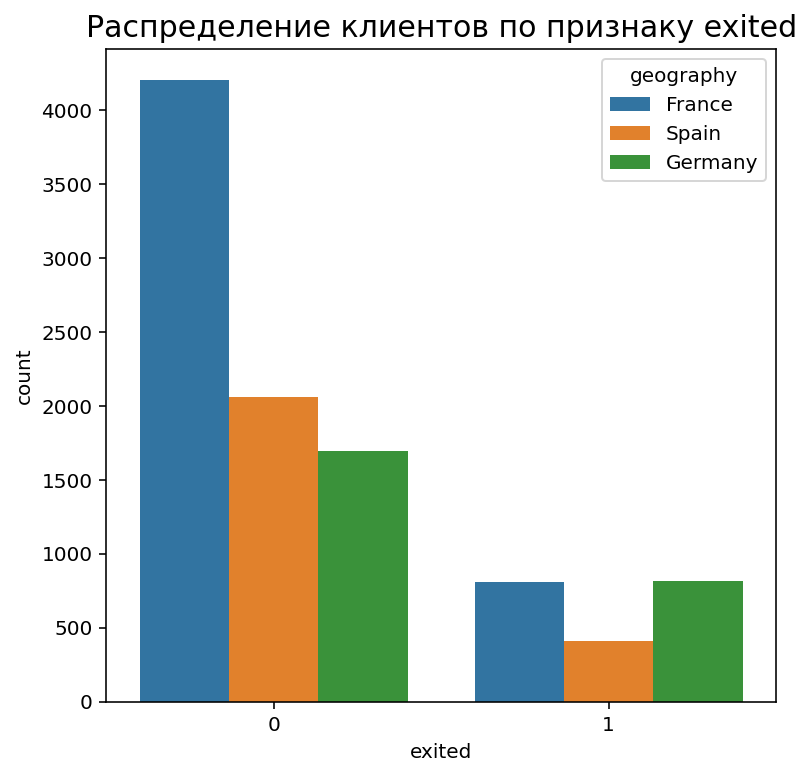

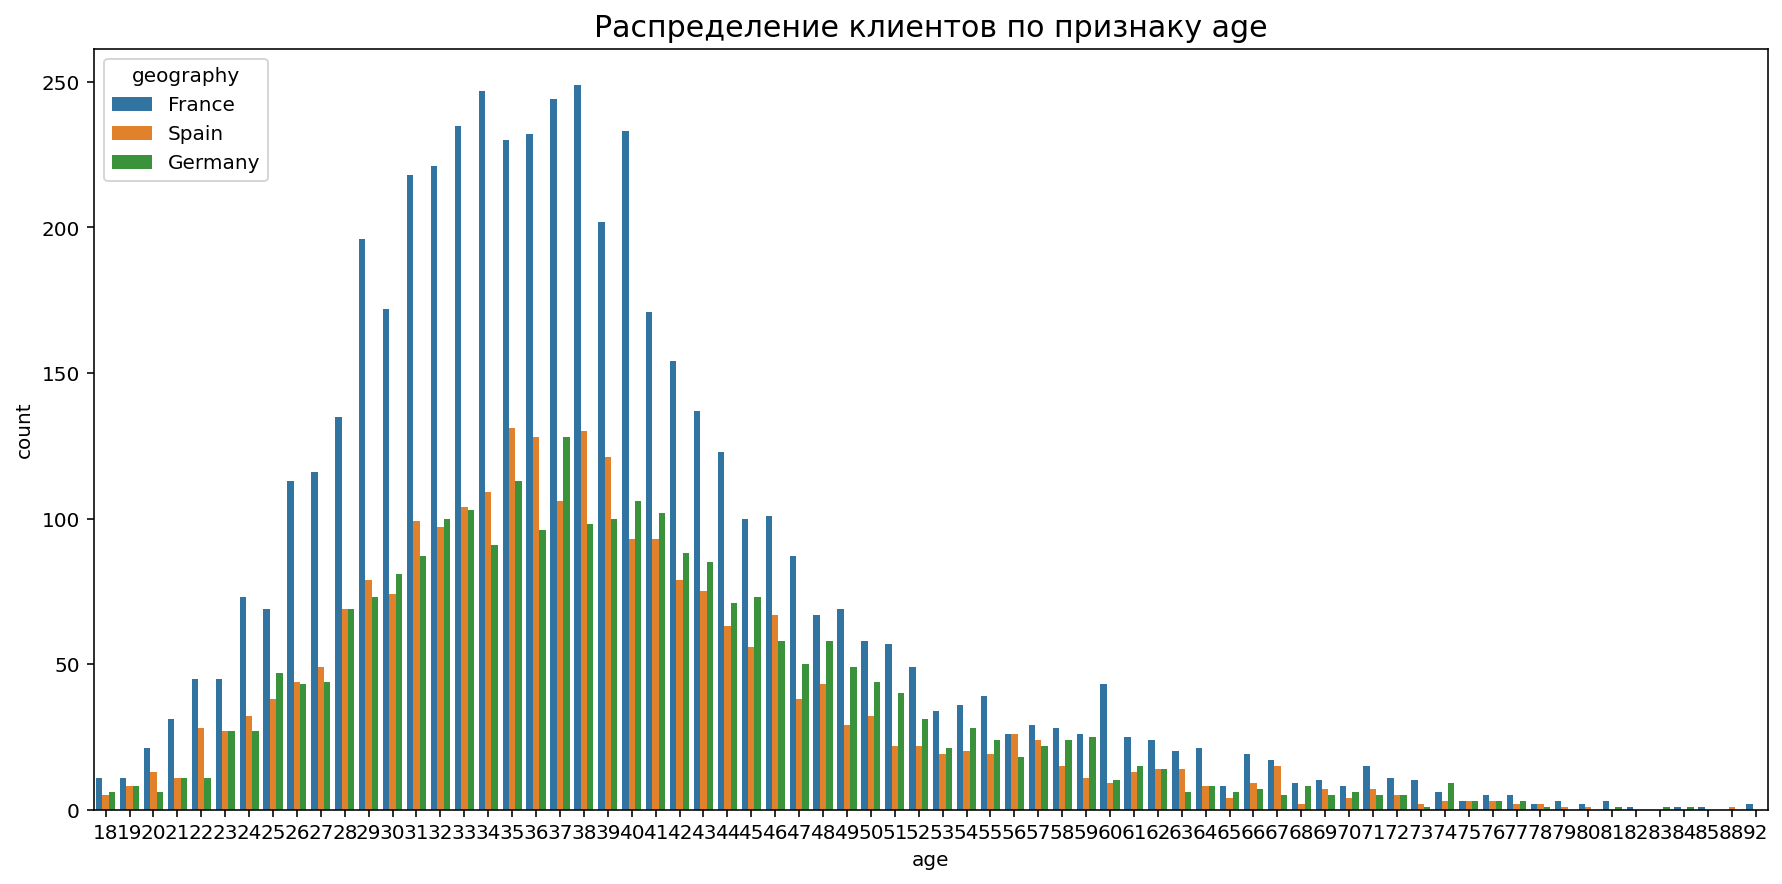

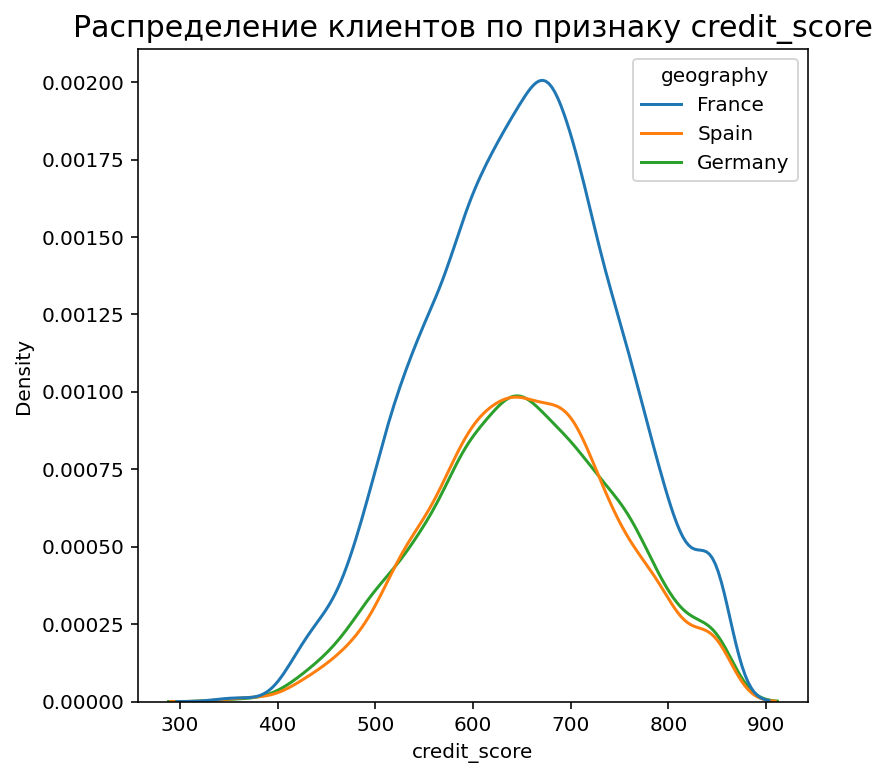

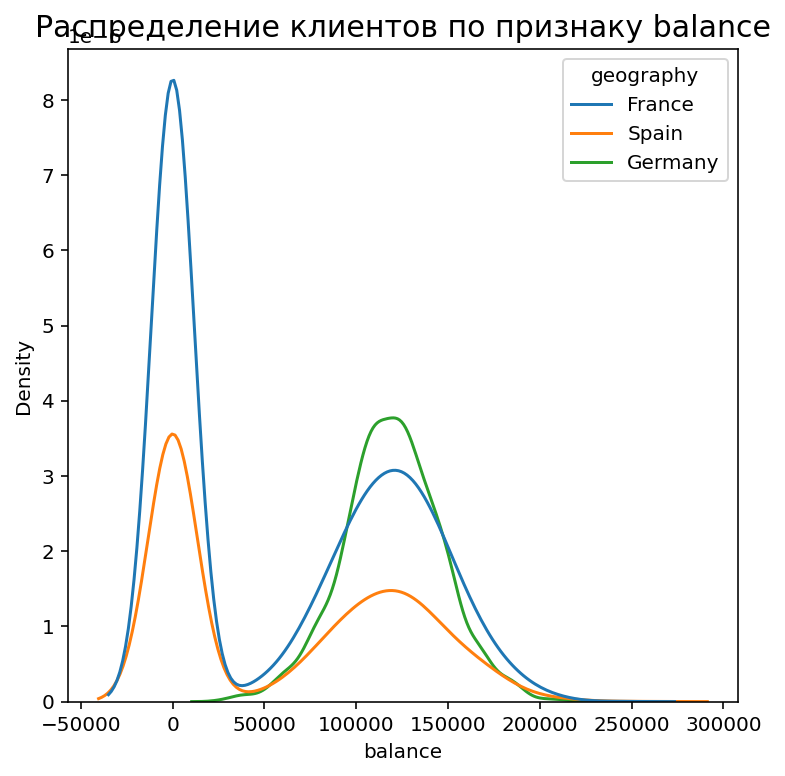

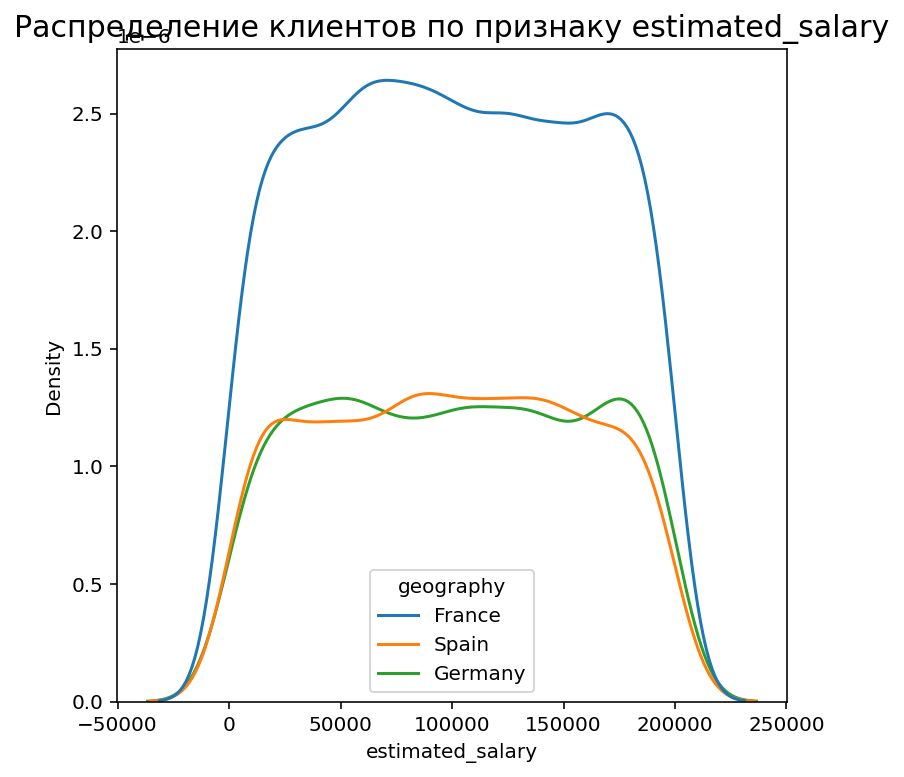

In [29]:
view(df, hue='geography') 

Можно отметить, что все признаки в Франции выше, чем в двух других странах, так как там больше клиентов, кроме признака баланса - в Германии баланс выше, чем в других странах, также можно отметить, что в Германии отток больше, чем в Испании, хотя в Германии клиентов больше, думаю это связано больше с качеством услуг, предоставляемых в банке.

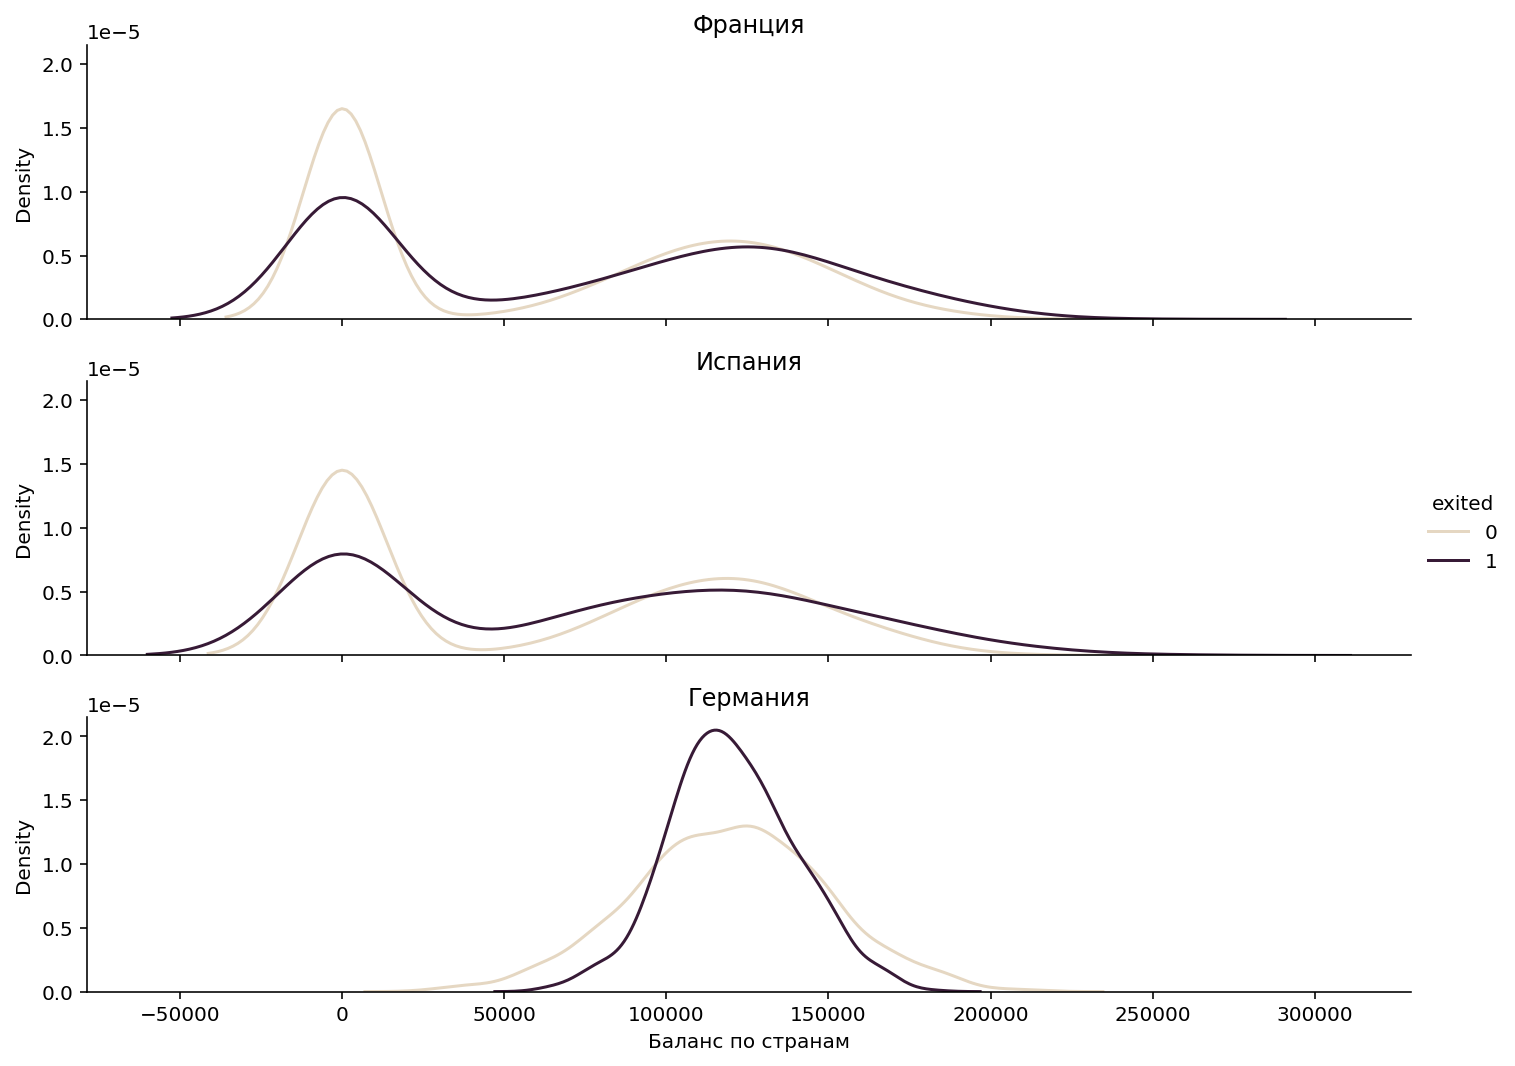

In [30]:
geography_balance = sns.FacetGrid(df, row='geography', hue='exited',height=2.5, aspect=4, palette="ch:.25")
geography_balance.map(sns.kdeplot, 'balance')
geography_balance.set_xlabels('Баланс по странам')
axes = geography_balance.axes.flatten()
axes[0].set_title("Франция")
axes[1].set_title("Испания")
axes[2].set_title("Германия")
geography_balance.add_legend()

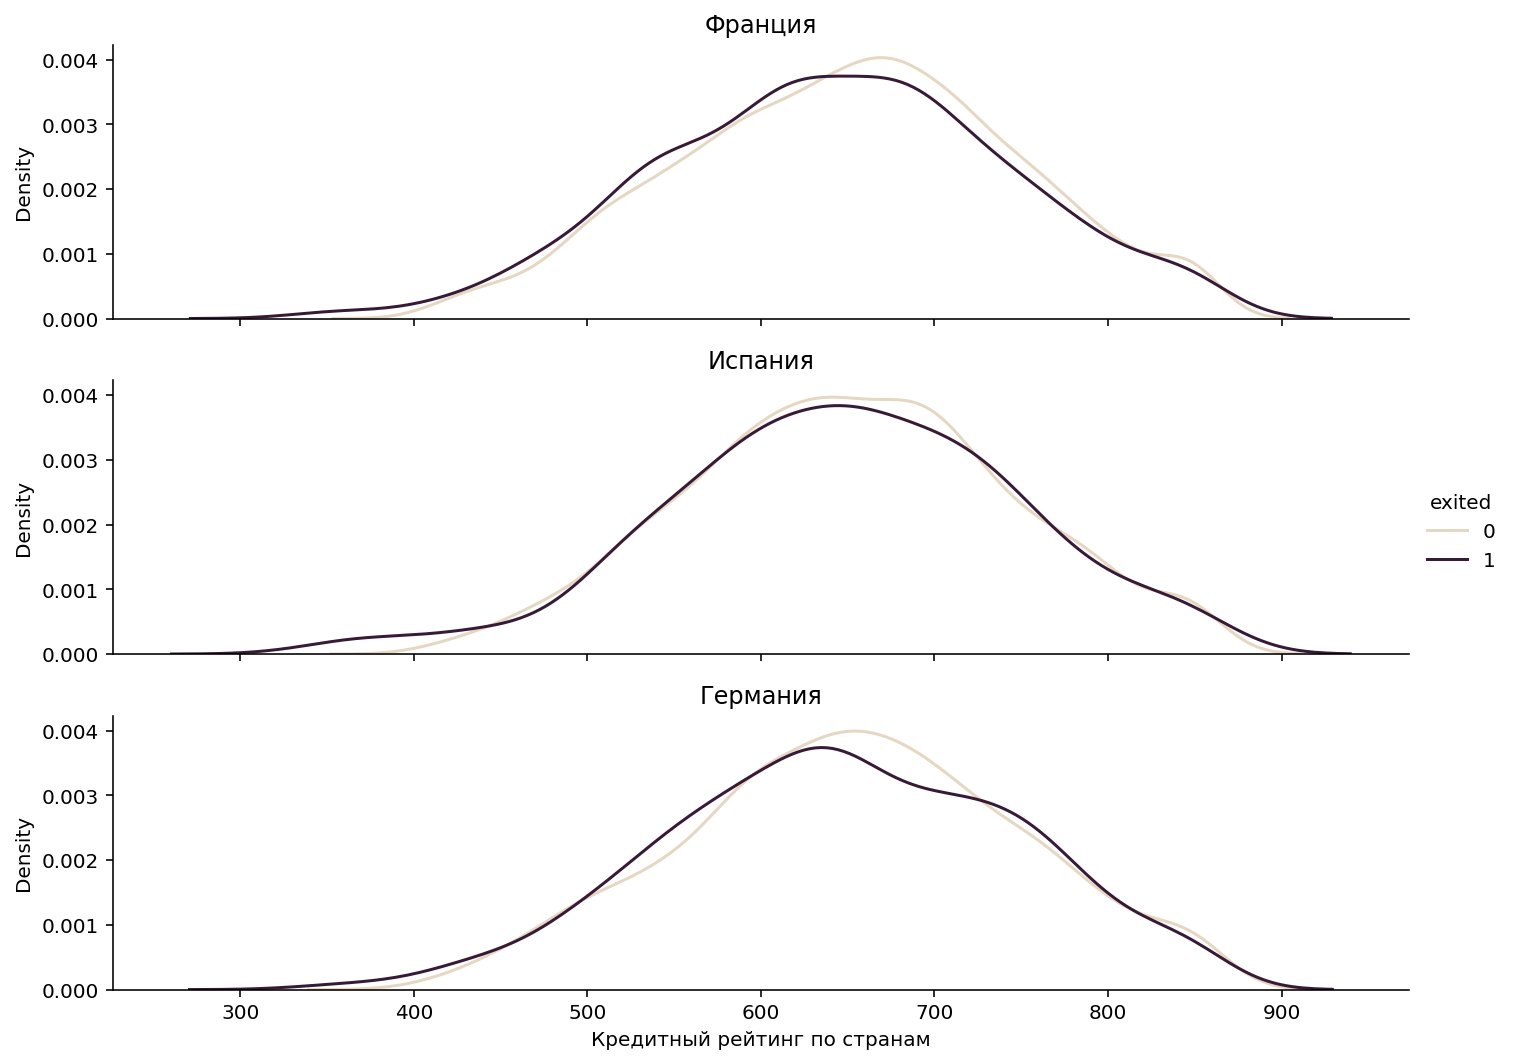

In [31]:
geography_score = sns.FacetGrid(df, row='geography', hue='exited',height=2.5, aspect=4, palette="ch:.25")
geography_score.map(sns.kdeplot, 'credit_score')
geography_score.set_xlabels('Кредитный рейтинг по странам')
axes = geography_score.axes.flatten()
axes[0].set_title("Франция")
axes[1].set_title("Испания")
axes[2].set_title("Германия")
geography_score.add_legend()

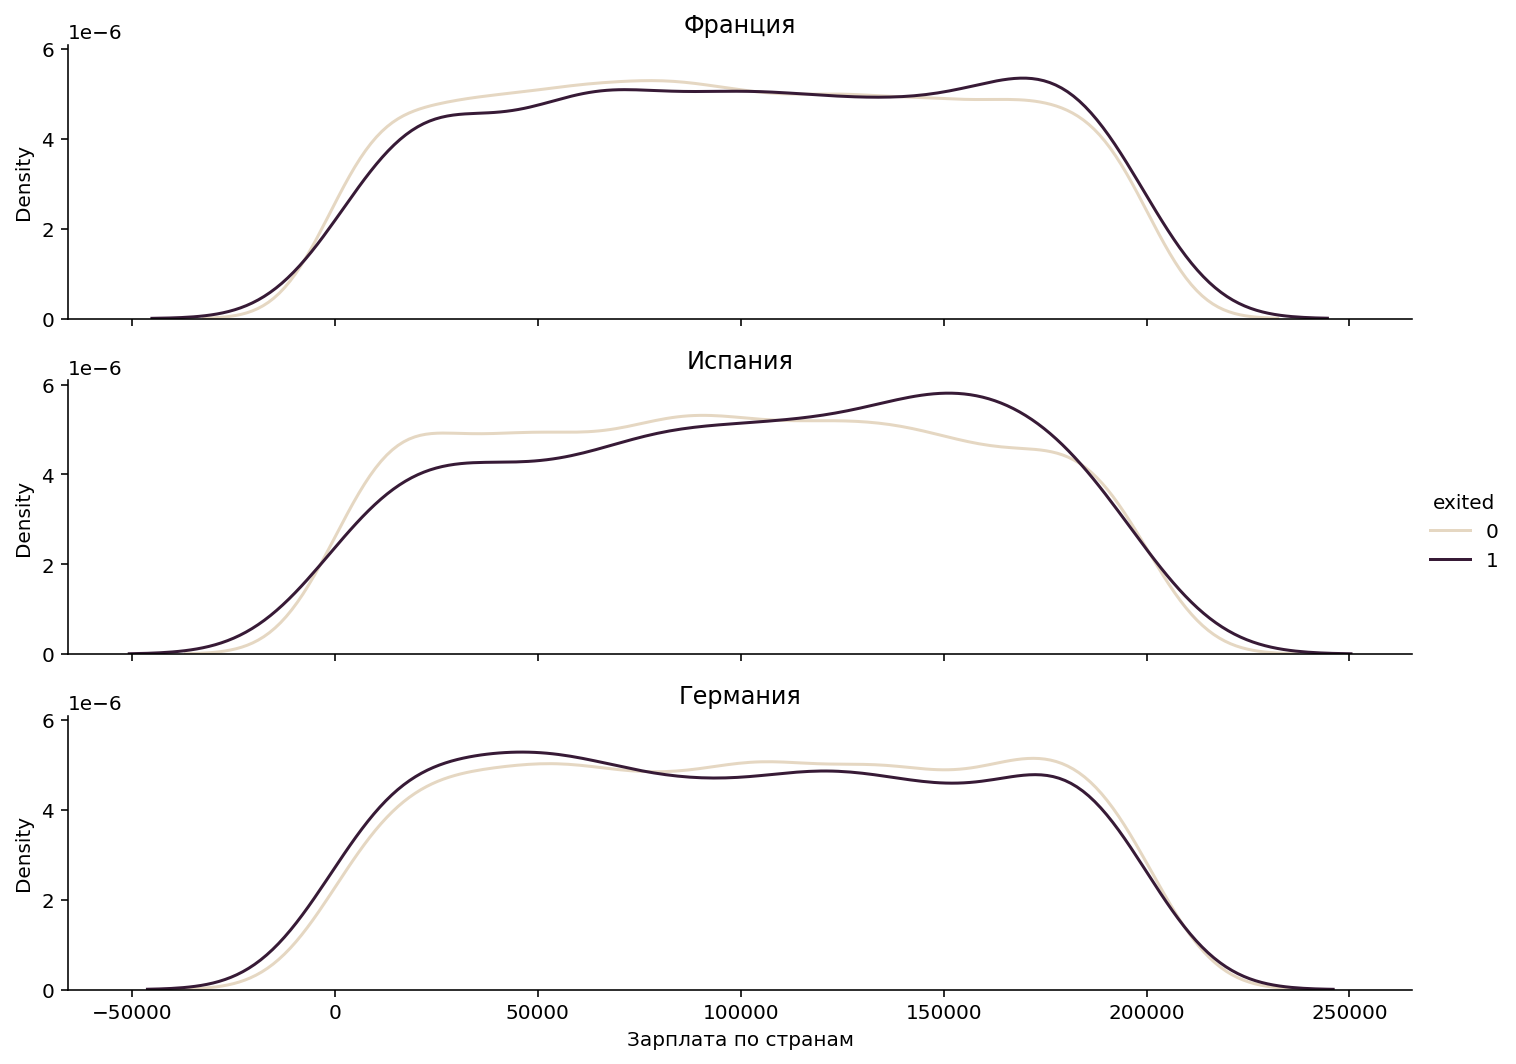

In [32]:
geography_salary = sns.FacetGrid(df, row='geography', hue='exited', height=2.5, aspect=4, palette="ch:.25")
geography_salary.map(sns.kdeplot, 'estimated_salary')
geography_salary.set_xlabels('Зарплата по странам')
axes = geography_salary.axes.flatten()
axes[0].set_title("Франция")
axes[1].set_title("Испания")
axes[2].set_title("Германия")
geography_salary.add_legend()

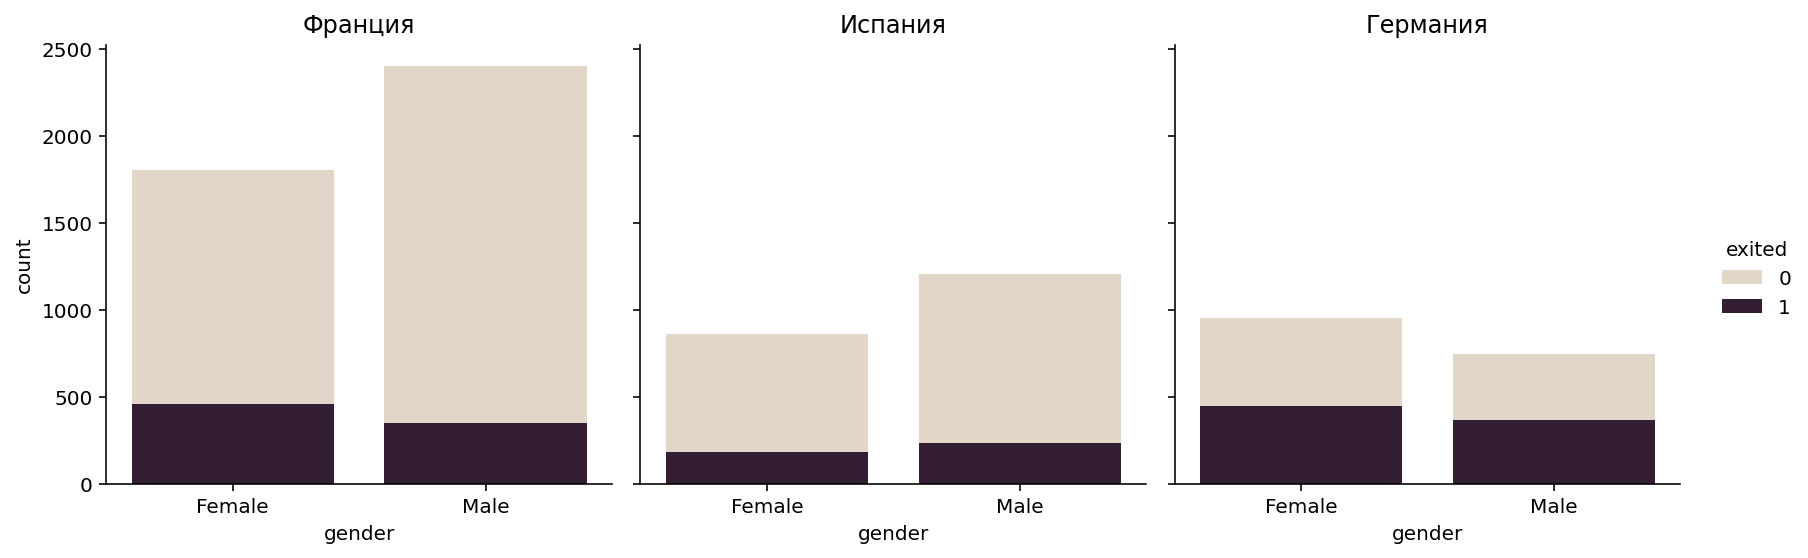

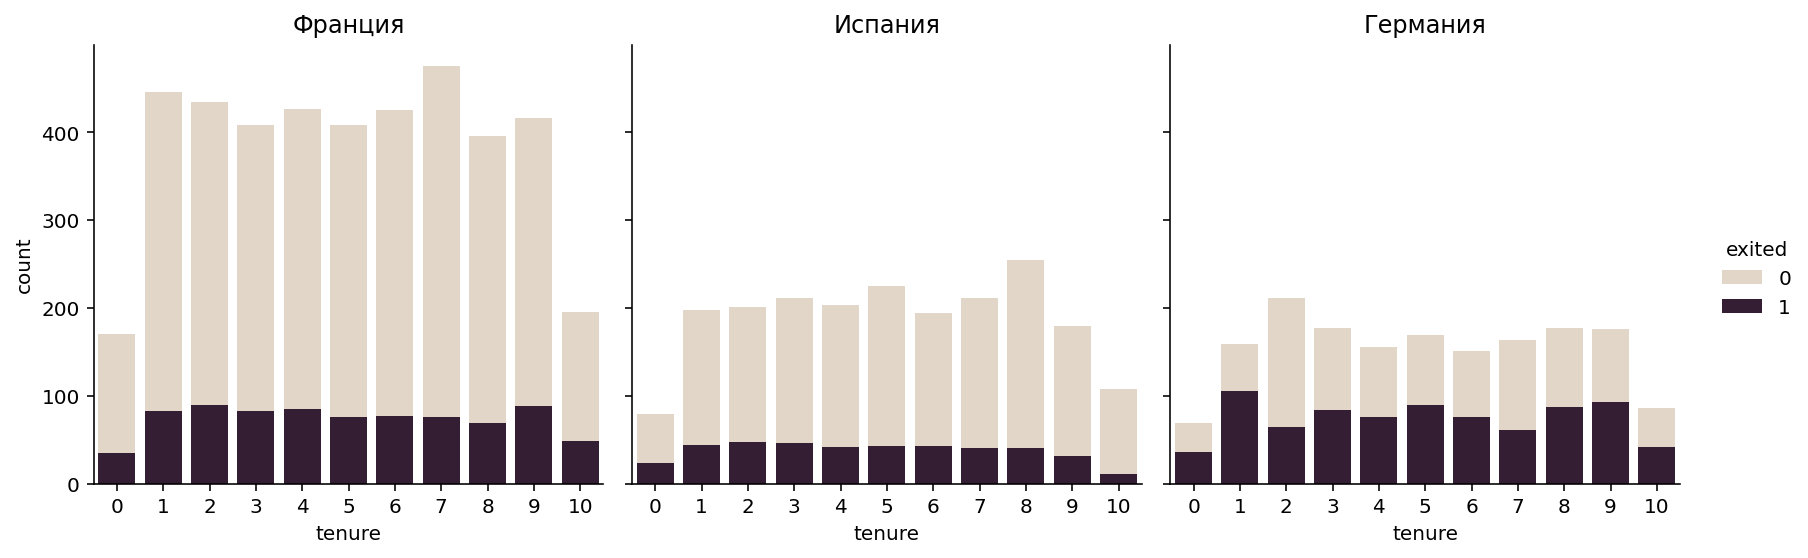

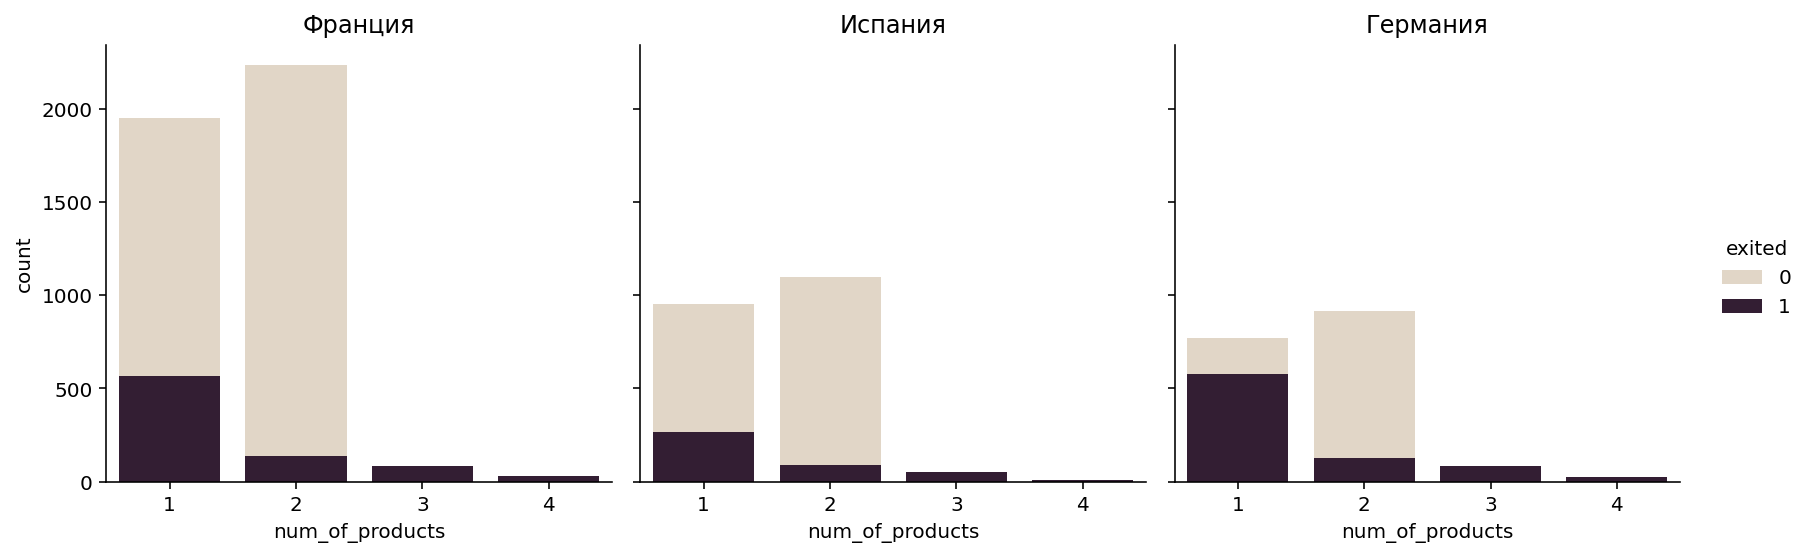

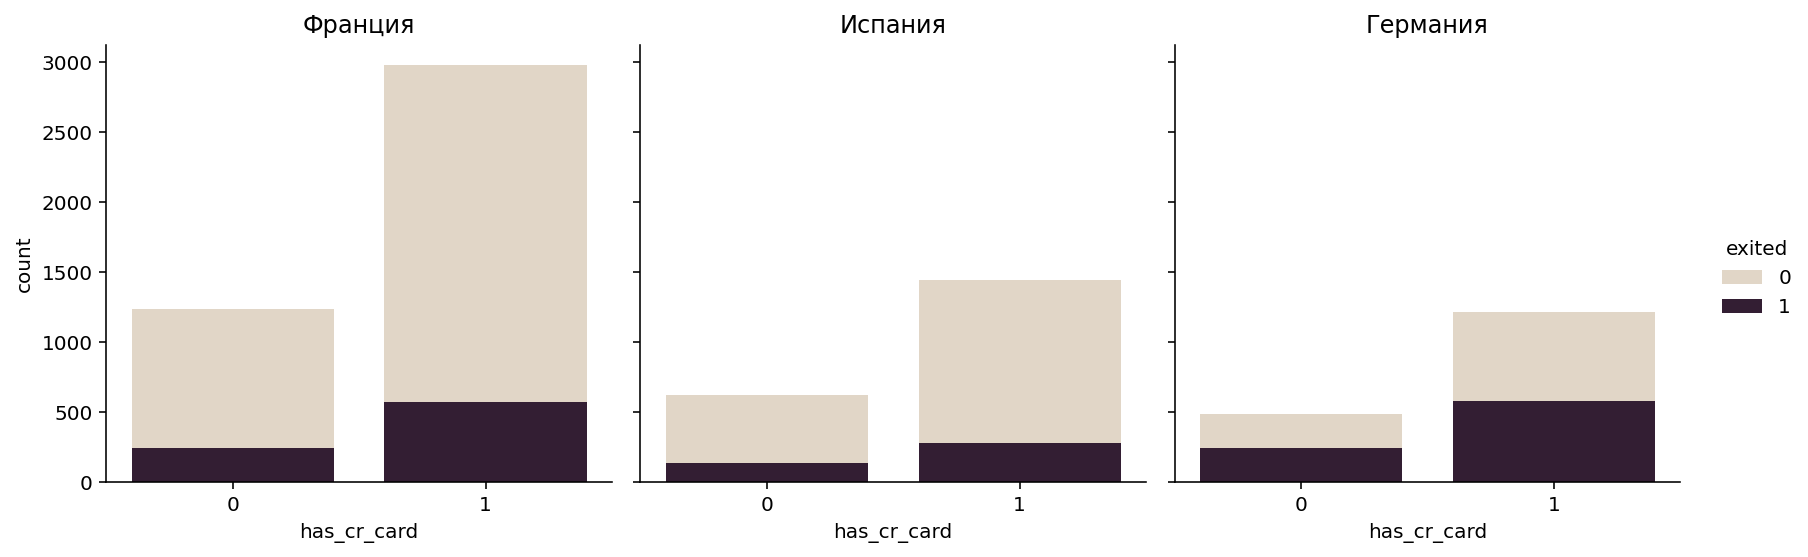

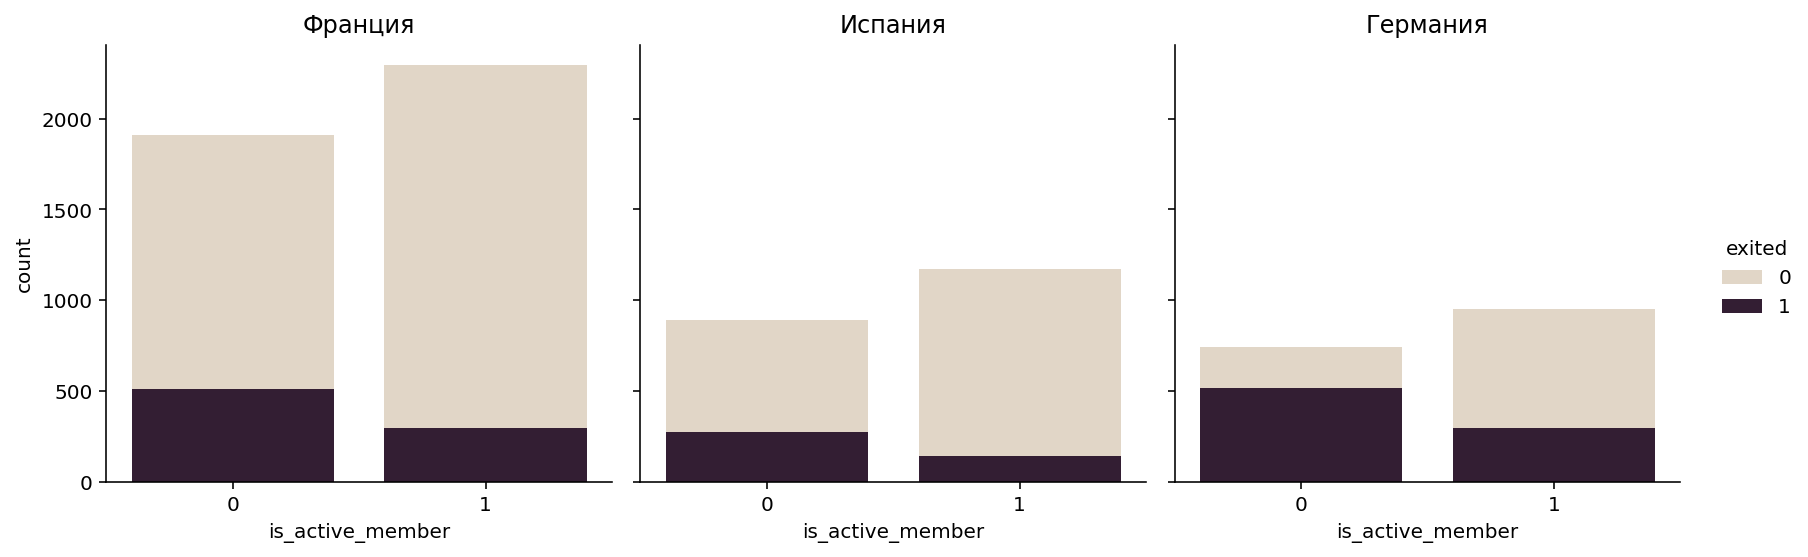

In [33]:
order = ['gender', 'tenure', 'num_of_products', 'has_cr_card', 'is_active_member']

for i in order:
    g = sns.FacetGrid(df, col='geography', hue='exited', height=4, aspect=1, palette="ch:.25")
    g.map(sns.countplot, i)
    axes = g.axes.flatten()
    axes[0].set_title("Франция")
    axes[1].set_title("Испания")
    axes[2].set_title("Германия")
    g.add_legend()
    g.tight_layout()

**Что можно отметить:**

- по балансу: отток клиентов выше в Германии, однако, это едиственная страна, где у клиентов нет нулевого баланса на счете
- по зп: клиенты с разным уровнем дохода уходят, значит невозможно связать отток из стран с зп
- по гендеру: во всех странах склонны уходить из банка женщины
- по объектам недвижимости: сложно сказать в Франции и Испании, а вот в Германии больше склонны уходить клиенты с 1 объектом 
- по кредиткам: уходят клиенты, которые пользуются кредитками 
- по кол-ву продуктов: уходят клиенты, которые пользуются 3-4 продуктами во всех странах, и те, кто пользуется 1 продуктом, а те, кто используют ровно 2 продукта не склонны к оттоку
- по лояльности: склонны уходить из всех филиалов клиенты с низкой лояльностью

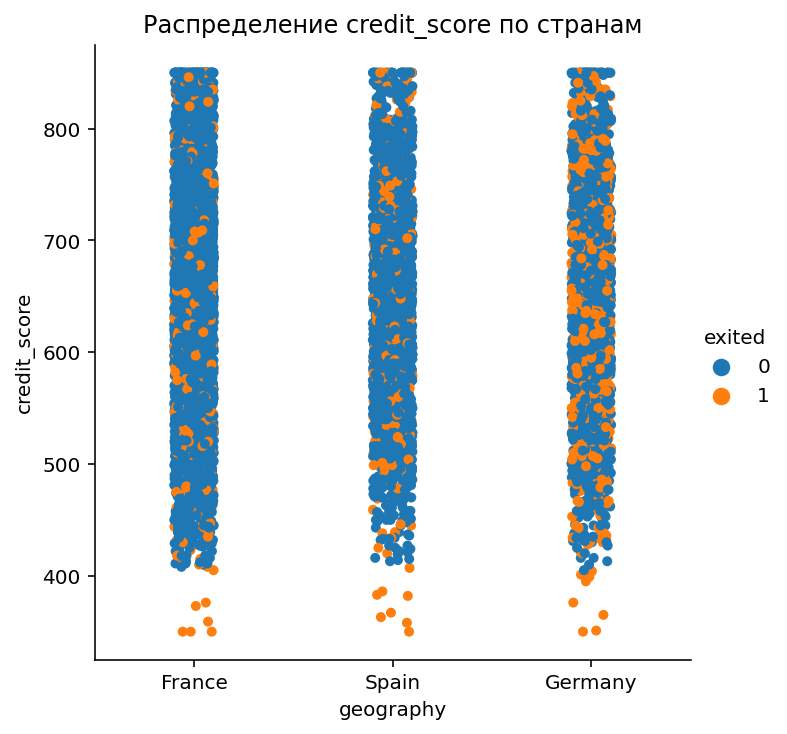

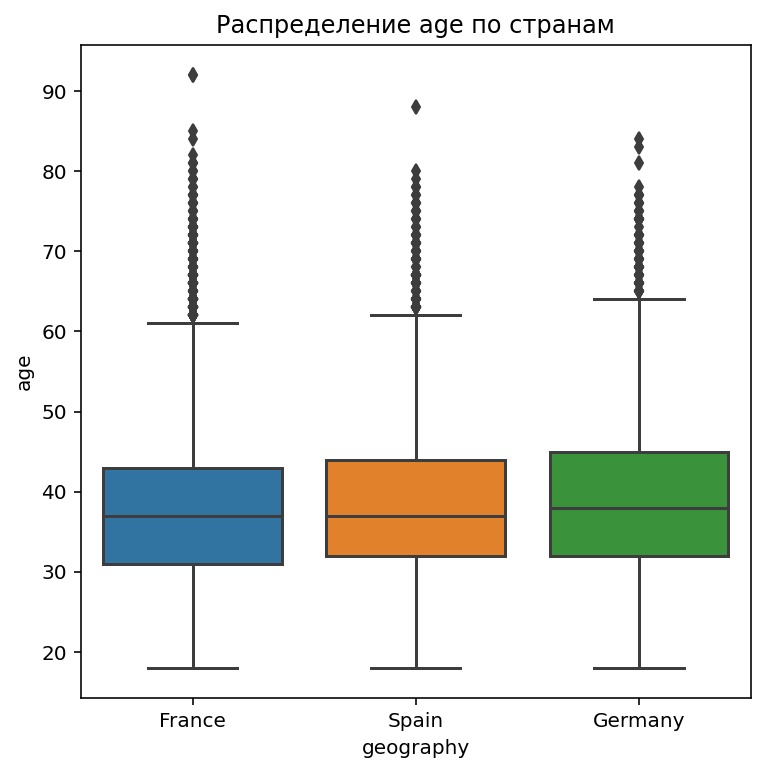

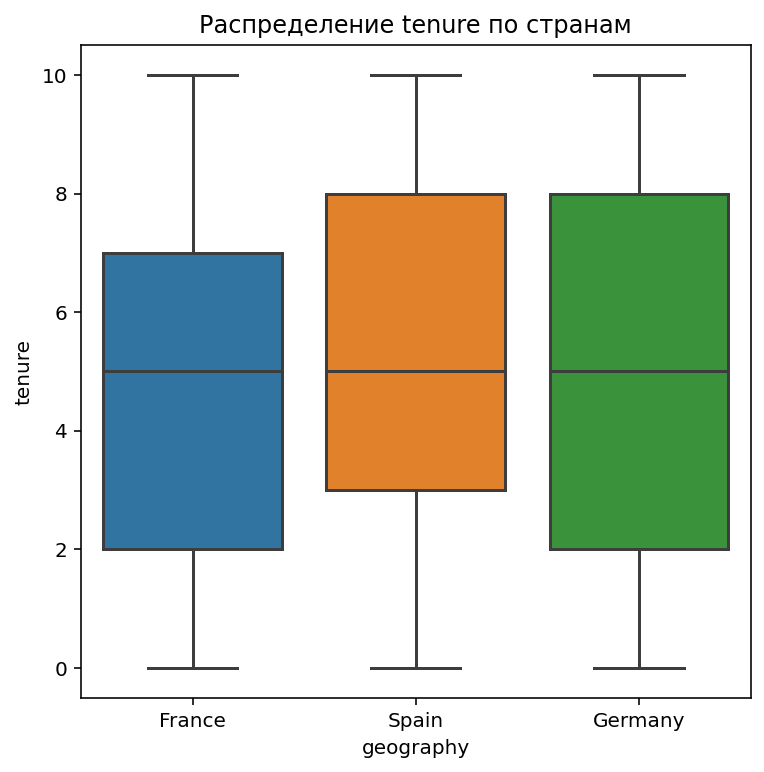

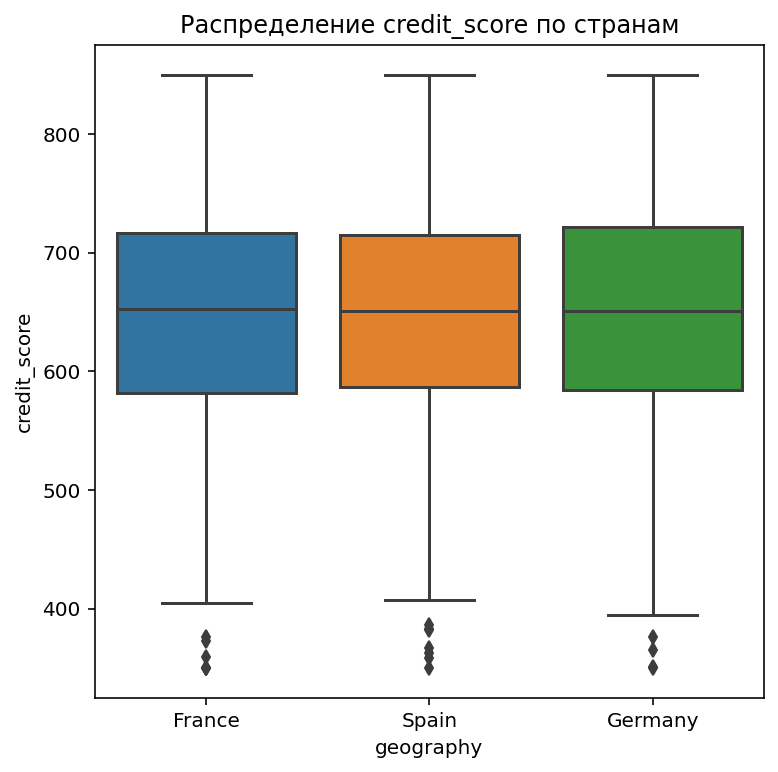

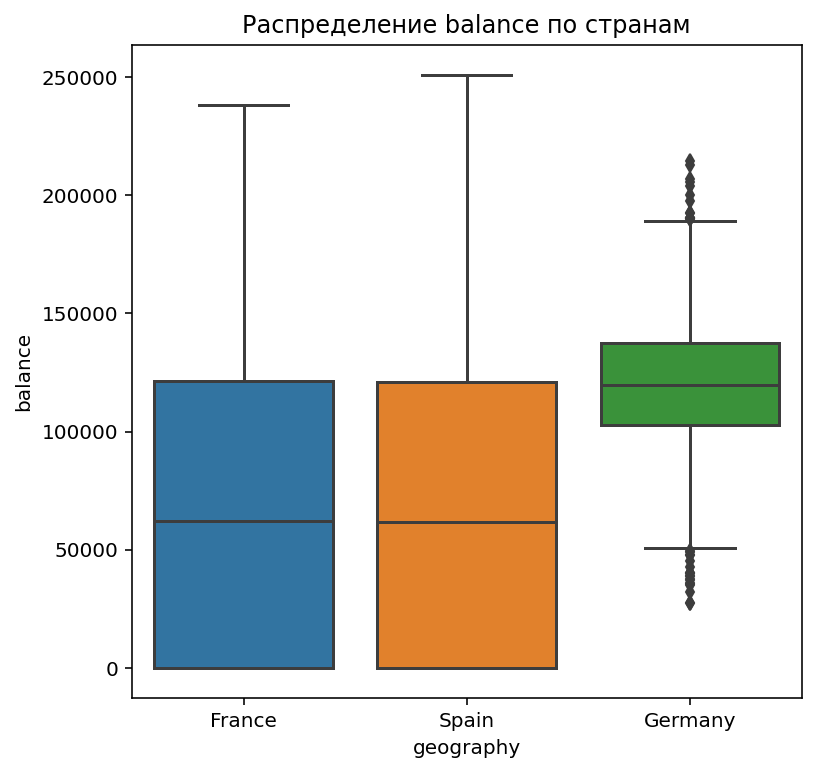

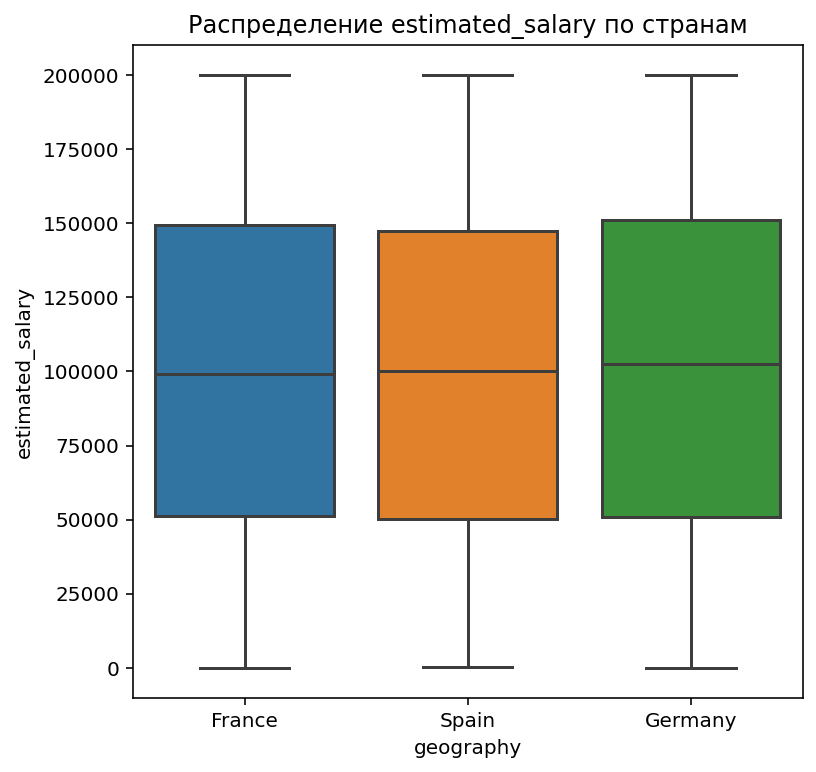

In [34]:
# посмотрим есть ли зависимость между какими-либо категориями признаков и страной обслуживания

for column in ['credit_score']:
    sns.catplot(y=column, x='geography', hue='exited', data=df).set(title=f'Распределение {column} по странам');
    plt.show()
for column in ['age', 'tenure', 'credit_score',  'balance', 'estimated_salary']:
    sns.boxplot(x = 'geography', y = df[column], data = df).set(title=(f'Распределение {column} по странам'))
    plt.show()

**Что можно отметить по графикам:**

- в Германии клиентский отток больше, чем в Франции и Испании
- отточные клиенты, которые пользуются 3-4 продуктами во всех странах, но в Германии есть отток клиентов и с 1 и с 2 продуктами
- в среднем у клиентов 5 объектов недвижимости во всех странах
- клиенты с рейтингом меньше 400 тоже возможно склонны к оттоку

### Анализ распредления клиентов по кол-ву продуктов с учетом оттока

In [35]:
#количество пользователей по продуктам
products_count = df.groupby('num_of_products')['num_of_products'].count().to_frame()
products_count.columns = ['products_count']
products_count

products_count
num_of_products                
1                          5084
2                          4590
3                           266
4                            60

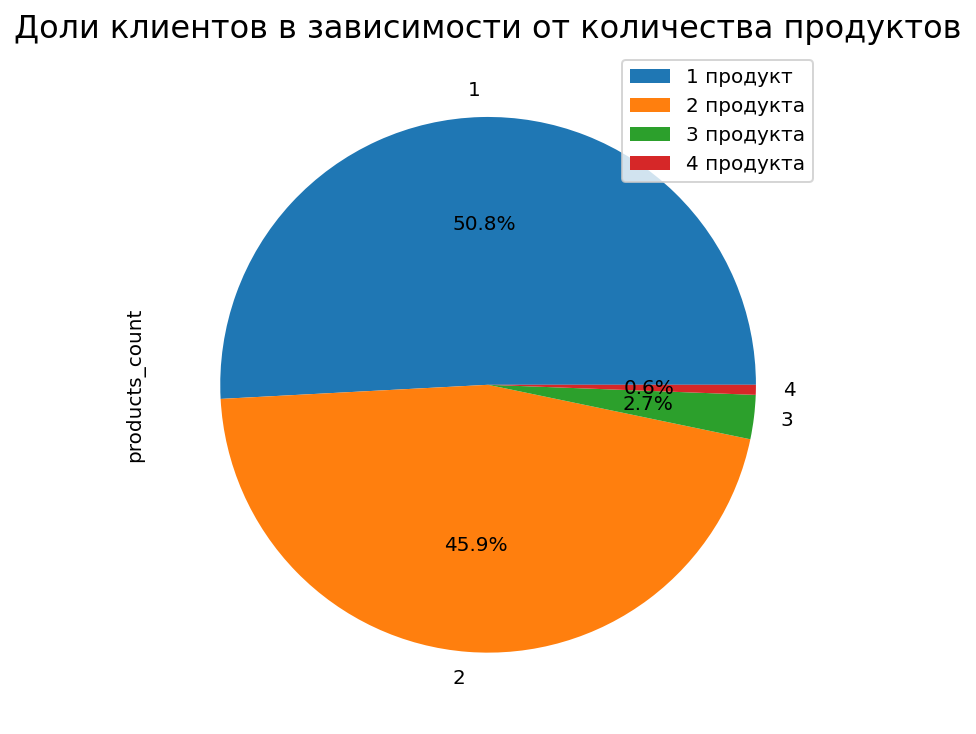

In [36]:
products_count.plot(kind = 'pie', y ='products_count', autopct='%1.1f%%', figsize= (6,8))
plt.title('Доли клиентов в зависимости от количества продуктов', fontsize = 16)
plt.legend(['1 продукт','2 продукта','3 продукта','4 продукта'])
plt.show()

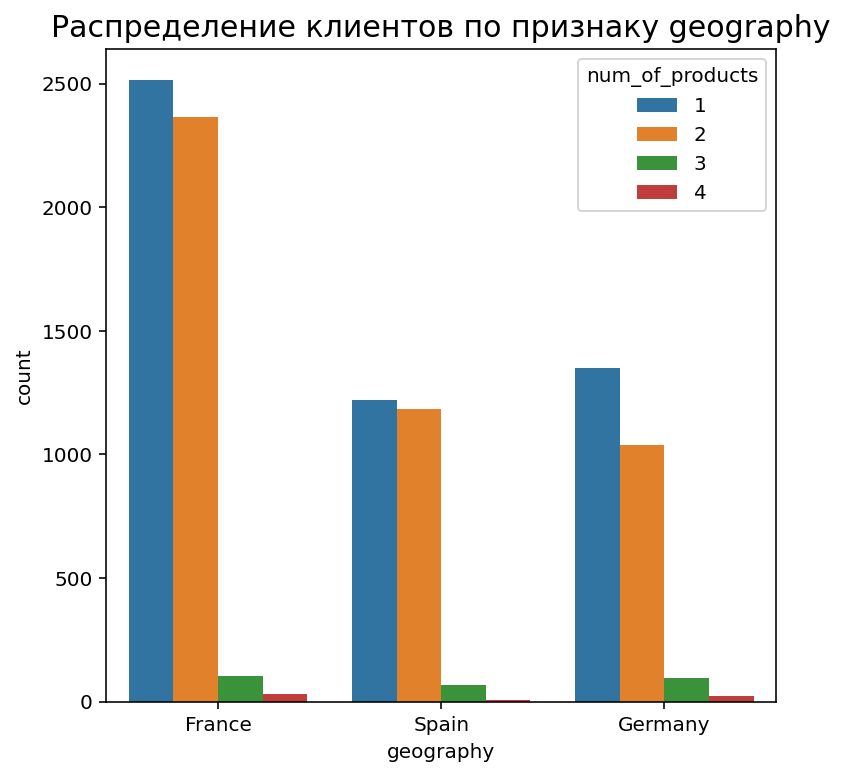

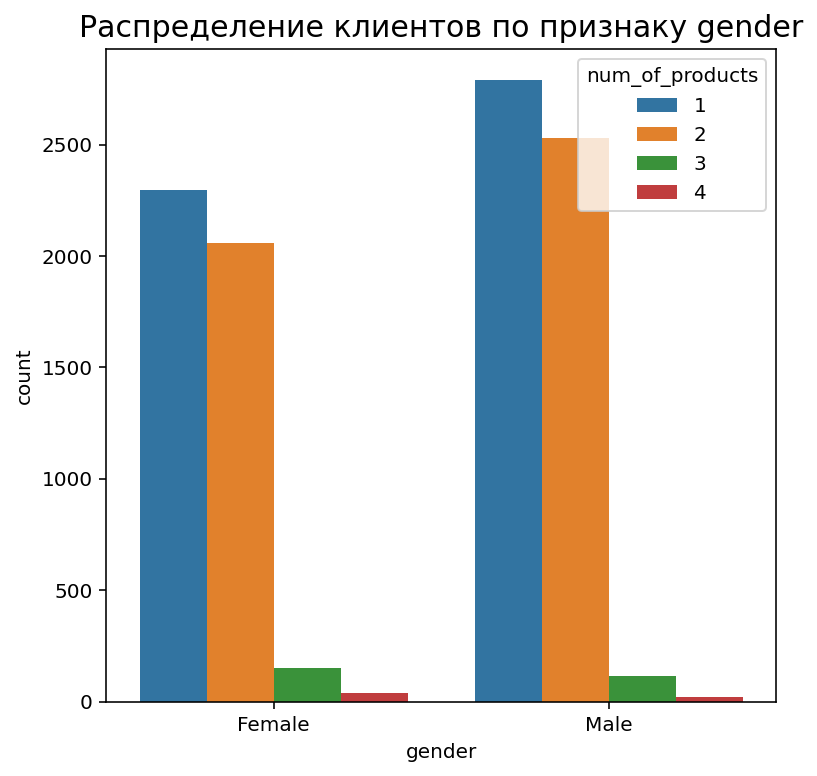

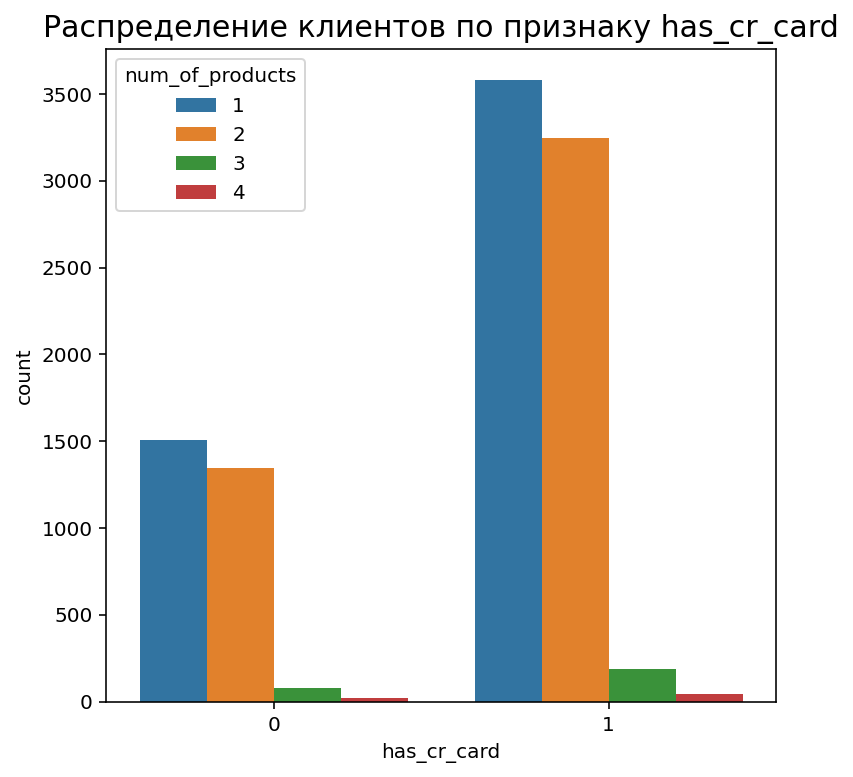

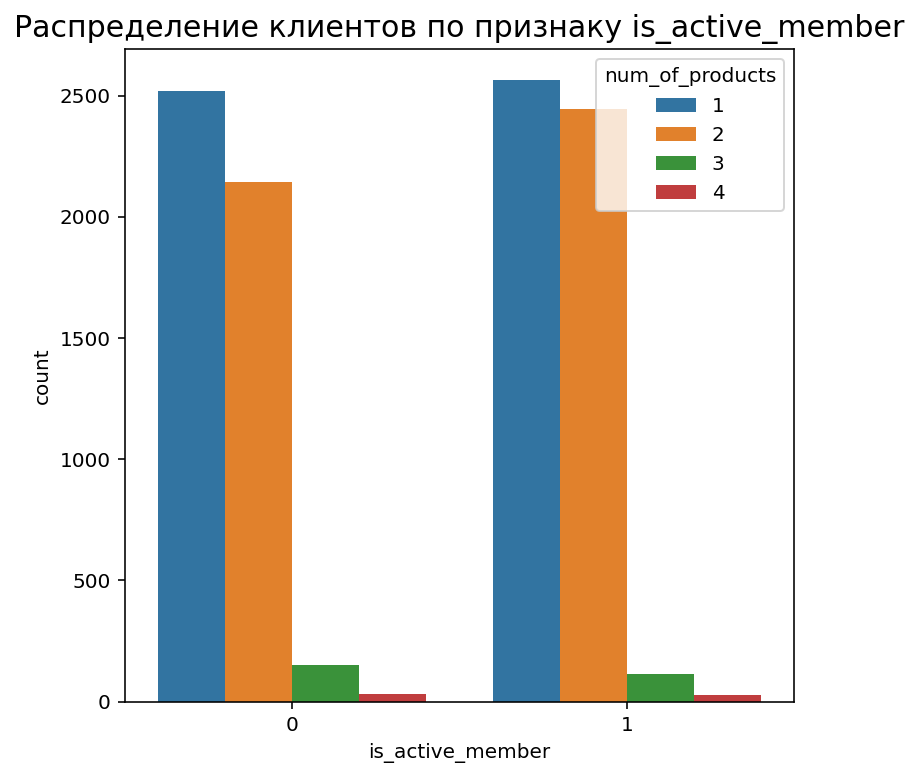

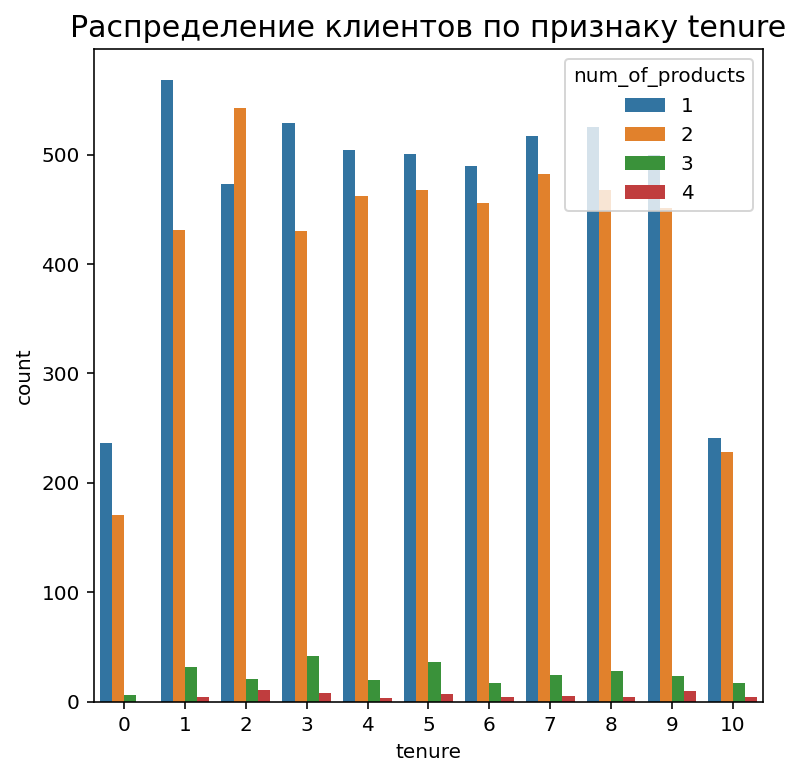

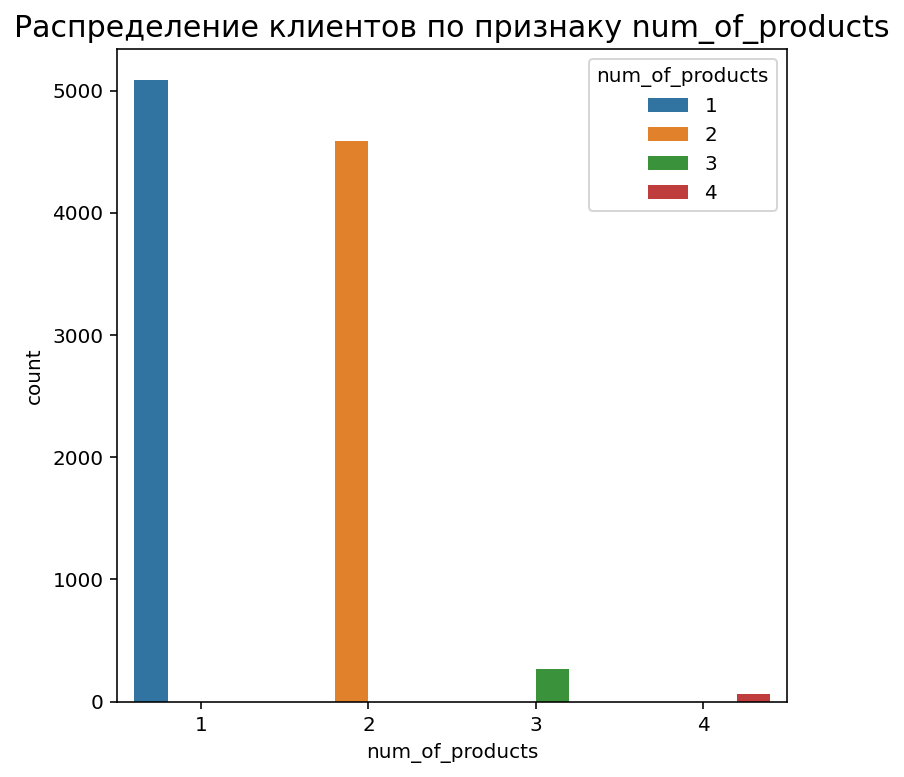

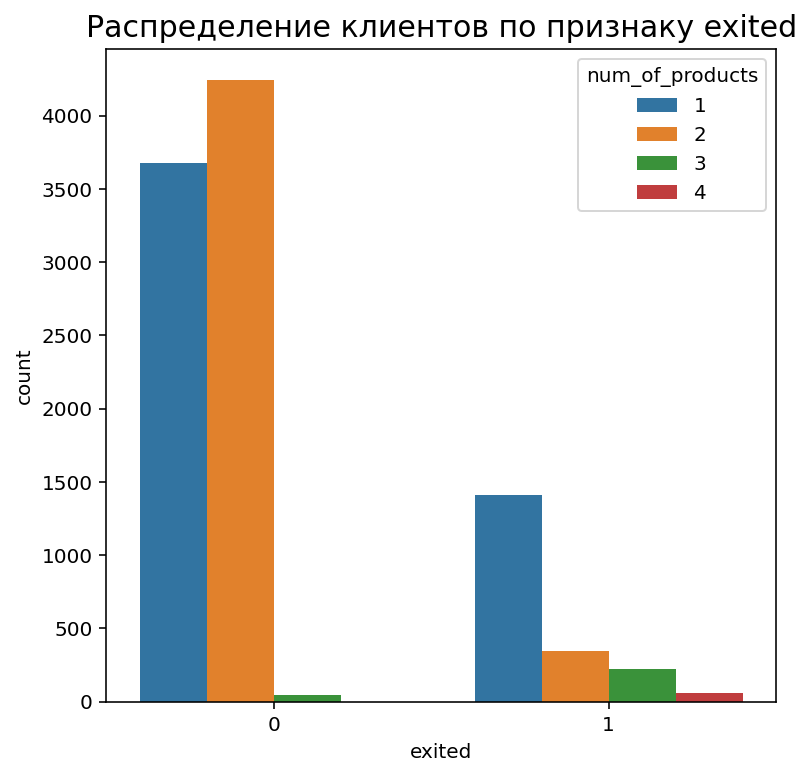

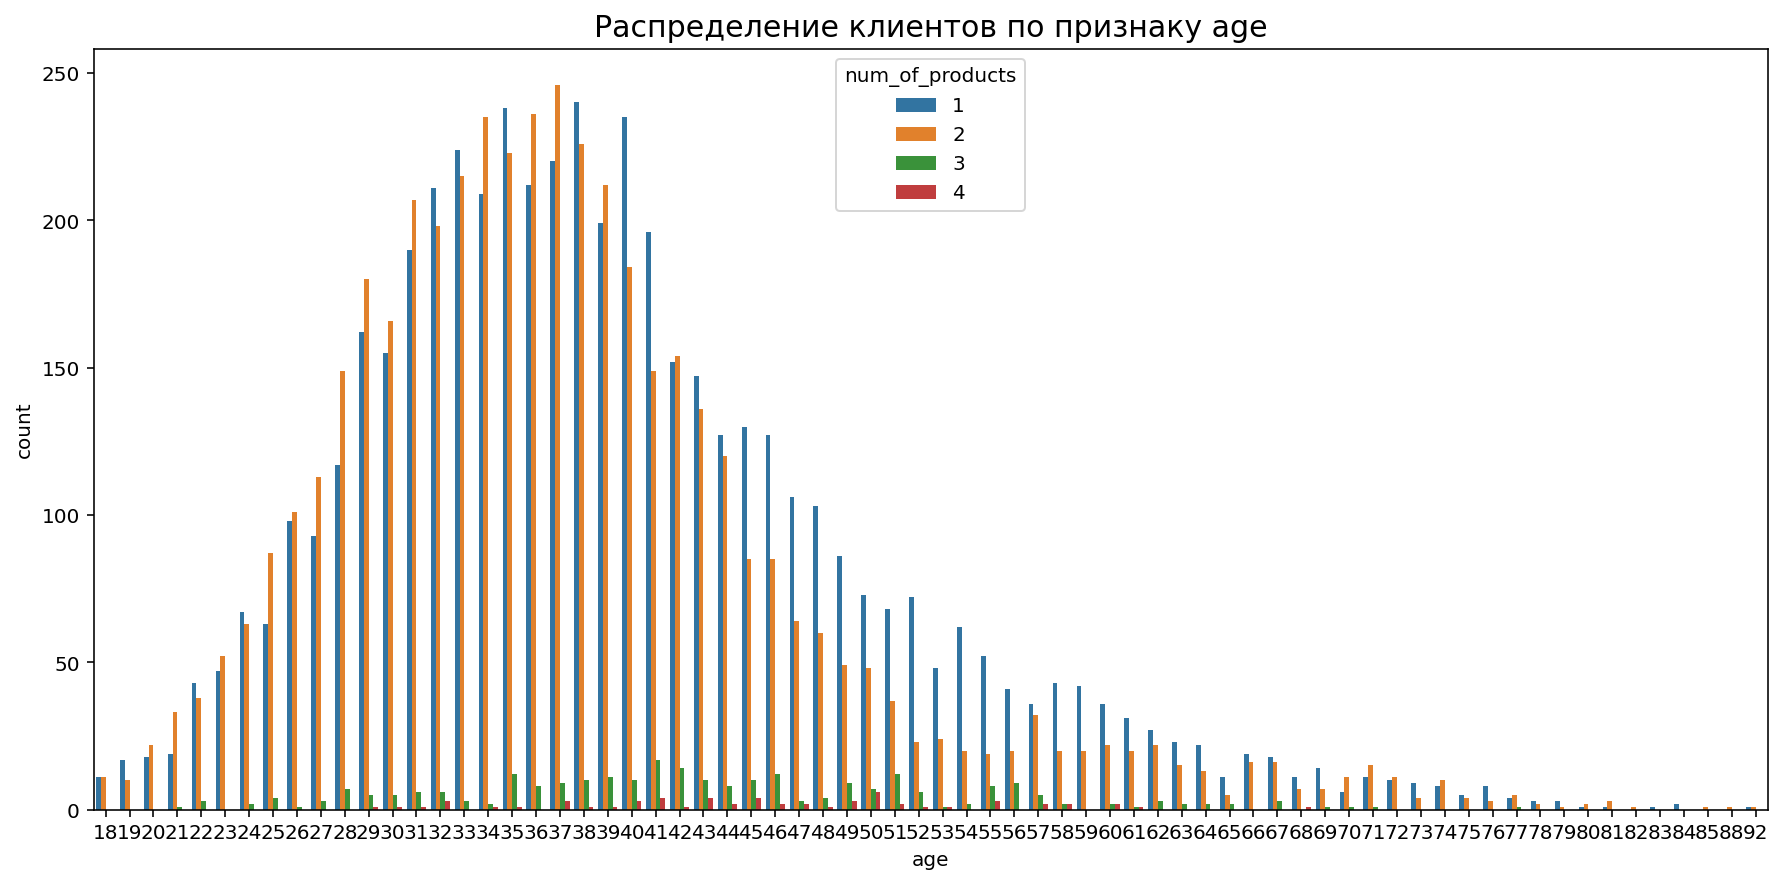

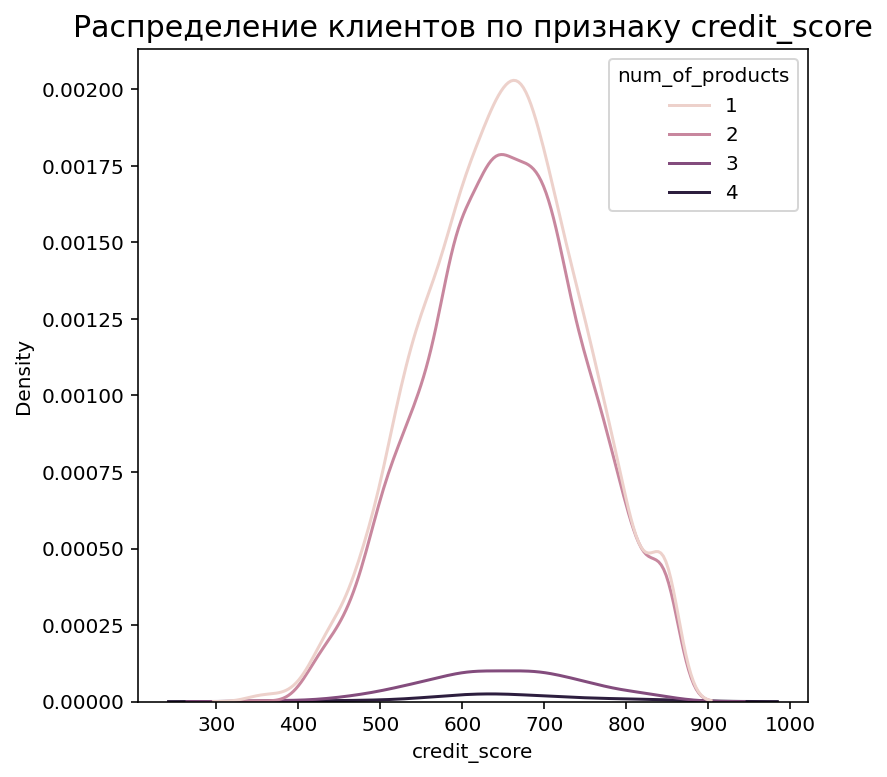

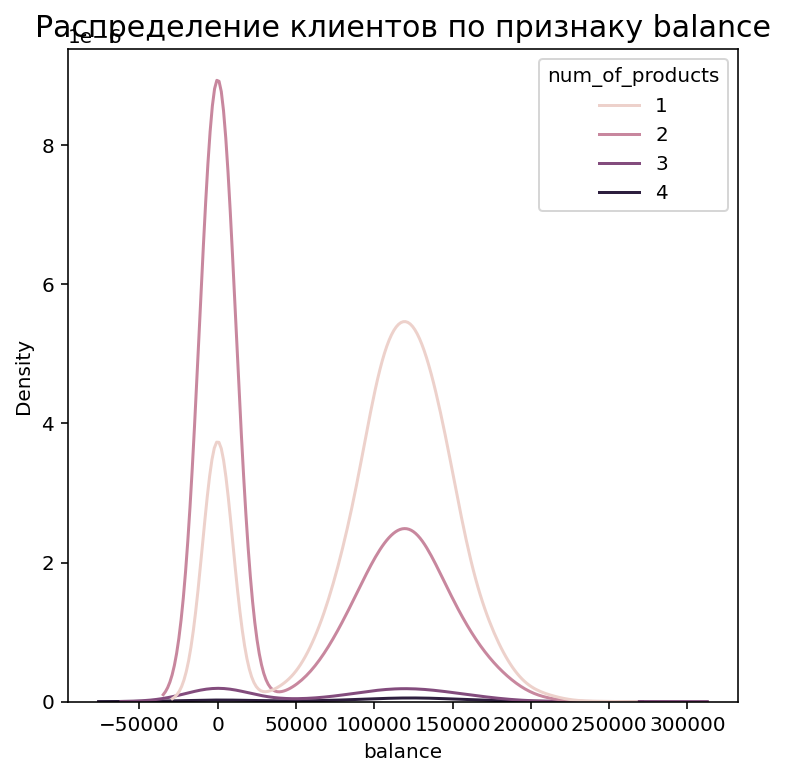

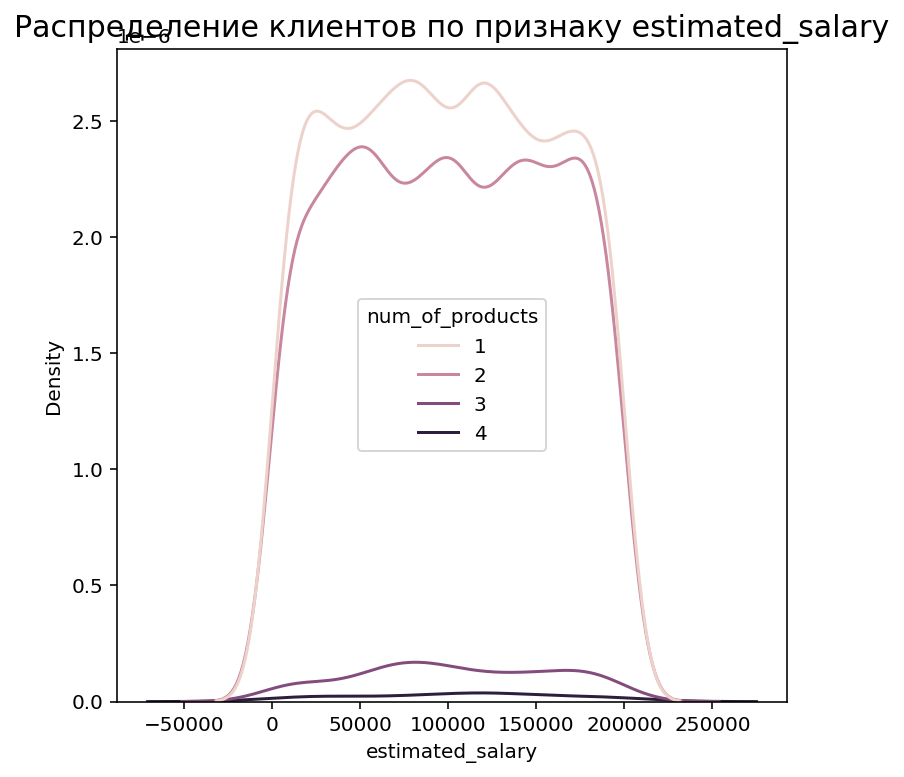

In [37]:
view(df, hue='num_of_products')    

**Что можно отметить:**
- **Клиенты, которые пользуются 1-2 продуктами:** самые многочисленные, одним продуктом пользуются чуть больше, чем двумя сразу, но разница совсем небольшая. Распределены следующим образом: в Франции, конечно, больше всего, так как там больше клиентов; в Испании и Германии примерно одинаково. Мужчин больше, чем женщин, которые пользуются этим кол-вом продуктов; Лояльность примерно одинаковая; Тенденции по возрасту, балансу, рейтингу и зп примерно такая же как в остальных пунктах анализа.
- **Клиенты, которые пользуются 3 продуктами:** можно сказать, что тремя продуктами тоже пользуются, но в сравнении использолвания 1-2 продуктов, очень малая часть.
- **Клиенты, которые пользуются 4 продуктами:** клиенты вообще не пользуются - 60 человек - это менее 1% всех клиентов.

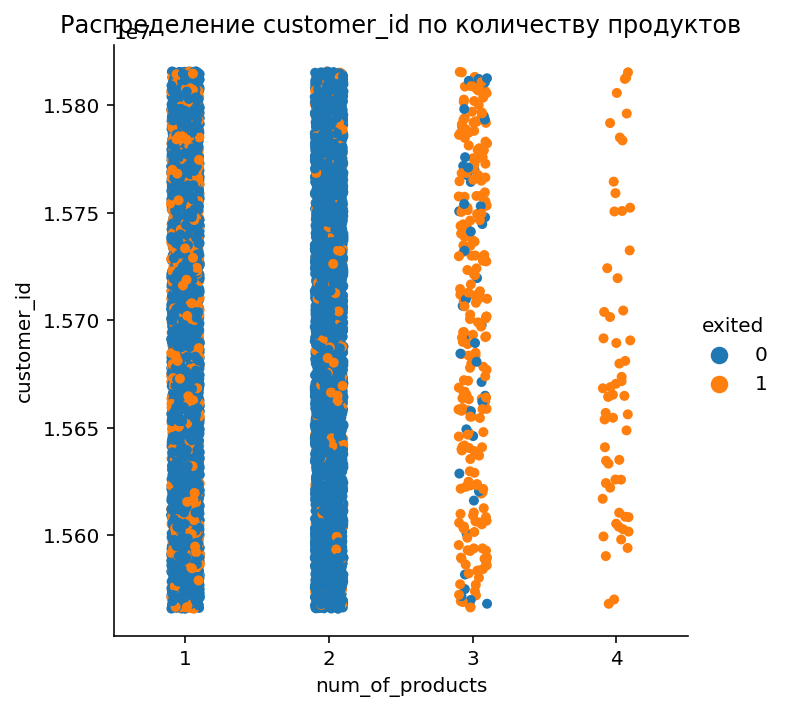

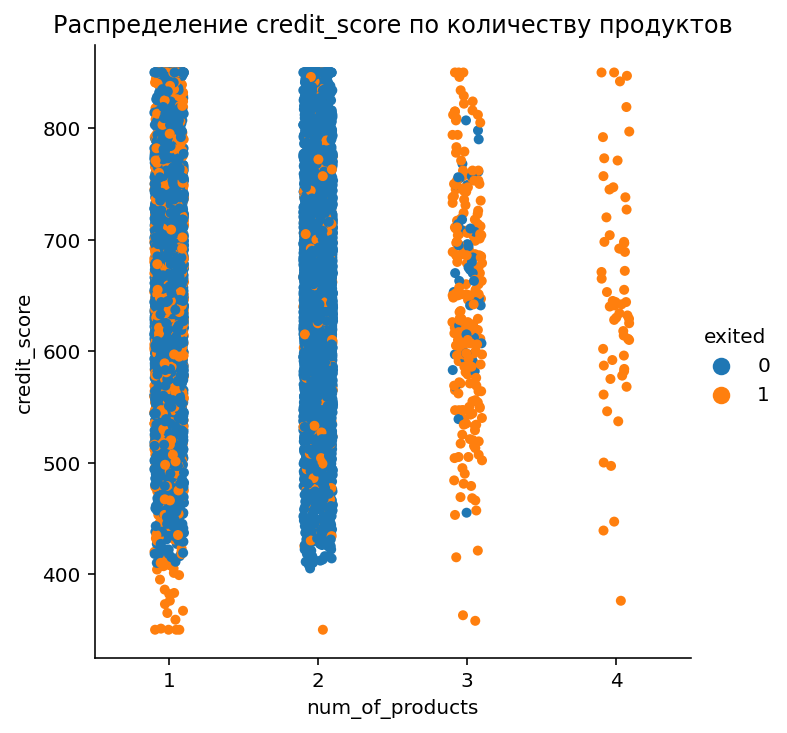

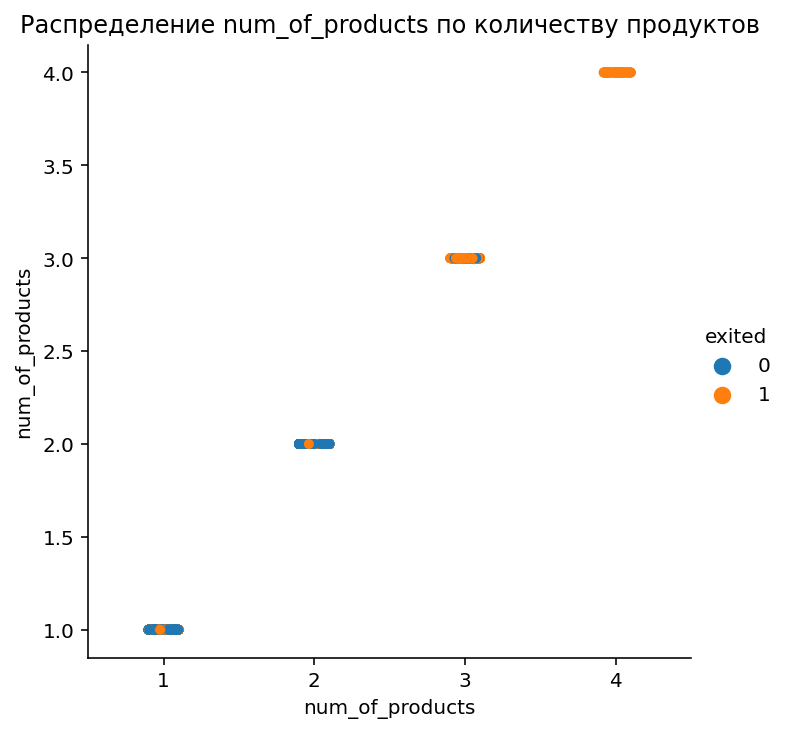

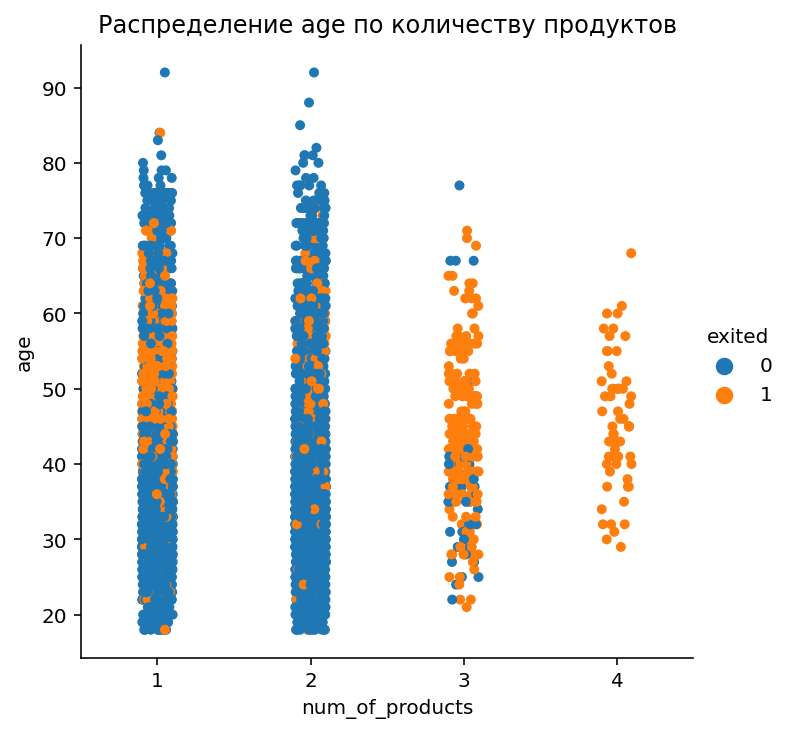

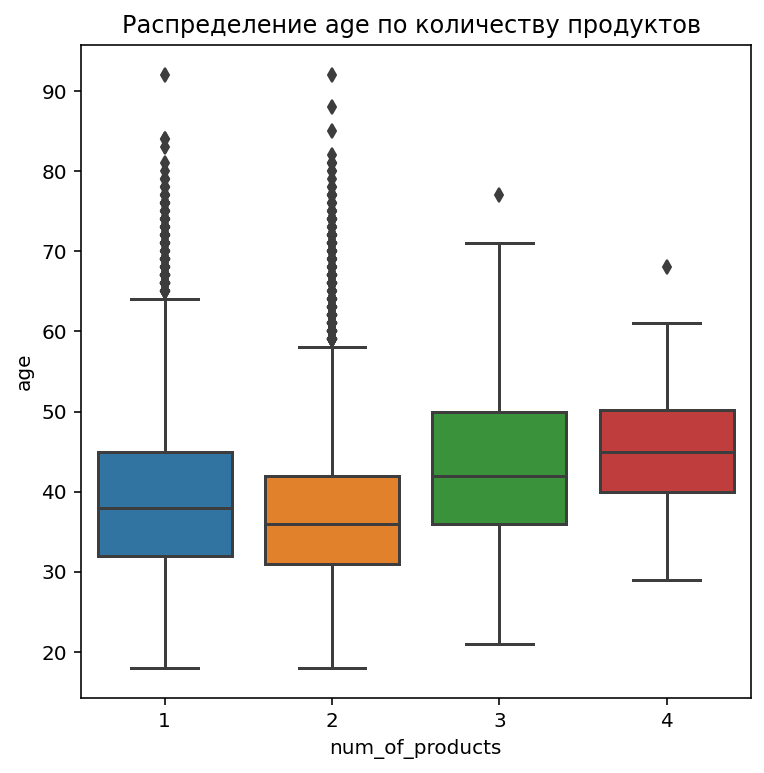

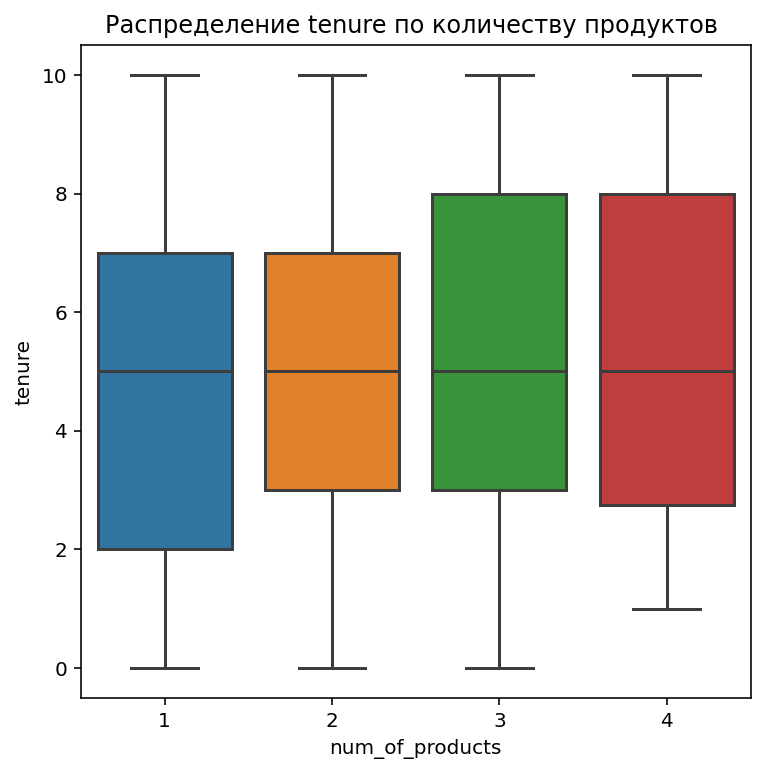

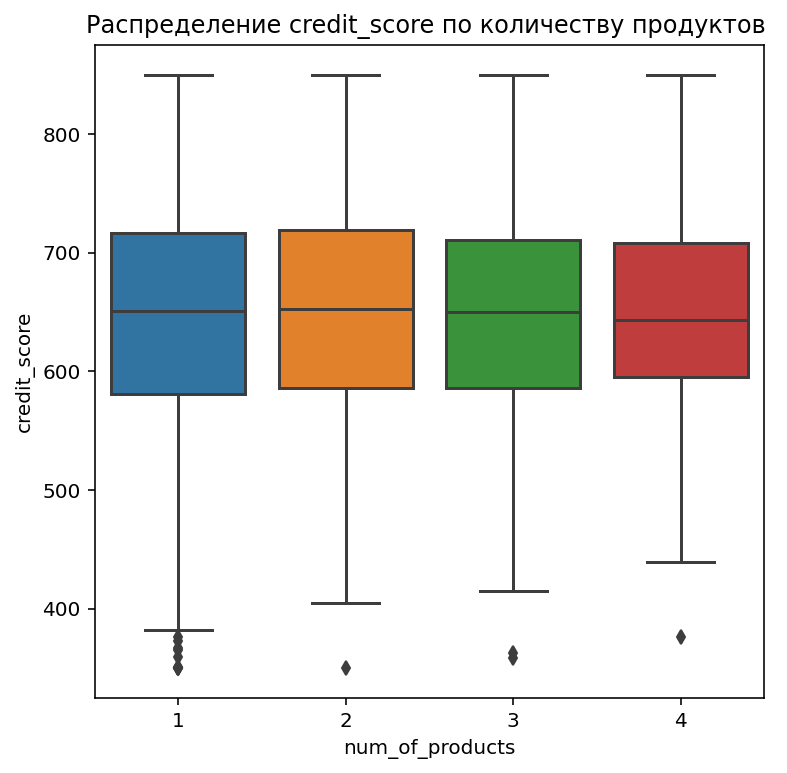

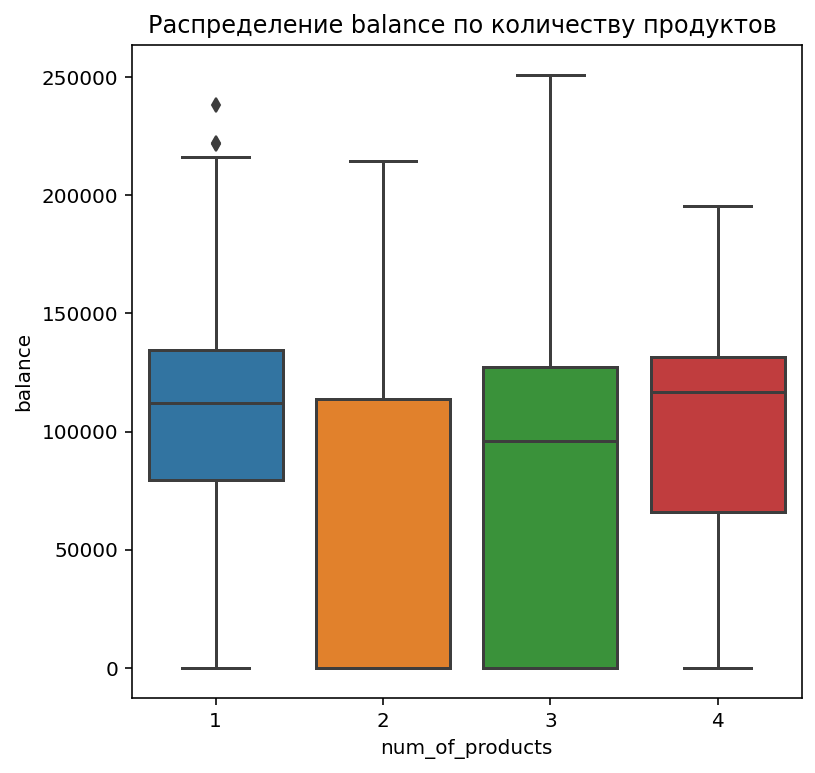

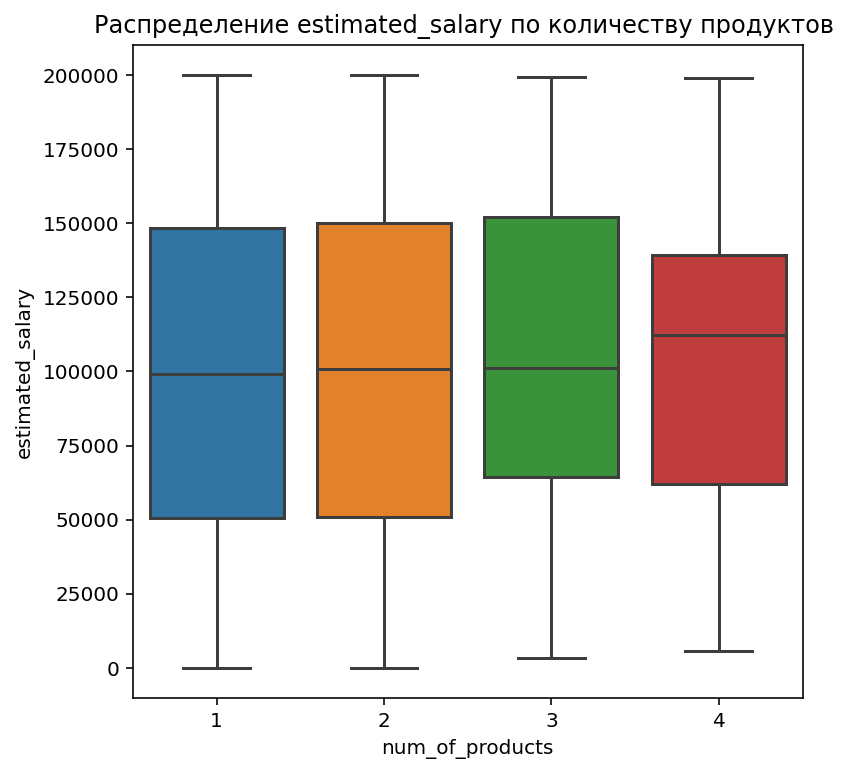

In [38]:
for column in  ['customer_id','credit_score', 'num_of_products', 'age']:
    sns.catplot(y=column, x='num_of_products', hue='exited', data=df).set(
        title=f'Распределение {column} по количеству продуктов');
    plt.show()
for column in ['age', 'tenure', 'credit_score',  'balance', 'estimated_salary']:
    sns.boxplot(
        x = 'num_of_products', y = df[column], data = df).set(
        title=(f'Распределение {column} по количеству продуктов '))
    plt.show()

**Что можно отметить:**
- похоже, клиенты с ретингом 400 и меньше все-таки уходят
- возраст уходящих клиентов, которые пользуются одним продуктом, 45-60 лет; двумя продуктами - 50-60; тремя - 40-60; четырьмя - 30-60

### Определение признаков, наиболее влияющих на отток при помощи матрицы корреляций

In [39]:
data = df.copy()
data = data.drop(['surname', 'row_number'], axis=1)

In [40]:
# Заменим значения в столбце geography и gender на числовые

data['geography_int'] = data['geography'].map({'France':0, 'Spain':1, 'Germany':2})
data['gender_int'] = data['gender'].map({'Male':1, 'Female':0})
# Преобразуем датафрейм методом get_dummies(), чтобы разделить столбец 'geography' на отдельные столбцы для каждой страны

data = pd.get_dummies(data)
data

customer_id  credit_score  age  tenure    balance  num_of_products  \
0        15634602           619   42       2       0.00                1   
1        15647311           608   41       1   83807.86                1   
2        15619304           502   42       8  159660.80                3   
3        15701354           699   39       1       0.00                2   
4        15737888           850   43       2  125510.82                1   
...           ...           ...  ...     ...        ...              ...   
9995     15606229           771   39       5       0.00                2   
9996     15569892           516   35      10   57369.61                1   
9997     15584532           709   36       7       0.00                1   
9998     15682355           772   42       3   75075.31                2   
9999     15628319           792   28       4  130142.79                1   

      has_cr_card  is_active_member  estimated_salary  exited  geography_int  \
0               1                 1         101348.88       1              0   
1               0                 1         112542.58       0              1   
2               1                 0         113931.57       1              0   
3               0                 0          93826.63       0              0   
4               1                 1          79084.10       0              1   
...           ...               ...               ...     ...            ...   
9995            1                 0          96270.64       0              0   
9996            1                 1         101699.77       0              0   
9997            0                 1          42085.58       1              0   
9998            1                 0          92888.52       1              2   
9999            1                 0          38190.78       0              0   

      gender_int  geography_France  geography_Germany  geography_Spain  \
0              0                 1                  0                0   
1              0                 0                  0                1   
2              0                 1                  0                0   
3              0                 1                  0                0   
4              0                 0                  0                1   
...          ...               ...                ...              ...   
9995           1                 1                  0                0   
9996           1                 1                  0                0   
9997           0                 1                  0                0   
9998           1                 0                  1                0   
9999           0                 1                  0                0   

      gender_Female  gender_Male  
0                 1            0  
1                 1            0  
2                 1            0  
3                 1            0  
4                 1            0  
...             ...          ...  
9995              0            1  
9996              0            1  
9997              1            0  
9998              0            1  
9999              1            0  

[10000 rows x 17 columns]

In [41]:
data = data.drop(['geography_int', 'gender_int'], axis=1)
data = data.query('balance > 0')

In [42]:
# Избавляюсь от категориальных признаков
data = pd.get_dummies(data, drop_first=True)
data.head()

customer_id  credit_score  age  tenure    balance  num_of_products  \
1     15647311           608   41       1   83807.86                1   
2     15619304           502   42       8  159660.80                3   
4     15737888           850   43       2  125510.82                1   
5     15574012           645   44       8  113755.78                2   
7     15656148           376   29       4  115046.74                4   

   has_cr_card  is_active_member  estimated_salary  exited  geography_France  \
1            0                 1         112542.58       0                 0   
2            1                 0         113931.57       1                 1   
4            1                 1          79084.10       0                 0   
5            1                 0         149756.71       1                 0   
7            1                 0         119346.88       1                 0   

   geography_Germany  geography_Spain  gender_Female  gender_Male  
1                  0                1              1            0  
2                  0                0              1            0  
4                  0                1              1            0  
5                  0                1              0            1  
7                  1                0              1            0

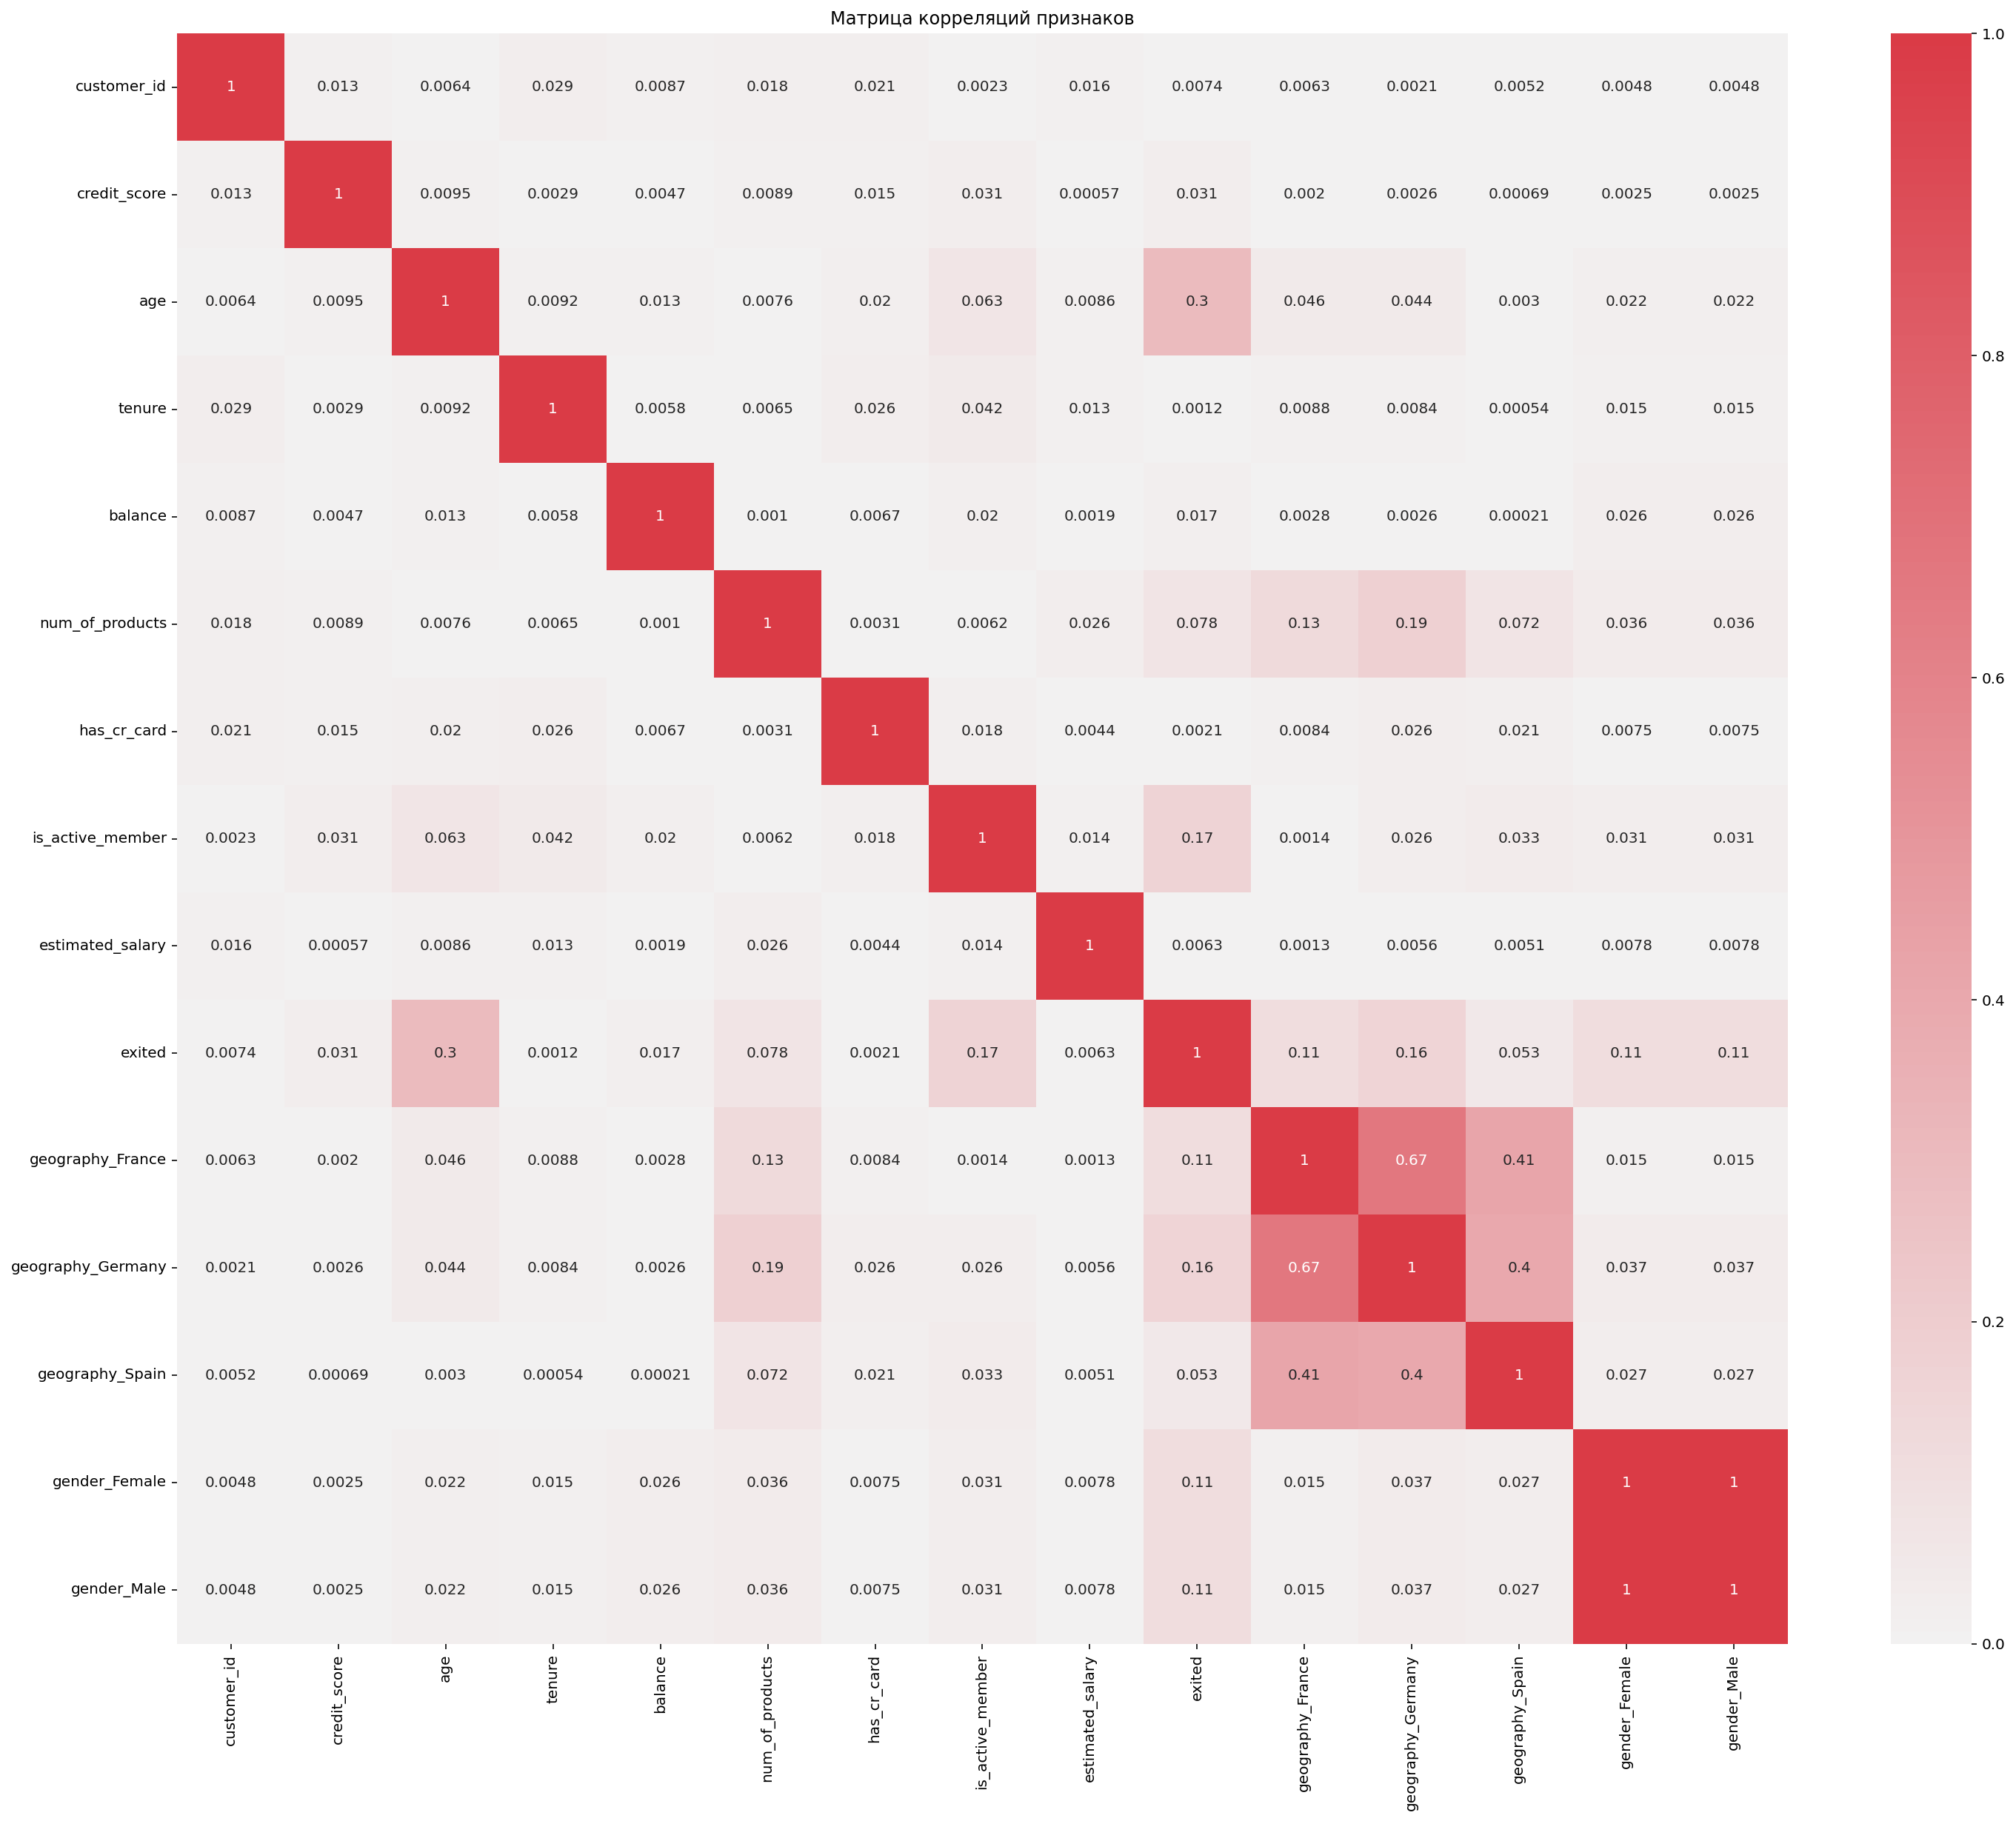

In [43]:
corr = abs(data.corr())
f, ax = plt.subplots(figsize=(25, 20))
font = {'size': 10}
plt.rc('font', **font)
plt.title('Матрица корреляций признаков')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(
    corr,          
    cmap=cmap,    
    annot=True,   
    vmax=1,      
    vmin=0,     
    center=0,     
    square=True,   
    linewidths=0, 
    xticklabels=True, yticklabels=True)

**Вывод по матрице корреляций:**

- все признаки незначительно коррелируют друг с другом

 По шкале Чеддока:
    
- is_active_member 0.17 (слабая связь)
- age 0.3 (слабая-умеренная связь)
- со странами слабые связи
- num_of_products 0.08 (слабая связь)
- gender 0.11 (слабая связь)

Таким образом, по шкале Чеддока, все признаки слабо коррелируют друг с другом и с целевым признаком оттока, максимум, можем взять во внимание признак возраста

## Портреты клиентов, наиболее склонных к оттоку/их сегментирование

### Кластеризация

Для сегментации клиентов воспользуемся кластеризацей и проанализируем результат. С помощью дендограммы определим рекомендуемое число кластеров.

In [44]:
df3 = df.copy()
df3 = df3.drop(['row_number', 'surname'], axis=1)

In [45]:
df3.loc[df['geography']=='France','geography'] = 1
df3.loc[df['geography']=='Spain','geography'] = 2
df3.loc[df['geography']=='Germany','geography'] = 3

df3['geography'] = df3['geography'].astype(int)

#перевод к числовому типу, обозначим женский пол - 0, мужской - 1

#замена значений "Male" на 1, "Female" на 0:
df3.loc[df['gender']=='Male', 'gender'] = 1
df3.loc[df['gender']=='Female','gender'] = 0

#приведем к типу данных int:
df3['gender'] = df3['gender'].astype(int)

In [46]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(df3)

In [47]:
from scipy.cluster.hierarchy import linkage

In [48]:
# построим матрицу расстояний 
linked = linkage(x_sc, method = 'ward')

In [49]:
from scipy.cluster.hierarchy import dendrogram

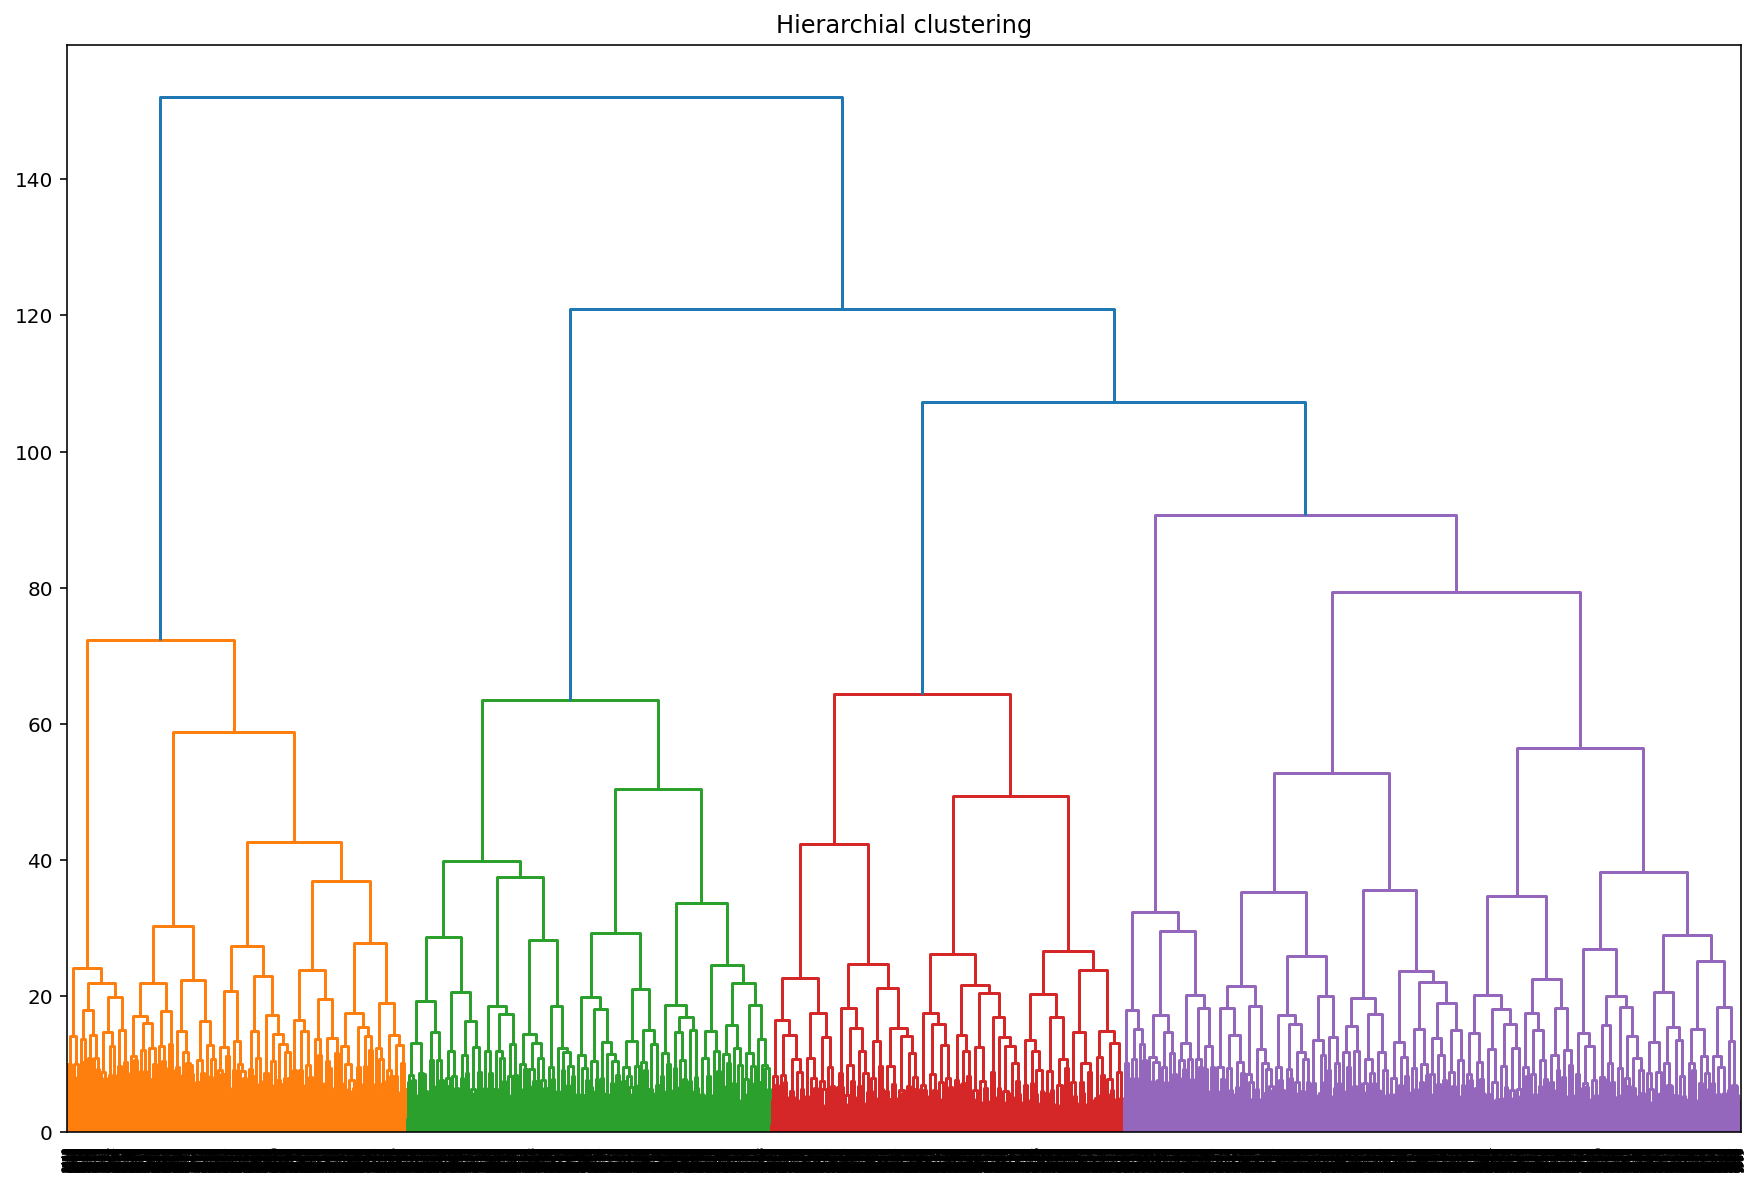

In [50]:
# дендограмма
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering')
plt.show()

рекомендуемое число кластеров - 4

In [51]:
from sklearn.cluster import KMeans

In [52]:
# задаём модель k-средних с числом кластеров 3 
km = KMeans(n_clusters=4, random_state=0)

labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
df3['cluster_km'] = labels

# выводим статистику по средним значениям 
# display(df_clast.groupby('cluster_km').mean().reset_index())

# выводим статистику по медианным значениям 
# display(df_clast.groupby('cluster_km').median().reset_index())

In [53]:
grouped_features = pd.pivot_table(df3, index='cluster_km',
                    aggfunc={'customer_id': 'nunique',
                             'geography': np.median,
                             'credit_score': np.median,
                             'num_of_products': np.median,
                             'gender': np.median,
                             'age': np.median,
                             'tenure': np.mean,
                             'has_cr_card': np.median,
                             'is_active_member': np.mean,
                             'estimated_salary': np.mean,
                             'exited': np.median})
grouped_features

age  credit_score  customer_id  estimated_salary  exited  gender  \
cluster_km                                                                     
0            36         655.5         2340     100314.913885       0       1   
1            45         646.0         1986     101443.500413       1       0   
2            36         651.0         2418      98267.001009       0       1   
3            36         654.0         3256     100457.340313       0       1   

            geography  has_cr_card  is_active_member  num_of_products  \
cluster_km                                                              
0                   1            0          0.555128                2   
1                   2            1          0.351964                1   
2                   1            1          0.550041                2   
3                   2            1          0.559889                1   

              tenure  
cluster_km            
0           4.905556  
1           4.929507  
2           5.145161  
3           5.042383

In [54]:
labels = 'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'
values = grouped_features['customer_id']

fig = go.Figure(data=[go.Pie(labels=labels, values=values,  textinfo='label', hole=.4)])
fig.show()

**Портреты клиентов по кластерам:**

- **Кластер 0** - преимущественно мужчины около 36 лет, пользуются двумя продуктами, имеют кредитную карту, не уходят в отток, не имеют кредитной карты 
- **Кластер 1** - преимущественно женщины около 45 лет, пользуются одним продуктом, имеют кредитную карту, уходят в отток, имеют кредитную карту
- **Кластер 2 и Кластер 3** - преимущественно мужчины около 36 лет, пользуются одним-двумя продуктами, имеют кредитную карту, не уходят в отток, **эти два клстера следует объединить в один**, так как отличаются только страны и кол-во используемых продуктов

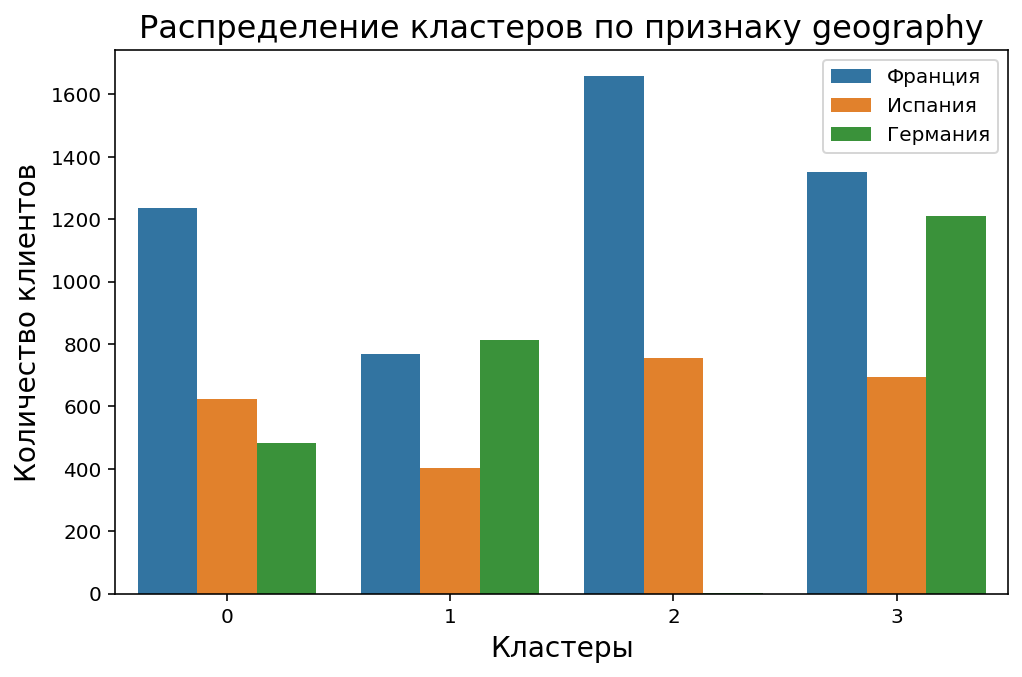

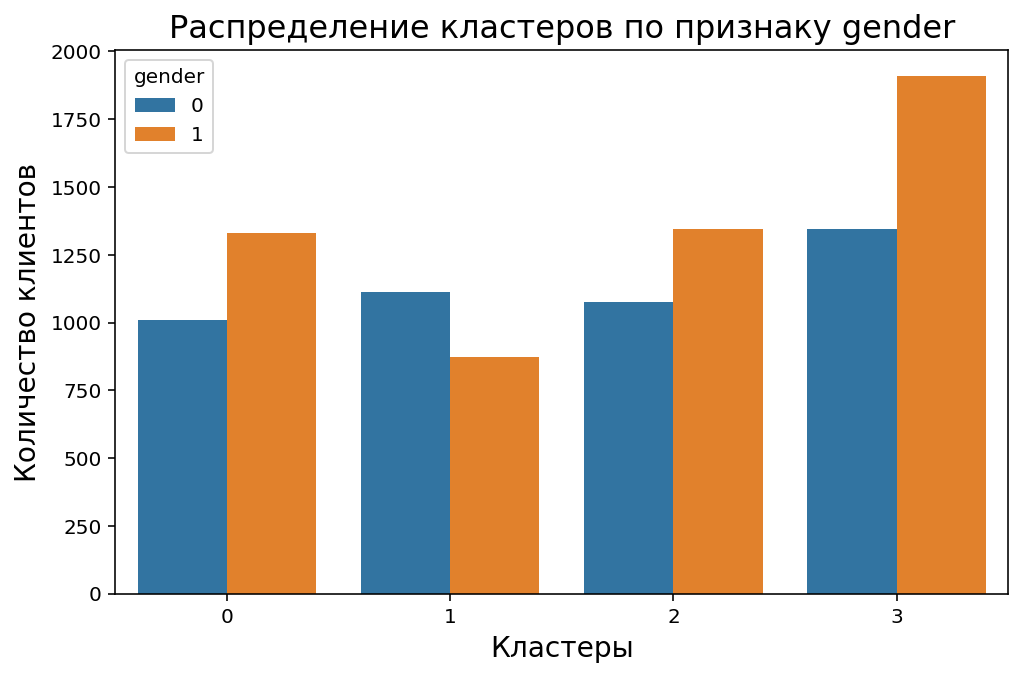

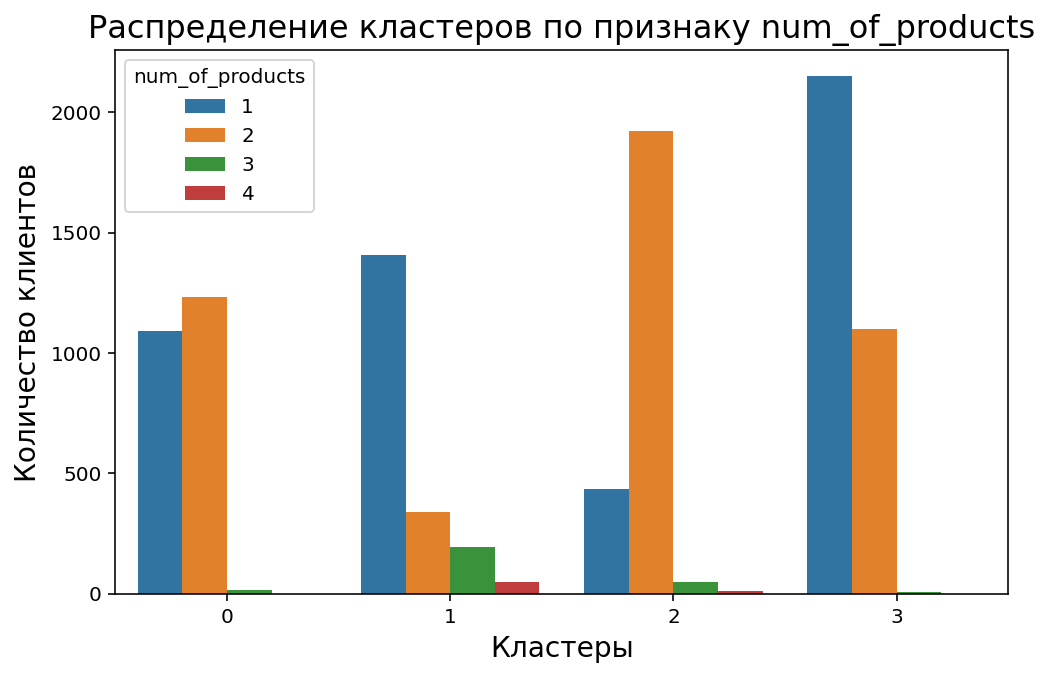

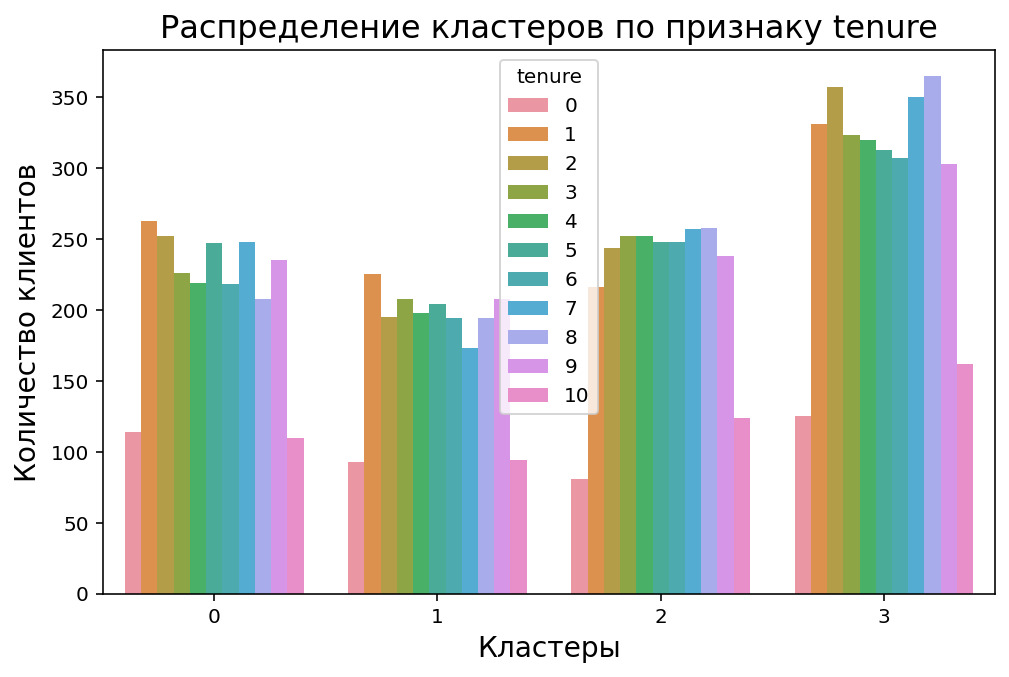

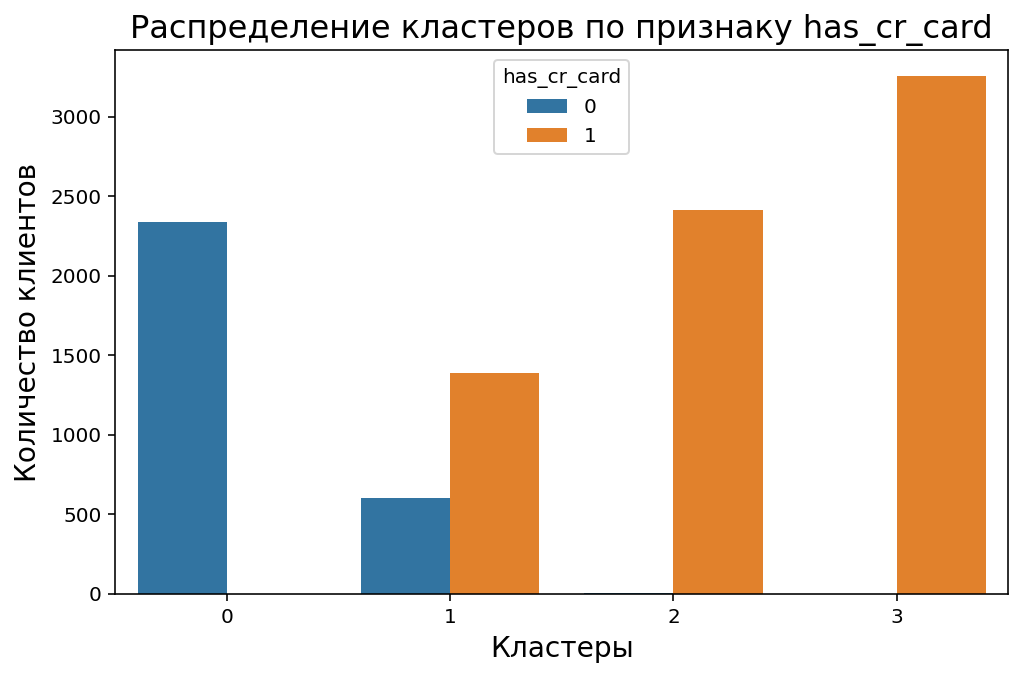

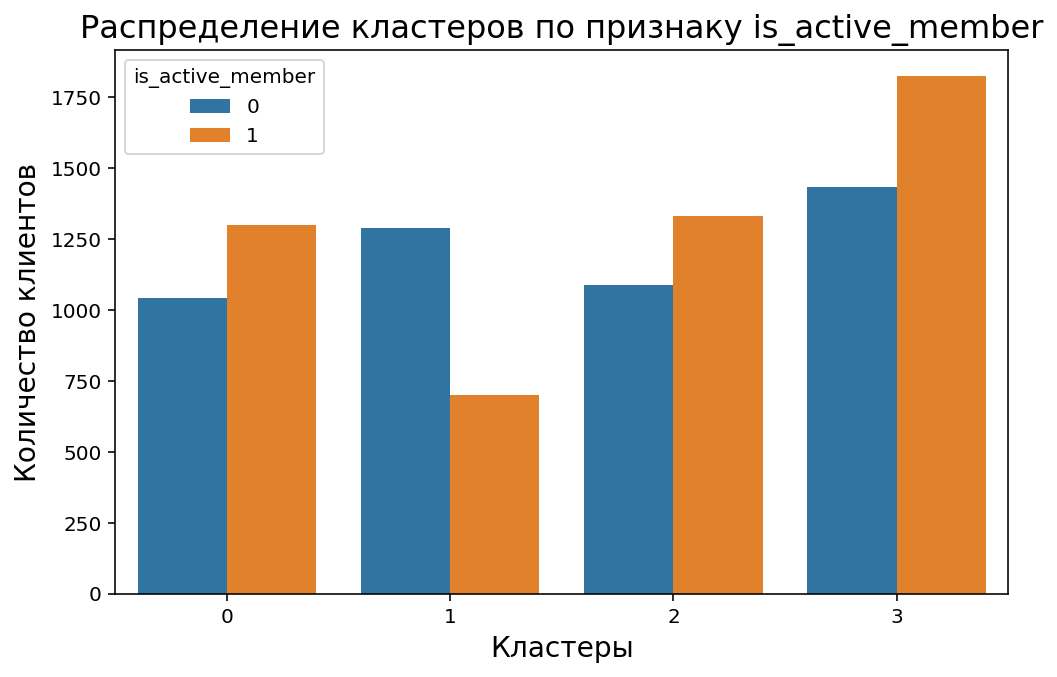

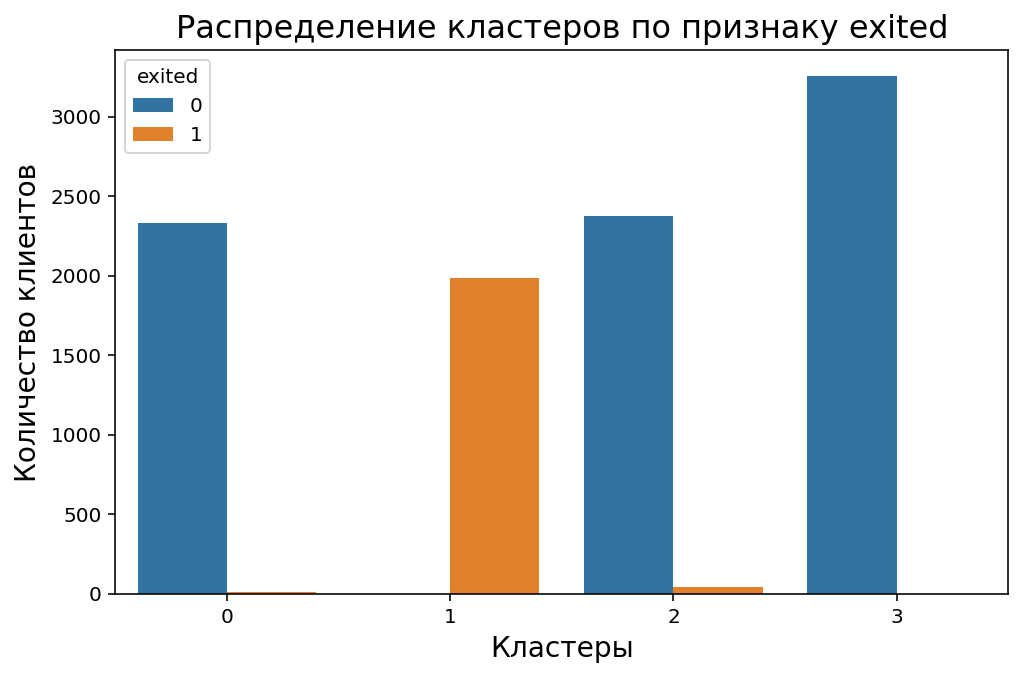

In [55]:
for column in ['geography', 'gender', 'num_of_products', 'tenure','has_cr_card', 'is_active_member', 'exited' ]:
    
    plt.figure(figsize=(8,5))
    ax = sns.countplot(data=df3, x = 'cluster_km' , hue=column)
    ax.set_title('Распределение кластеров по признаку '  +column, fontsize = 16, color = 'black')
    plt.ylabel('Количество клиентов', fontsize = 14, color = 'black')
    plt.xlabel("Кластеры", fontsize = 14, color = 'black')
    if column == 'geography':plt.legend(['Франция', 'Испания', 'Германия'])
plt.show()

Можно сказать, что Кластер №1 точно уходит в отток.

### Сегментирование

In [56]:
#Сегментируем пользователей на основе данных о количестве продуктов

pd.pivot_table(df3, index='num_of_products',
                    aggfunc={'age': np.median,
                             'balance': np.mean,
                             'exited': np.mean,
                             'geography': np.mean,
                             'has_cr_card': np.mean,
                             'estimated_salary': np.median,
                             'gender': np.mean,
                             'is_active_member': np.mean,
                             'tenure': np.mean,
                             'credit_score': np.median,
                             'customer_id': 'nunique'})

age       balance  credit_score  customer_id  \
num_of_products                                                 
1                 38  98551.870614           651         5084   
2                 36  51879.145813           653         4590   
3                 42  75458.328195           650          266   
4                 45  93733.135000           643           60   

                 estimated_salary    exited    gender  geography  has_cr_card  \
num_of_products                                                                 
1                       99226.830  0.277144  0.548387   1.770850     0.703777   
2                      100738.855  0.075817  0.551198   1.710893     0.707190   
3                      101046.885  0.827068  0.439850   1.969925     0.714286   
4                      112163.105  1.000000  0.366667   1.916667     0.683333   

                 is_active_member    tenure  
num_of_products                              
1                        0.504131  4.974626  
2                        0.532898  5.051852  
3                        0.424812  5.003759  
4                        0.483333  5.300000

In [57]:
# Добавим в датафрейм столбец с сегментами, при этом объединим два продукта - 3 и 4, так как они малочисленные, можно заметить,
# что это преимущественно женщины 42-45 лет

df3['segments'] = df3['num_of_products'].replace(4, 3)
df3['segments'].value_counts().reset_index()

index  segments
0      1      5084
1      2      4590
2      3       326

In [58]:
segments = df3.pivot_table(index='segments').reset_index()
segments

segments        age       balance  cluster_km  credit_score   customer_id  \
0         1  39.673092  98551.870614    1.717349    649.120968  1.568963e+07   
1         2  37.753595  51879.145813    1.628105    652.188671  1.569211e+07   
2         3  43.653374  78821.789571    1.184049    649.113497  1.569495e+07   

   estimated_salary    exited    gender  geography  has_cr_card  \
0      99487.256851  0.277144  0.548387   1.770850     0.703777   
1     100452.012821  0.075817  0.551198   1.710893     0.707190   
2     104400.141503  0.858896  0.426380   1.960123     0.708589   

   is_active_member  num_of_products    tenure  
0          0.504131         1.000000  4.974626  
1          0.532898         2.000000  5.051852  
2          0.435583         3.184049  5.058282

In [59]:
# отток по сегментам

exited_clients = pd.pivot_table(df3, index='segments', 
                    aggfunc={'exited': 'mean',
                             'customer_id': 'nunique'}).reset_index()

exited_clients['exited'] = (exited_clients['exited'] * 100).round()
exited_clients

segments  customer_id  exited
0         1         5084    28.0
1         2         4590     8.0
2         3          326    86.0

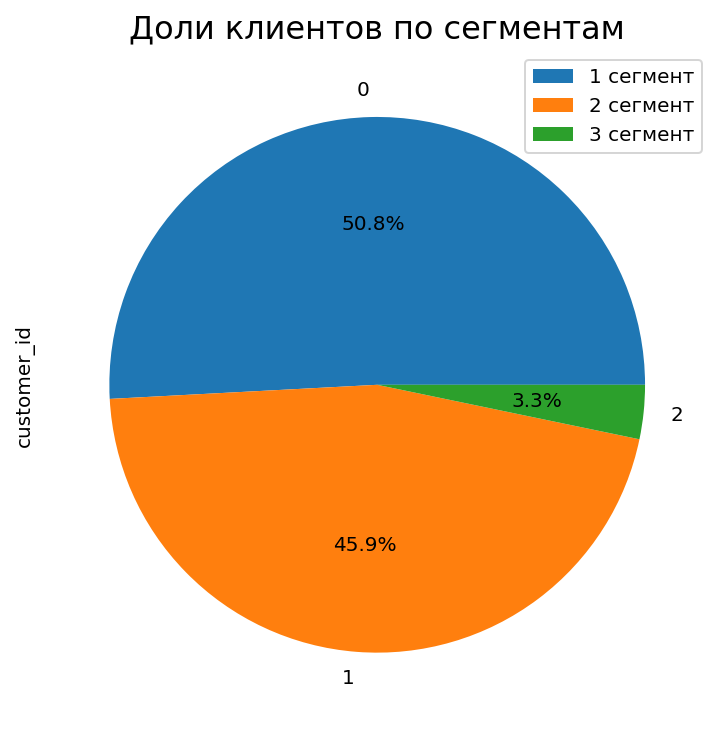

In [60]:
exited_clients.plot(kind = 'pie', y ='customer_id', autopct='%1.1f%%', figsize= (6,8));
plt.title('Доли клиентов по сегментам', fontsize = 16)
plt.legend(['1 сегмент','2 сегмент','3 сегмент'])
plt.show()

In [61]:
exited_clients_2 = df3.groupby(['segments', 'exited']).size().rename('count').reset_index()
exited_clients_2

segments  exited  count
0         1       0   3675
1         1       1   1409
2         2       0   4242
3         2       1    348
4         3       0     46
5         3       1    280

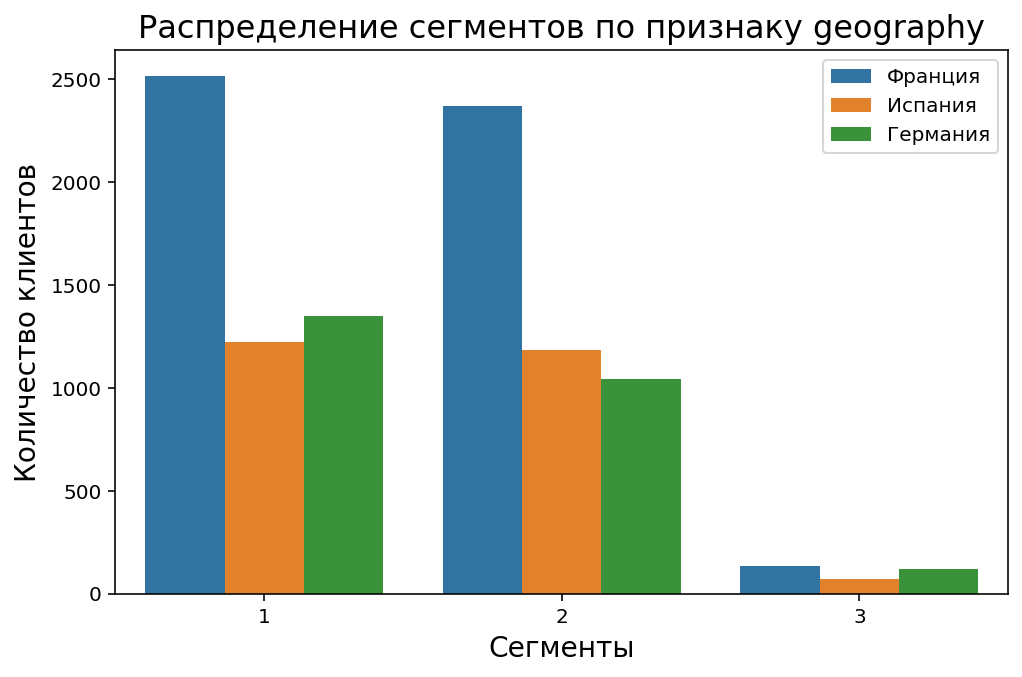

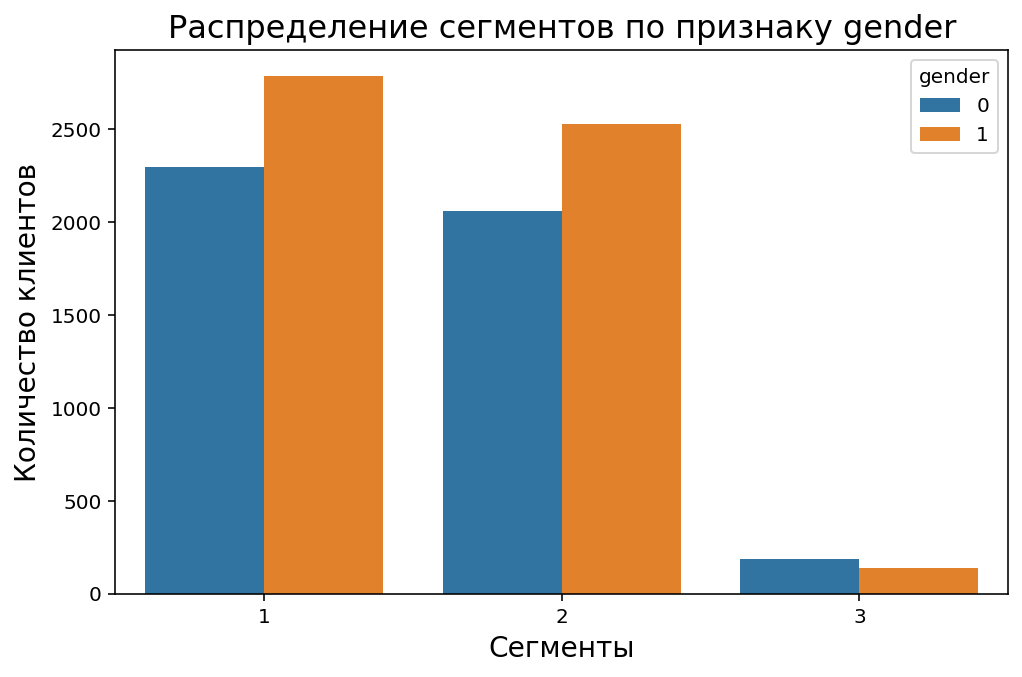

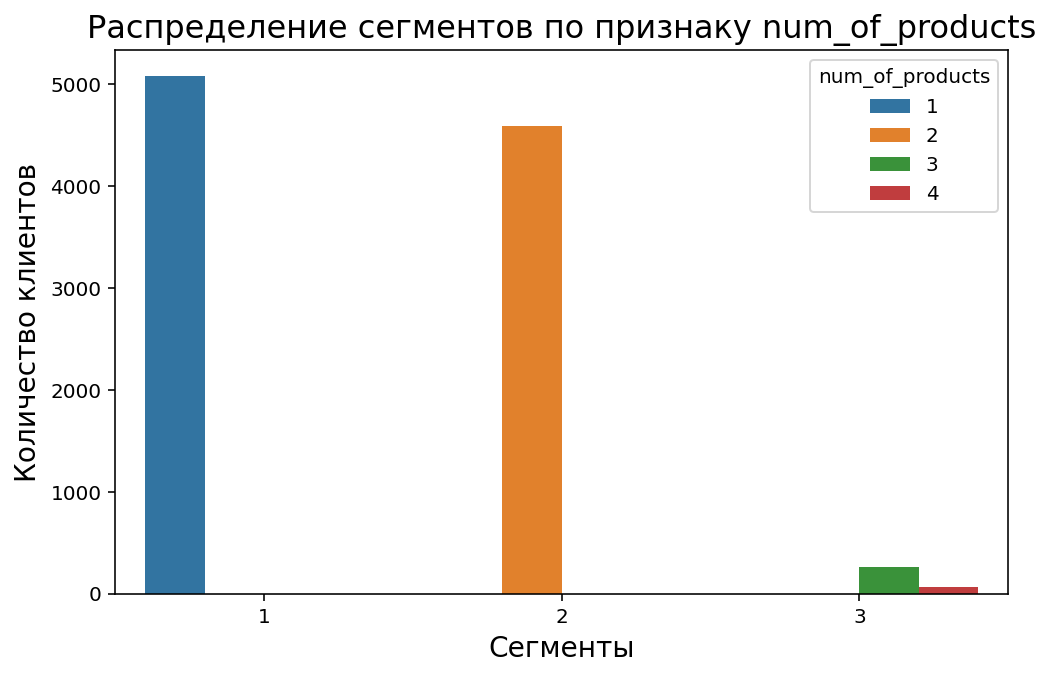

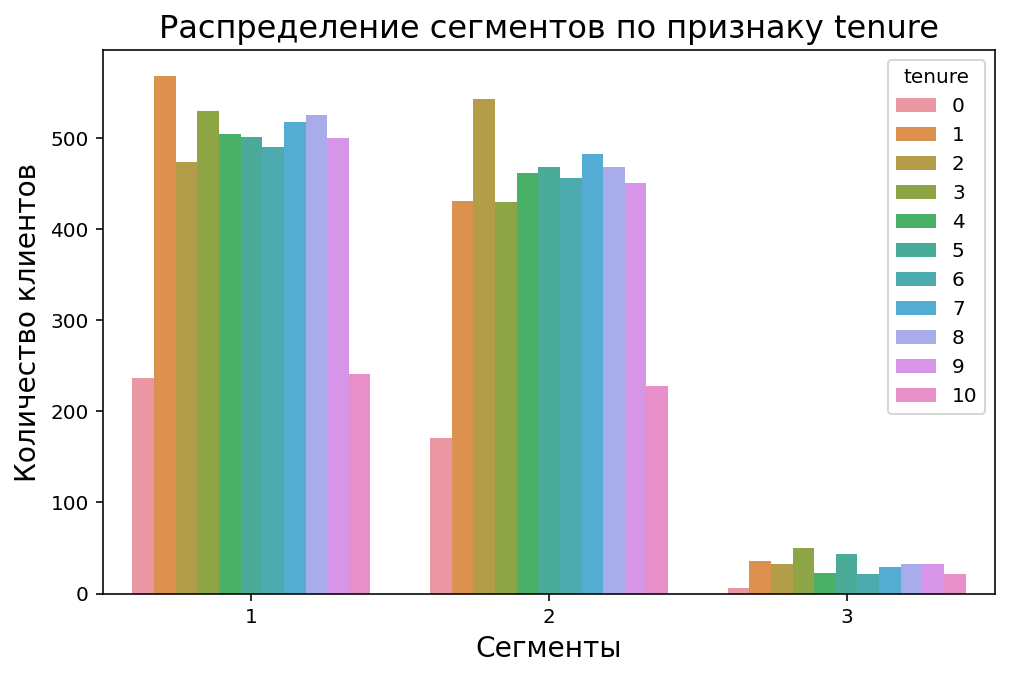

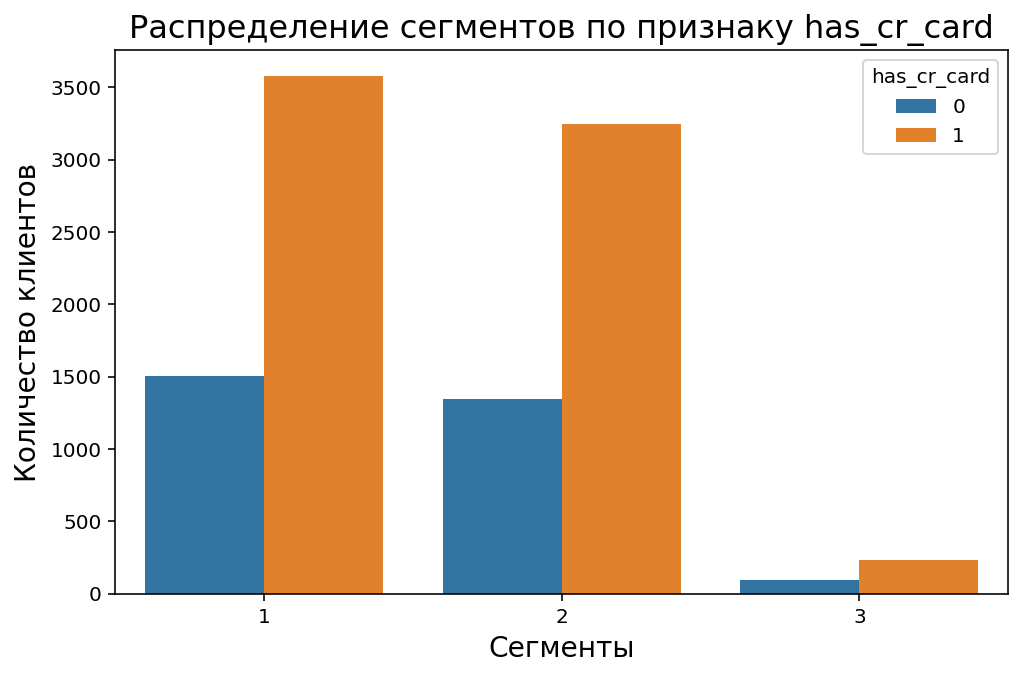

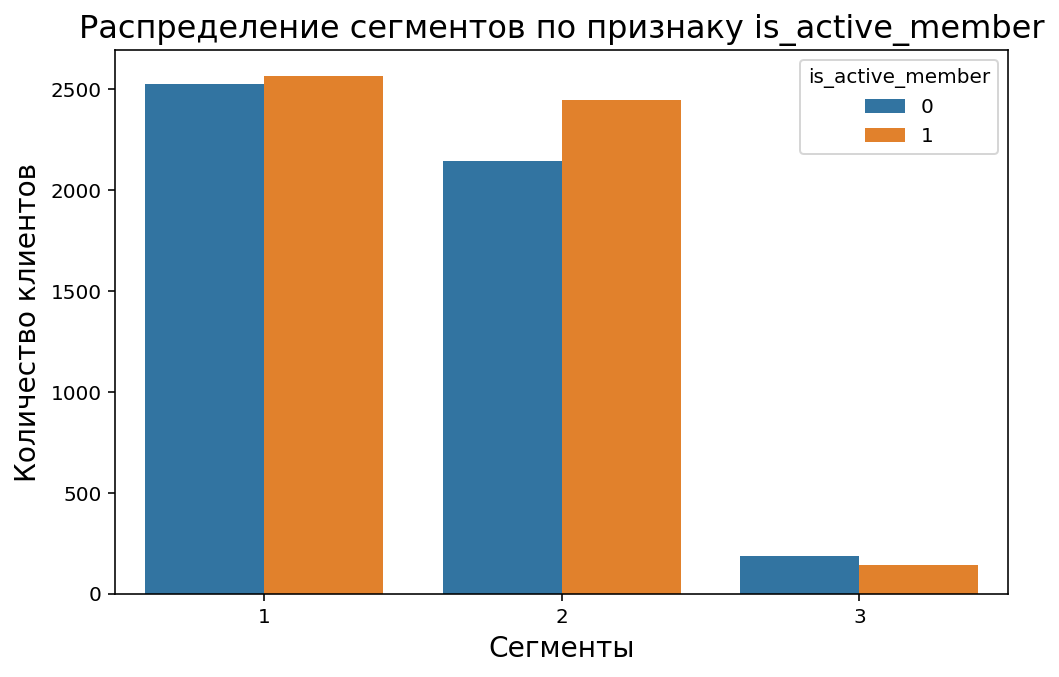

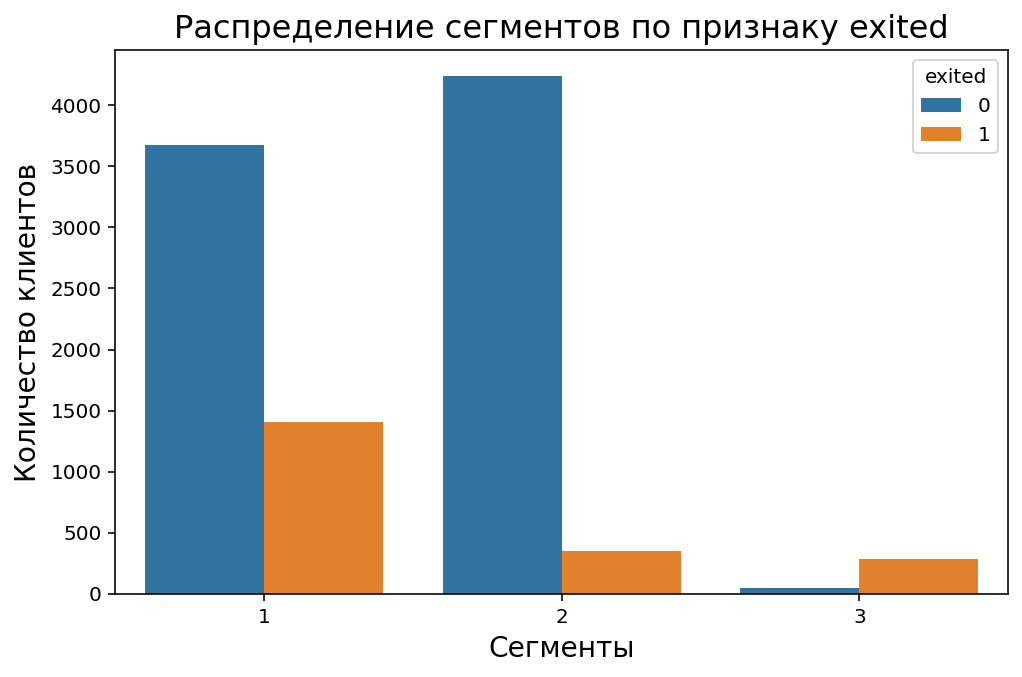

In [62]:
for column in ['geography', 'gender', 'num_of_products', 'tenure','has_cr_card', 'is_active_member', 'exited' ]:
    
    plt.figure(figsize=(8,5))
    ax = sns.countplot(data=df3, x = 'segments' , hue=column)
    ax.set_title('Распределение сегментов по признаку '  +column, fontsize = 16, color = 'black')
    plt.ylabel('Количество клиентов', fontsize = 14, color = 'black')
    plt.xlabel("Сегменты", fontsize = 14, color = 'black')
    if column == 'geography':plt.legend(['Франция', 'Испания', 'Германия'])
plt.show()

**По графикам:**

- в третьем сегменте женщин больше мужчин
- в третьем сегменте сконцентрированы люди, которые пользуются 3-4 продуктами (мы сами их добавили)
- в первом сегменте больше людей, которые имеют в собственности 1 объект недвижимости, во втором сегменте преимущественно 2 объекта недвижимости, в третьем примерно 3 объекта
- во всех трех сегментах, клиентов, пользующимися кредитными картами больше, чем тех, кто не пользуется
- в первом сегменте уровеь лояльности у клиентов почти одинаковый, во втором сегменте лояльных клиентов больше, в третьем - нелояльных больше
- отток больше всего в 3 сегменте

### Вывод по кластеризации и сегментированию:

- На дендограмме показало рекомендованное число кластеров - 4, скорее всего разбиение на кластеры происходило по гендеру, стране и лояльности, так как остальные признаки схожи, мы смогли примерно обозначить портреты клиентов.
- Далее в сегментировании мы бъединили 3 и 4 продукта, так как они самые малочисленные, преимущественно женщины 42-45 лет. Как и по исследованию ранее было выяснено, что 3-4 продуктами мало пользуются, сейчас это снова подтверждается, так как в третьей группе практически все клиенты уходят, возможно, большое количество продуктов негативно сказывается на лояльности и увеличивает отток клиентов, так как другие признаки у всех сегментов довольно похожие. Группа с 2 продуктами показала наименьший отток.

**Портреты клиентов по сегментам:**
- **Сегмент 1** - преимущественно мужчины около 39 лет, пользуются одним продуктом, можно, сказать, что достаточно лояльные клиенты, 1/3 клиентов уходит в отток
- **Сегмент 2** - преимущественно мужчины около 37 лет, пользуются двумя продуктами, наиболее лояльные клиенты и не уходят в отток
- **Сегмент 3** - преимущественно женщины около 43 лет, пользуются тремя-четырьмя продуктами, почти польностью уходят, лояльность низкая

### Портреты клиентов:

**Потрет клиента, который склонен к оттоку:**

- проживает в Германии
- женщина
- старше 40
- использует 1 продукт (не всегда) или же 3-4 продукта
- нелояльна

**Потрет клиента, который склонен продолжить пользоваться услугами банка:**

- проживает в Франции или Испании
- мужчина
- моложе 40
- использует ровно 2 продукта
- лоялен

**Рекомендации относительно исследовательского анализа и сегментирования:**
- следует больше привлекать клиентов-мужчин моложе 40 лет
- обратить внимание на клиентов-женщин, понять, почему они склонны уходить, улучшить для них услуги банка
- увеличить лояльность для всех клиентов любого возраста, то есть привлечь к более активному использованию сайта/приложения банка
- увеличить лояльность для клиентов, которые пользуются 2 продуктами (они приоритетнее, но с 1 продуктом также стоит работать), например, устраивать спецпредложения на выгодных условиях по картам, вкладам, возможно, стоит предлагать кэшбек на траты с карт банка
- клиенты с 3 продуктами склонны уходить, стоит разобраться с этим и улучшить качество третьего продукта
- стоит разобраться в причине, почему из филиала Германии клиенты уходят и не пользуются продуктами.

## Проверка статистических гипотез

### Гипотеза №1: 

**Проверка гипотезы о различии дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним**

Сформулируем гипотезы:

- Н0: статистически значимых различий в доходе клиентов, которые пользуются одним продуктом и теми, кто пользуется двумя продуктами, нет
- Н1: статистически значимые различия в доходе клиентов, которые пользуются одним продуктом и теми, кто пользуется двумя продуктам, есть

In [63]:
# сформируем выборки дохода клиентов, пользующихся 1 и 2 продуктами
salary_products_1 = df.query('num_of_products == 1')['estimated_salary']
salary_products_2 = df.query('num_of_products == 2')['estimated_salary']

In [64]:
salary_products_1.describe()

count      5084.000000
mean      99487.256851
std       57363.626412
min          11.580000
25%       50414.515000
50%       99226.830000
75%      148212.695000
max      199970.740000
Name: estimated_salary, dtype: float64

In [65]:
salary_products_2.describe()

count      4590.000000
mean     100452.012821
std       57790.799984
min          90.070000
25%       50797.287500
50%      100738.855000
75%      150151.460000
max      199992.480000
Name: estimated_salary, dtype: float64

Видно, что показатели среднего и стандартного откленения по выборкам приблизительно равны, проверим также дисперсию:

In [66]:
print('Дисперсия клиентов с одним продуктом:', np.var(salary_products_1, ddof=1))
print('Стандартное отклонение:', np.sqrt(np.var(salary_products_1, ddof=1)))
print('-----------------------------------------------------------------')
print('Дисперсия клиентов с двумя продуктами:', np.var(salary_products_2, ddof=1))
print('Стандартное отклонение:', np.sqrt(np.var(salary_products_2, ddof=1)))

Дисперсия клиентов с одним продуктом: 3290585635.08814
Стандартное отклонение: 57363.62641158716
-----------------------------------------------------------------
Дисперсия клиентов с двумя продуктами: 3339776562.8109965
Стандартное отклонение: 57790.799984175654


Также видно, что показатели дисперсии для выборок близки между собой, сравним размеры выборок:

In [67]:
print("Клиенты с одним продуктом:", salary_products_1.shape[0], '\n', "Клиенты с двумя продуктами:", salary_products_2.shape[0])
print(f'Разница в размерах выборок: {salary_products_1.shape[0]/salary_products_2.shape[0]-1:.0%}')
print(f'Различие средних значений выборок: {salary_products_1.mean() / salary_products_2.mean()-1:.0%}')

Клиенты с одним продуктом: 5084 
 Клиенты с двумя продуктами: 4590
Разница в размерах выборок: 11%
Различие средних значений выборок: -1%


Проверять гипотезу будем c помощью t-критерия Стьюдента, так как наши выборки имеют равномерное распределение и обладают достаточной величиной данных, используем метод ttest_ind для сравнения средних двух независимых выборок с различной дисперсией:

In [68]:
# уровень статистической значимости alpha примем 0.05
alpha = .05

results = st.ttest_ind(salary_products_1, salary_products_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.4106493940071987
Не получилось отвергнуть нулевую гипотезу


In [69]:
# дополнительно проверим гипотезы с помощью критерия Манна-Уитни

alpha = .05

results = st.mannwhitneyu(salary_products_1, salary_products_2, alternative='two-sided')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.4079566651927651
Не получилось отвергнуть нулевую гипотезу


####  Вывод по первой гипотезе:

У нас не поличилось отвергнуть нулевую гипотезу, значит **статистически значимых различий в доходе клиентов, которые пользуются одним продуктом и теми, кто пользуется двумя продуктами, нет**

### Гипотеза №2:

**Проверить, есть ли статистически значимое различие дохода между клиентами, которые ушли, и клиентами, которые продолжают пользоваться услугами банка.**

Сформулируем гопотезы:

- Н0: статистически значимых различий дохода между клиентами, которые ушли, и клиентами, которые продолжают пользоваться услугами банка нет.
- Н1: статистически значимые различия дохода между клиентами, которые ушли, и клиентами, которые продолжают пользоваться услугами банка есть.

In [70]:
salary_exited_0 = df.query('exited == 0')['estimated_salary']
salary_exited_1= df.query('exited == 1')['estimated_salary']

In [71]:
salary_exited_0.describe()

count      7963.000000
mean      99738.391772
std       57405.586966
min          90.070000
25%       50783.490000
50%       99645.040000
75%      148609.955000
max      199992.480000
Name: estimated_salary, dtype: float64

In [72]:
salary_exited_1.describe()

count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
25%       51907.720000
50%      102460.840000
75%      152422.910000
max      199808.100000
Name: estimated_salary, dtype: float64

In [73]:
print('Дисперсия клиентов, которые не ушли:', np.var(salary_exited_0, ddof=1))
print('Стандартное отклонение:', np.sqrt(np.var(salary_exited_0, ddof=1)))
print('-----------------------------------------------------------------')
print('Дисперсия клиентов, которые ушли:', np.var(salary_exited_1, ddof=1))
print('Стандартное отклонение:', np.sqrt(np.var(salary_exited_1, ddof=1)))

Дисперсия клиентов, которые не ушли: 3295401414.9183917
Стандартное отклонение: 57405.586966064475
-----------------------------------------------------------------
Дисперсия клиентов, которые ушли: 3353848166.807016
Стандартное отклонение: 57912.41807079908


In [74]:
print("Клиенты, которые не ушли:", salary_exited_0.shape[0], '\n', "Клиенты, которые ушли:", salary_exited_1.shape[0])
print(f'Разница в размерах выборок: {salary_exited_0.shape[0]/salary_exited_1.shape[0]-1:.0%}')
print(f'Различие средних значений выборок: {salary_exited_0.mean() / salary_exited_1.mean()-1:.0%}')

Клиенты, которые не ушли: 7963 
 Клиенты, которые ушли: 2037
Разница в размерах выборок: 291%
Различие средних значений выборок: -2%


Стандартное отклонение приблизительно равно у двух выборок, также с дисперсией - у двух выборок они похожи, однако разница в размере выборок очень большая, это может искажать результаты. Проверим также с помощью t-критерия Стьюдента:

In [75]:
alpha = .05

results = st.ttest_ind(salary_exited_0, salary_exited_1, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.228924613051458
Не получилось отвергнуть нулевую гипотезу


In [76]:
alpha = .05

results = st.mannwhitneyu(salary_exited_0, salary_exited_1, alternative='two-sided')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.22705150930153783
Не получилось отвергнуть нулевую гипотезу


####  Вывод по второй гипотезе:

У нас не поличилось отвергнуть нулевую гипотезу, значит **статистически значимых различий дохода между клиентами, которые ушли, и клиентами, которые продолжают пользоваться услугами банка нет.**

### Гипотеза №3:

**Проверить, есть ли статистически значимое различие по половому признаку среди клиентов, которые ушли, и теми, которые продолжают пользоваться услугами банка.**

Сформулируем гипотезу:

- H0: статичтически значимых различий между количеством клиентов (женщин), ушедших из банка, и количеством клиентов (мужчин), оставшихся в банке, нет.

- H1: статичтически значимых различий между количеством клиентов (женщин), ушедших из банка, и количеством клиентов (мужчин), оставшихся в банке, есть.

In [77]:
sample_A = list(df.groupby('gender').agg({'customer_id':'count'})['customer_id'])
sample_B = list(df.query('exited == 1').groupby('gender').agg({'customer_id':'count'})['customer_id'])

Будем использовать Z-тест, так как это метод определения того, являются ли два средних значения выборки примерно одинаковыми или разными:

In [78]:
# Пишем функцию для проверки равенства долей

def z_test(before, after):
    successes = np.array(after)
    trials = np.array(before)
     
    p1 = successes[0]/trials[0]
    p2 = successes[1]/trials[1]
    
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    difference = p1 - p2

    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    return p_value

In [79]:
# Количество тестов

n_test = 2

# Рассчитываем итоговый уровень критерия статистической значимости с учётом поправки Бонферрони

alpha_corr = alpha / n_test

In [80]:
# Значение p-value

p_value = z_test(
    sample_A,
    sample_B
)

print('p-значение:', results.pvalue)

if p_value > alpha_corr:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

p-значение: 0.22705150930153783
Отвергаем нулевую гипотезу


In [81]:
print('{0:.2%}'.format(sample_B[0] / sample_A[0] *  sample_A[1] / sample_B[1] - 1))

52.36%


Относительная разница средних **существенна**

####  Вывод по третьей гипотезе:

Отвергаем нулевую гипотезу, значит **статистически значимых различий между количеством клиентов (женщины), ушедших из банка, и количеством клиентов (мужчин), оставшихся в банке, есть**

## Выбор и обучение модели для предсказания оттока (без устранения дисбаланса и без подбора гиперпараметров)

Обучим модели для прогнозирования оттока клиентов четырьмя способами. Выберем оптимальный по метрикам Accuracy, Precision, Recall, F1, ROC_AUC

accuracy — доля правильных ответов алгоритма
Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.
F-мера — среднее гармоническое precision и recall. F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.

Одним из способов оценить модель в целом, не привязываясь к конкретному порогу, является AUC-ROC (или ROC AUC) — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve ). Данная кривая представляет из себя линию от (0,0) до (1,1) в координатах True Positive Rate (TPR) и False Positive Rate (FPR). 

In [82]:
df2 = df.drop(['row_number', 'surname'], axis=1)
df2['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [83]:
# Заменим значения в столбце geography на числовые

df2['geography_int'] = df2['geography'].map({'Франция':0, 'Испания':1, 'Германия':2})
df2['gender_int'] = df2['gender'].map({'Male':1, 'Female':0})
# Преобразуем датафрейм методом get_dummies(), чтобы разделить столбец 'geography' на отдельные столбцы для каждой страны

df2 = pd.get_dummies(df2)

In [84]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = df2.drop(['geography_int', 'gender_int', 'exited'], axis = 1)
y = df2['exited']

# разделим модель на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# стандартизируем данные 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# определим функцию, которая будет выводить метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tAUC-ROC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state = 0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# выведем все метрики
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')


# Модель на основе алгоритма решающего дерева
tree_model = DecisionTreeClassifier(random_state = 0)

tree_model.fit(X_train_st, y_train)
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test_st)[:,1]

print_all_metrics(y_test, tree_predictions, tree_probabilities, title='Метрики для модели дерева решений:')


# Модель на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 

rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1] 

print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')


# Модель на основе алгоритма градиентного бустинга
# gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)

# gb_model.fit(X_train, y_train)
# gb_predictions = gb_model.predict(X_test_st) 
# gb_probabilities = gb_model.predict_proba(X_test_st)[:,1] 

# print_all_metrics(y_test, gb_predictions, gb_probabilities, title = 'Метрики для модели градиентного бустинга:')

Метрики для модели логистической регрессии:
	Accuracy: 0.81
	Precision: 0.57
	Recall: 0.23
	F1: 0.33
	AUC-ROC: 0.77
Метрики для модели дерева решений:
	Accuracy: 0.79
	Precision: 0.49
	Recall: 0.55
	F1: 0.52
	AUC-ROC: 0.70
Метрики для модели случайного леса:
	Accuracy: 0.87
	Precision: 0.76
	Recall: 0.50
	F1: 0.61
	AUC-ROC: 0.86


In [85]:
importances = pd.DataFrame({'feature': X.columns, 'importance':rf_model.feature_importances_})
importances.sort_values(by='importance', ascending=False)

feature  importance
2                 age    0.217061
8    estimated_salary    0.122082
5     num_of_products    0.122078
4             balance    0.120575
0         customer_id    0.119542
1        credit_score    0.117864
3              tenure    0.069992
7    is_active_member    0.035191
10  geography_Germany    0.021549
6         has_cr_card    0.016274
9    geography_France    0.010840
11    geography_Spain    0.009724
13        gender_Male    0.008633
12      gender_Female    0.008595

Самый важный признак для модели - age. Модель можно использовать, например, для сравнения прогнозного значения продкутов и фактического. Тем, у кого прогнозное больше, можно предложить новый продукт. С помощью модели также можно предотвратить отток тех, кому она предсказывает уход, но клиент еще не ушел.

# Машинное обучение

In [86]:
# Удалим столбцы, которые не влияют на исследование
df = df.drop(['surname', 'row_number', 'customer_id'], axis=1)

# Заменим значения в столбце geography и gender на числовые

# df['geography_int'] = df['geography'].map({'France':0, 'Spain':1, 'Germany':2})
# df['gender_int'] = df['gender'].map({'Male':1, 'Female':0})

# # Преобразуем датафрейм методом get_dummies(), чтобы разделить столбец 'geography' на отдельные столбцы для каждой страны

# df = pd.get_dummies(df)
# df

In [87]:
# df = df.drop(['geography_int', 'gender_int'], axis=1)

In [88]:
# Избавляюсь от категориальных признаков
df = pd.get_dummies(df, drop_first=True)
df.head()

credit_score  age  tenure    balance  num_of_products  has_cr_card  \
0           619   42       2       0.00                1            1   
1           608   41       1   83807.86                1            0   
2           502   42       8  159660.80                3            1   
3           699   39       1       0.00                2            0   
4           850   43       2  125510.82                1            1   

   is_active_member  estimated_salary  exited  geography_Germany  \
0                 1         101348.88       1                  0   
1                 1         112542.58       0                  0   
2                 0         113931.57       1                  0   
3                 0          93826.63       0                  0   
4                 1          79084.10       0                  0   

   geography_Spain  gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0

В нашем случае нет отдельно выделенной тестовой выборки, поэтому существющие данные мы делим на три выборки:
обучающая 60% для обучения модели
валидационная 20% для выбора лучшего алгоритма и оптимальных параметров
тестовая 20% для финального теста лучшей модели.

Разделение выборки производили в 2 этапа:
Выделили валидационную 60%
Разделили оставшиеся 40% на 2 равные части (валидационная и тестовая)

In [89]:
# Разбиваем на параметры и целевой признак
features=df.drop(['exited'],axis=1)
target=df['exited']
# Разбиваем на тренировочную, тестовую и валидационную выборки
target = df['exited']
features = df.drop('exited', axis=1)

train_features, valid_features, train_target, valid_target = train_test_split(features, target, test_size=0.4, 
                                                                              random_state=12345)
valid_features, test_features, valid_target, test_target = train_test_split(valid_features, valid_target, test_size=0.5, 
                                                                              random_state=12345 )
print(train_features.shape, valid_features.shape, test_features.shape)
print(train_target.shape, valid_target.shape, test_target.shape)

(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


In [90]:
# Масштабируем численные признаки выборок для выравнивания весов
numeric=['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler=StandardScaler()
scaler.fit(train_features[numeric])
train_features[numeric]=scaler.transform(train_features[numeric])
valid_features[numeric]=scaler.transform(valid_features[numeric])
test_features[numeric]=scaler.transform(test_features[numeric])
train_features.head()

credit_score       age    tenure   balance  num_of_products  \
7479     -0.886751 -0.373192  1.027273  1.232271        -0.891560   
3411      0.608663 -0.183385  1.027273  0.600563        -0.891560   
6027      2.052152  0.480939 -0.707790  1.027098         0.830152   
1247     -1.457915 -1.417129  0.333248 -1.233163         0.830152   
3716      0.130961 -1.132419 -1.054802  1.140475        -0.891560   

      has_cr_card  is_active_member  estimated_salary  geography_Germany  \
7479            1                 0         -0.187705                  0   
3411            0                 0         -0.333945                  0   
6027            0                 1          1.503095                  1   
1247            1                 0         -1.071061                  0   
3716            0                 0          1.524268                  1   

      geography_Spain  gender_Male  
7479                1            1  
3411                0            0  
6027                0            1  
1247                0            1  
3716                0            0

## Исследование задачи

0    7963
1    2037
Name: exited, dtype: int64

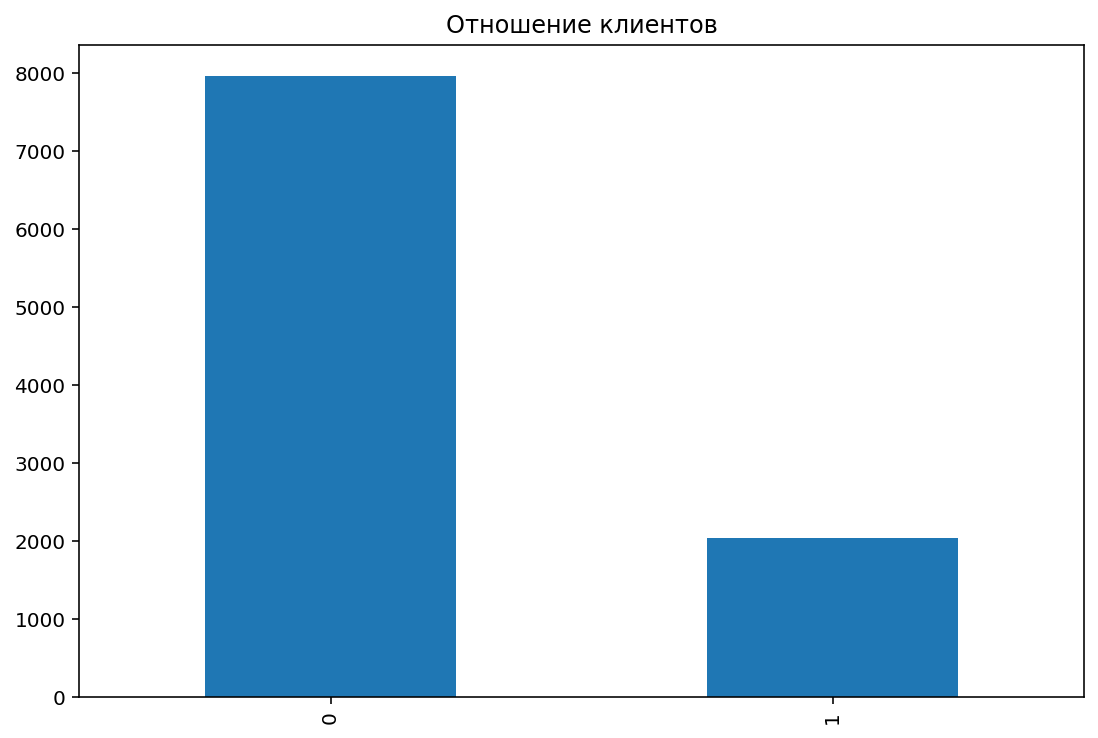

In [91]:
df['exited'].value_counts().plot(kind='bar',figsize=(9,6),title='Oтношение клиентов')
df['exited'].value_counts()

Есть дисбаланс классов в пользу оставшихся клиентов. Это может привести модель к склонению в распространённый вариант ответа.

Обучение моделей:

    Решающее дерево
    Случайный лес
    Логистическая регрессия

1) Обучение модели дерева решений с перебором глубины, найдем гиперпараметры с наибольшей метрикой f1.

2) Обучение модели случайного леса с перебором гиперпараметров, которые дают наибольшую метрику f1.

3) Обучение и оценка метрик с помощью модели Логистической регрессии


Метрики: 

accuracy — доля правильных ответов алгоритма Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм. F-мера — среднее гармоническое precision и recall. F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.

Одним из способов оценить модель в целом, не привязываясь к конкретному порогу, является AUC-ROC (или ROC AUC) — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve ). Данная кривая представляет из себя линию от (0,0) до (1,1) в координатах True Positive Rate (TPR) и False Positive Rate (FPR).

In [92]:
# Обучение модели дерева решений
f1_best = 0
depth_best = 0
for depth in range(7, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(train_features, train_target)
    prediction = model.predict(valid_features)
    f1 = f1_score(valid_target, prediction)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

Max depth 9 F1-score 0.5722543352601155


In [93]:
#Проведем оценку accuracy, precision, recall, F1, AUC-ROC на полученных гиперпараметрах
model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Метрики для модели дерева решений:')
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Метрики для модели дерева решений:
Accuracy 0.852
Precision 0.7226277372262774
Recall 0.47368421052631576
F1 0.5722543352601155
AUC-ROC 0.7832470859368857


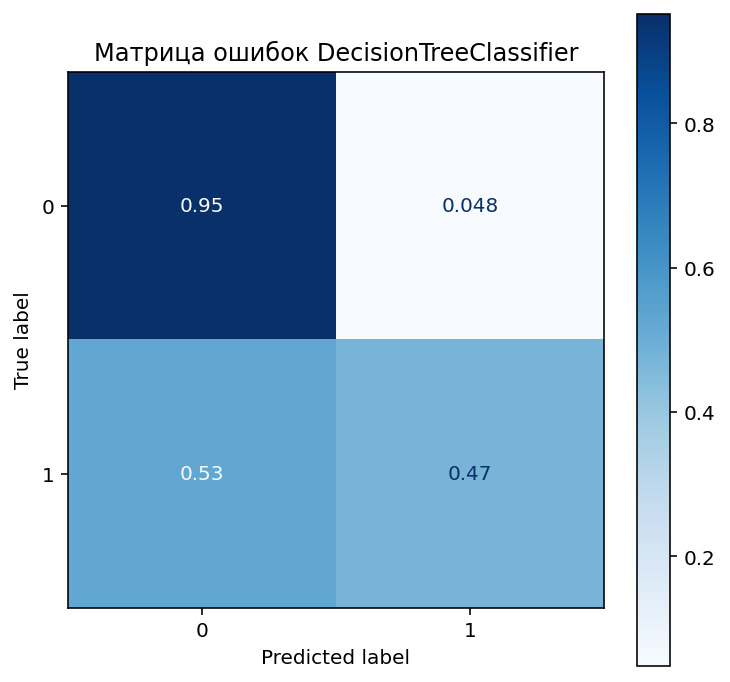

In [94]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN
conf_matrix = plot_confusion_matrix(estimator=model, X=valid_features, y_true=valid_target,
                      normalize='true', cmap='Blues')
conf_matrix.ax_.set_title('Матрица ошибок DecisionTreeClassifier')
None

In [95]:
#Обучение модели случайного леса
estim_best = 0
depth_best = 0

for estim in range (60, 63):
    for depth in range(10, 12):
        model = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345)
        model.fit(train_features, train_target)
        prediction = model.predict(valid_features)
        f1 = f1_score(valid_target, prediction)
        if f1>f1_best:
            f1_best=f1
            estim_best=estim
            depth_best=depth
        

print('n_estimators =', estim_best, 'Max depth', depth_best, 'F1-score', f1_best)

n_estimators = 61 Max depth 11 F1-score 0.5745007680491552


In [96]:
#Проведем оценку accuracy, precision, recall, F1, AUC-ROC на полученных гиперпараметрах
model = RandomForestClassifier(n_estimators=60, max_depth=11, random_state=12345)
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Метрики для модели случайного леса:')
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Метрики для модели случайного леса:
Accuracy 0.861
Precision 0.8017241379310345
Recall 0.4449760765550239
F1 0.5723076923076923
AUC-ROC 0.8476475783182816


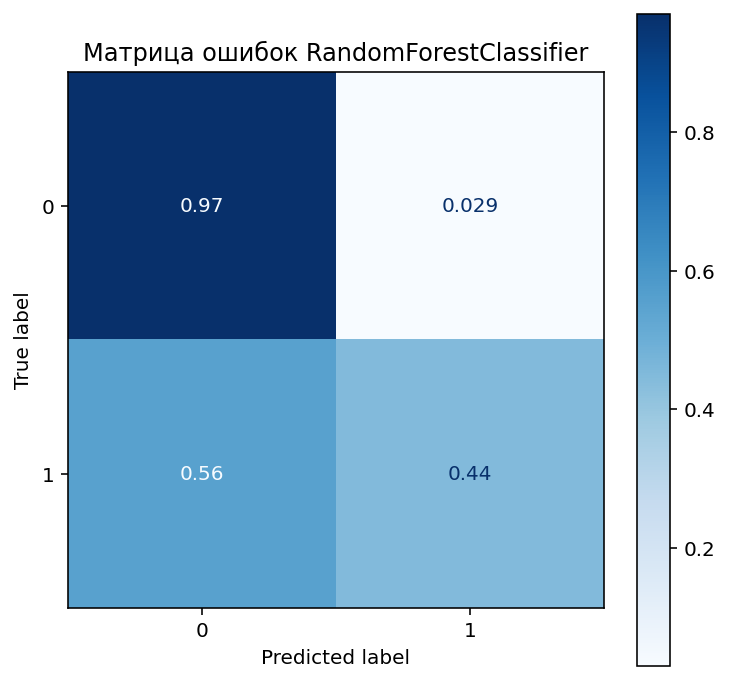

In [97]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN
conf_matrix = plot_confusion_matrix(estimator=model, X=valid_features, y_true=valid_target,
                      normalize='true', cmap='Blues')
conf_matrix.ax_.set_title('Матрица ошибок RandomForestClassifier')
None

In [98]:
#Обучение и оценка метрик с помощью модели Логистической регрессии
model =  LogisticRegression()
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Метрики для модели логистической регрессии:')
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Метрики для модели логистической регрессии:
Accuracy 0.803
Precision 0.5689655172413793
Recall 0.23684210526315788
F1 0.3344594594594595
AUC-ROC 0.7584745250092244


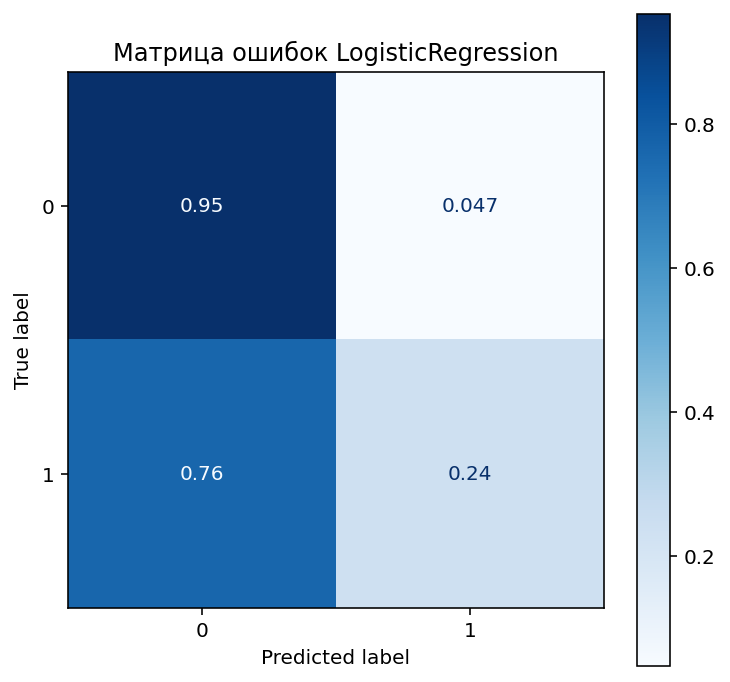

In [99]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN
conf_matrix = plot_confusion_matrix(estimator=model, X=valid_features, y_true=valid_target,
                      normalize='true', cmap='Blues')
conf_matrix.ax_.set_title('Матрица ошибок LogisticRegression')
None

Из-за несбалансированности данных, все модели имеют recall ниже, чем percision, это влияет на F-меру

## Борьба с дисбалансом

1) Обучение моделей с параметром автоматической регулировки весов

In [100]:
# Модель дерева решений
# Подбор гиперпараметров
f1_best = 0
depth_best = 0
for depth in range(2, 18): 
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(train_features, train_target)
    prediction = model.predict(valid_features)
    f1 = f1_score(valid_target, prediction)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

# Расчет метрик
model = DecisionTreeClassifier(random_state=12345, max_depth=depth_best, class_weight='balanced')
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Метрики для модели дерева решений:')
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Max depth 5 F1-score 0.5963791267305644
Метрики для модели дерева решений:
Accuracy 0.8105
Precision 0.5374280230326296
Recall 0.6698564593301436
F1 0.5963791267305644
AUC-ROC 0.8310244134068074


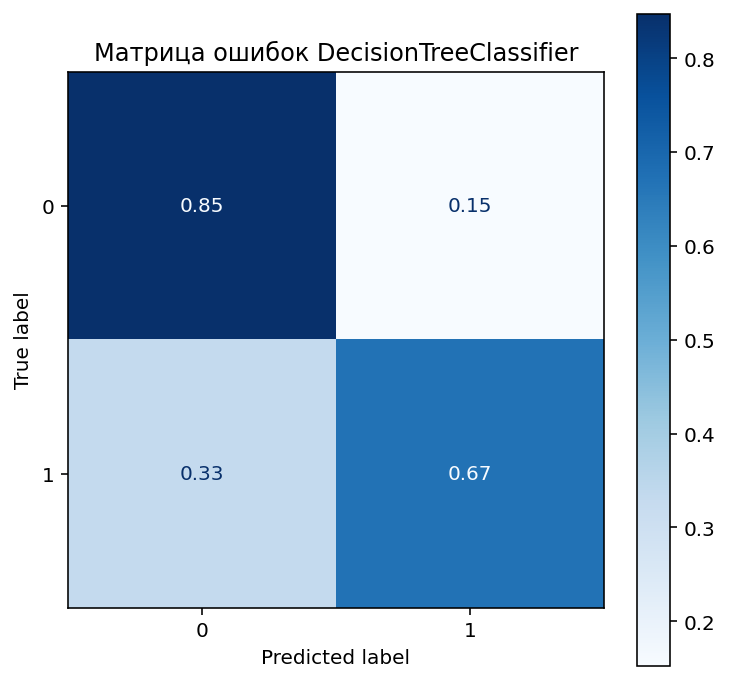

In [101]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN
conf_matrix = plot_confusion_matrix(estimator=model, X=valid_features, y_true=valid_target,
                      normalize='true', cmap='Blues')
conf_matrix.ax_.set_title('Матрица ошибок DecisionTreeClassifier')
None

In [102]:
# Модель случайного леса
# Подбор гиперпараметров
f1_best = 0
estim_best = 0
depth_best = 0

for estim in range (91, 93):
    for depth in range(7, 9):
        model = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345, class_weight='balanced')
        model.fit(train_features, train_target)
        prediction = model.predict(valid_features)
        f1 = f1_score(valid_target, prediction)
        if f1>f1_best:
            f1_best=f1
            estim_best=estim
            depth_best=depth      
print('n_estimators =', estim_best, 'Max depth', depth_best, 'F1-score', f1_best)

# Расчет метрик
model = RandomForestClassifier(n_estimators=estim_best, max_depth=depth_best, random_state=12345, class_weight='balanced')
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Метрики для модели случайного леса:')
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

n_estimators = 92 Max depth 8 F1-score 0.6263736263736264
Метрики для модели случайного леса:
Accuracy 0.83
Precision 0.5792682926829268
Recall 0.6818181818181818
F1 0.6263736263736264
AUC-ROC 0.857053635698256


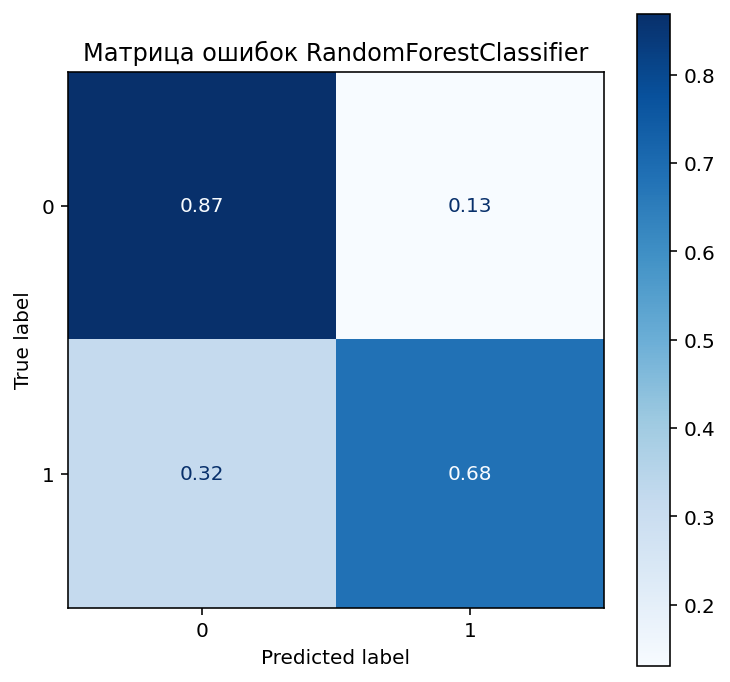

In [103]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN
conf_matrix = plot_confusion_matrix(estimator=model, X=valid_features, y_true=valid_target,
                      normalize='true', cmap='Blues')
conf_matrix.ax_.set_title('Матрица ошибок RandomForestClassifier')
None

In [104]:
# Модель логистической регрессии
model =  LogisticRegression(class_weight='balanced')
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Метрики для модели логистической регрессии:')
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Метрики для модели логистической регрессии:
Accuracy 0.6995
Precision 0.3784860557768924
Recall 0.6818181818181818
F1 0.48676345004269855
AUC-ROC 0.7633393620817934


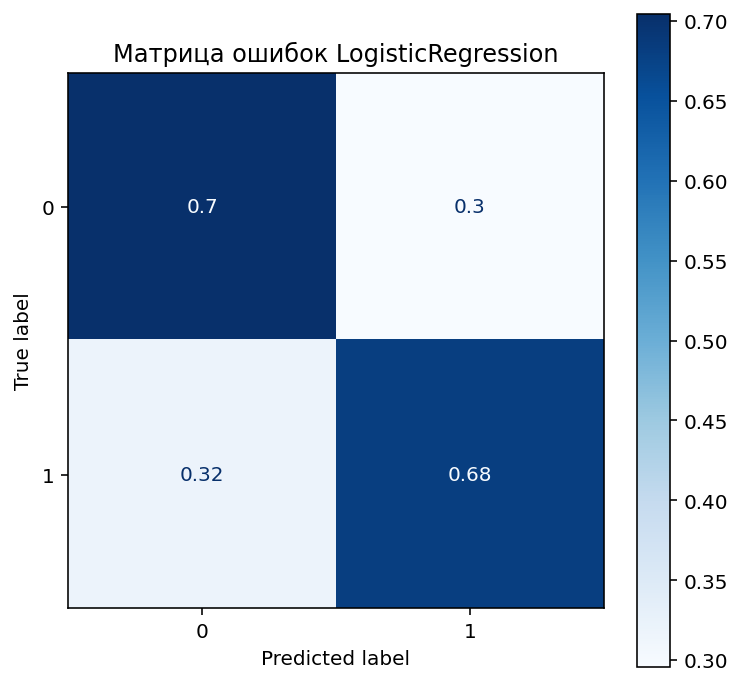

In [105]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN
conf_matrix = plot_confusion_matrix(estimator=model, X=valid_features, y_true=valid_target,
                      normalize='true', cmap='Blues')
conf_matrix.ax_.set_title('Матрица ошибок LogisticRegression')
None

2) Применим функцию Downsampling и уменьшим колличество target=0

In [106]:
def downsampling(features,target,fraction):
    #Разделяем выборку по значениям целевой функции
    features_null=features[target==0]
    features_one=features[target==1]
    target_null=target[target==0]
    target_one=target[target==1]
    
    #уменьшаем путем умножения на десятую часть и соединяем обратно
    downsampling_features=pd.concat([features_null.sample(frac=fraction,random_state=12345)]+[features_one])
    downsampling_target=pd.concat([target_null.sample(frac=fraction,random_state=12345)]+[target_one])
    
    # Перемешиваем
    downsampling_features,downsampling_target=shuffle(downsampling_features,downsampling_target,random_state=12345)
    
    return downsampling_features,downsampling_target

In [107]:
features_balance,target_balance=downsampling(features,target,0.25)

In [108]:
# Модель дерева решений
# Подбор гиперпараметров
f1_best = 0
depth_best = 0
for depth in range(2, 18): #(уменьшила ранг чтобы не грузить сервер, перебрала все заранее)
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_balance,target_balance)
    prediction = model.predict(valid_features)
    f1 = f1_score(valid_target, prediction)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

# Расчет метрик
model = DecisionTreeClassifier(random_state=12345, max_depth=depth_best)
model.fit(features_balance,target_balance)
prediction = model.predict(valid_features)
print('Метрики для модели дерева решений:')
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Max depth 4 F1-score 0.4020304568527919
Метрики для модели дерева решений:
Accuracy 0.7055
Precision 0.3492063492063492
Recall 0.47368421052631576
F1 0.4020304568527919
AUC-ROC 0.6354404212461968


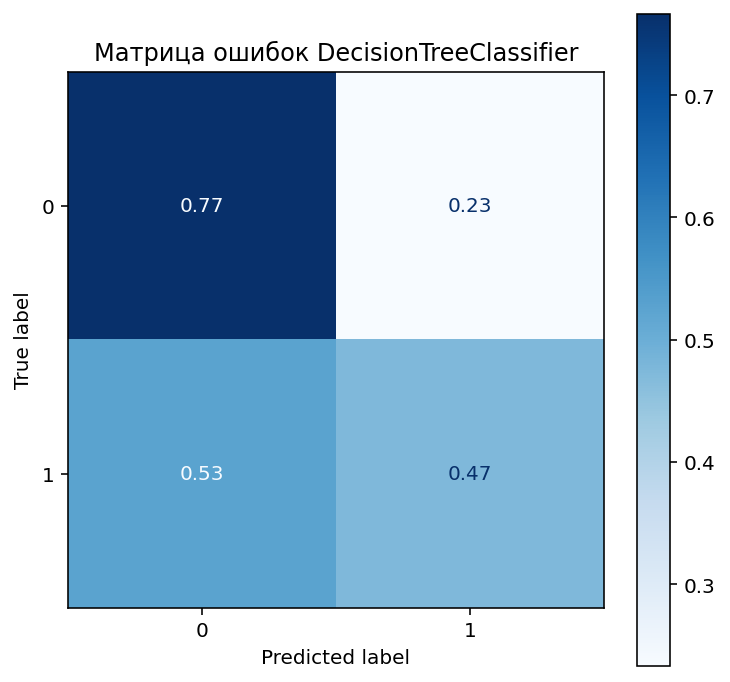

In [109]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN
conf_matrix = plot_confusion_matrix(estimator=model, X=valid_features, y_true=valid_target,
                      normalize='true', cmap='Blues')
conf_matrix.ax_.set_title('Матрица ошибок DecisionTreeClassifier')
None

In [110]:
# Модель случайного леса
# Подбор гиперпараметров
f1_best = 0
estim_best = 0
depth_best = 0

for estim in range (30, 31):
    for depth in range(9, 10):
        model = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345)
        model.fit(features_balance,target_balance)
        prediction = model.predict(valid_features)
        f1 = f1_score(valid_target, prediction)
        if f1>f1_best:
            f1_best=f1
            estim_best=estim
            depth_best=depth      
print('n_estimators =', estim_best, 'Max depth', depth_best, 'F1-score', f1_best)

# Расчет метрик
model = RandomForestClassifier(n_estimators=estim_best, max_depth=depth_best, random_state=12345)
model.fit(features_balance,target_balance)
prediction = model.predict(valid_features)
print('Метрики для модели случайного леса:')
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

n_estimators = 30 Max depth 9 F1-score 0.28424908424908424
Метрики для модели случайного леса:
Accuracy 0.5115
Precision 0.20485744456177402
Recall 0.46411483253588515
F1 0.28424908424908424
AUC-ROC 0.5323654570859974


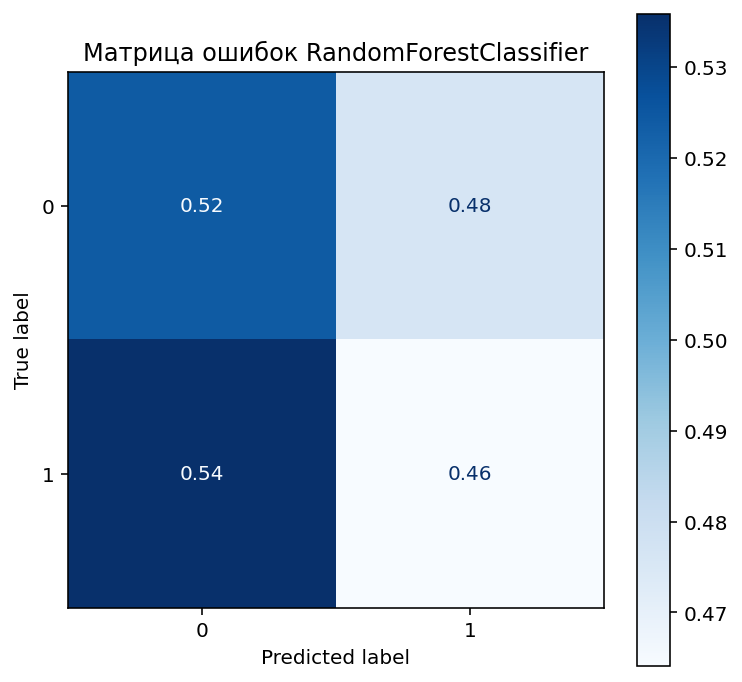

In [111]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN
conf_matrix = plot_confusion_matrix(estimator=model, X=valid_features, y_true=valid_target,
                      normalize='true', cmap='Blues')
conf_matrix.ax_.set_title('Матрица ошибок RandomForestClassifier')
None

In [112]:
# Модель логистической регрессии
model =  LogisticRegression()
model.fit(features_balance,target_balance)
prediction = model.predict(valid_features)
print('Метрики для модели логистической регрессии:')
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Метрики для модели логистической регрессии:
Accuracy 0.672
Precision 0.3596698113207547
Recall 0.7296650717703349
F1 0.48183254344391785
AUC-ROC 0.7451502852061772


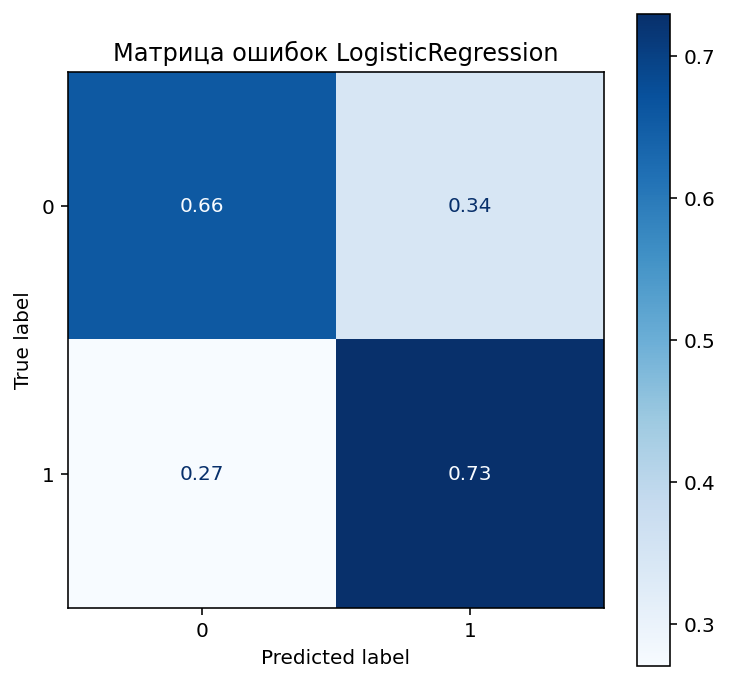

In [113]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN
conf_matrix = plot_confusion_matrix(estimator=model, X=valid_features, y_true=valid_target,
                      normalize='true', cmap='Blues')
conf_matrix.ax_.set_title('Матрица ошибок LogisticRegression')
None

Метрики стали хуже, такой баланс данных не подходит

3) Применим функцию Upsampling увеличим колличество target=0

In [114]:
def upsampling (features,target,repeat):
    #Разделяем выборку по значениям целевой функции
    target_one=target[target==1]
    target_null=target[target==0]
    features_one=features[target==1]
    features_null=features[target==0]
    
    #Увеличиваем и соединяем обратно
    upsampling_features=pd.concat([features_null]+[features_one]*repeat)
    upsampling_target=pd.concat([target_null]+[target_one]*repeat)
    
    # Перемешиваем
    upsampling_features,upsampling_target=shuffle(upsampling_features,upsampling_target,random_state=12345)
    
    return upsampling_features,upsampling_target

In [115]:
features_balance,target_balance=upsampling(train_features,train_target,4)

In [116]:
# Модель дерева решений
# Подбор гиперпараметров
f1_best = 0
depth_best = 0
for depth in range(4, 8):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_balance,target_balance)
    prediction = model.predict(valid_features)
    f1 = f1_score(valid_target, prediction)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

# Расчет метрик
model = DecisionTreeClassifier(random_state=12345, max_depth=depth_best)
model.fit(features_balance,target_balance)
prediction = model.predict(valid_features)
print('Метрики для модели дерева решений:')
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))
fpr_tree, tpr_tree, thresholds = roc_curve(valid_target, probabilities_valid)

Max depth 5 F1-score 0.5963791267305644
Метрики для модели дерева решений:
Accuracy 0.8105
Precision 0.5374280230326296
Recall 0.6698564593301436
F1 0.5963791267305644
AUC-ROC 0.8310244134068074


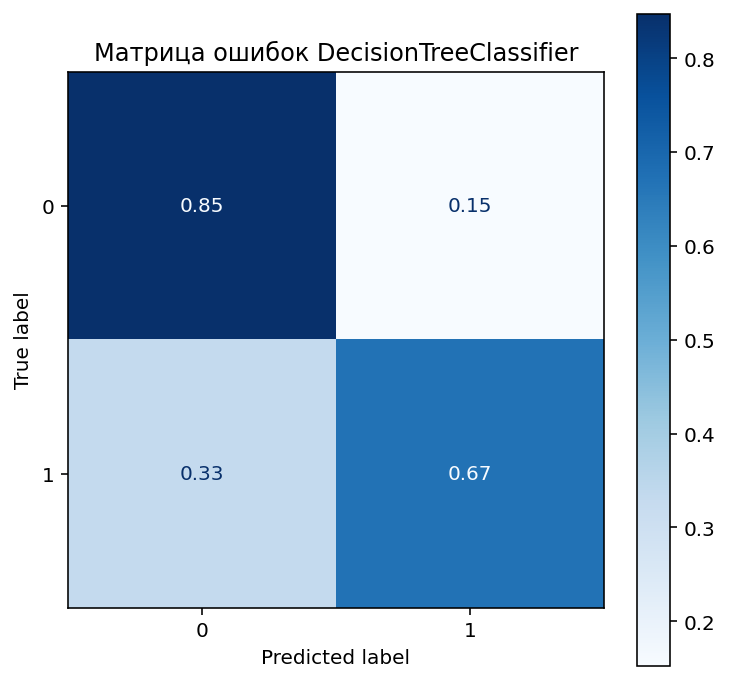

In [117]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN
conf_matrix = plot_confusion_matrix(estimator=model, X=valid_features, y_true=valid_target,
                      normalize='true', cmap='Blues')
conf_matrix.ax_.set_title('Матрица ошибок DecisionTreeClassifier')
None

In [118]:
# Модель случайного леса
# Подбор гиперпараметров
f1_best = 0
estim_best = 0
depth_best = 0

for estim in range (56, 58):
    for depth in range(8, 10):
        model = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345)
        model.fit(features_balance,target_balance)
        prediction = model.predict(valid_features)
        f1 = f1_score(valid_target, prediction)
        if f1>f1_best:
            f1_best=f1
            estim_best=estim
            depth_best=depth      
print('n_estimators =', estim_best, 'Max depth', depth_best, 'F1-score', f1_best)

# Расчет метрик
model = RandomForestClassifier(n_estimators=estim_best, max_depth=depth_best, random_state=12345)
model.fit(features_balance,target_balance)
prediction = model.predict(valid_features)
print('Метрики для модели случайного леса:')
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))
fpr_forest, tpr_forest, thresholds = roc_curve(valid_target, probabilities_valid)

n_estimators = 56 Max depth 9 F1-score 0.6209081309398099
Метрики для модели случайного леса:
Accuracy 0.8205
Precision 0.555765595463138
Recall 0.7033492822966507
F1 0.6209081309398099
AUC-ROC 0.8515559312601698


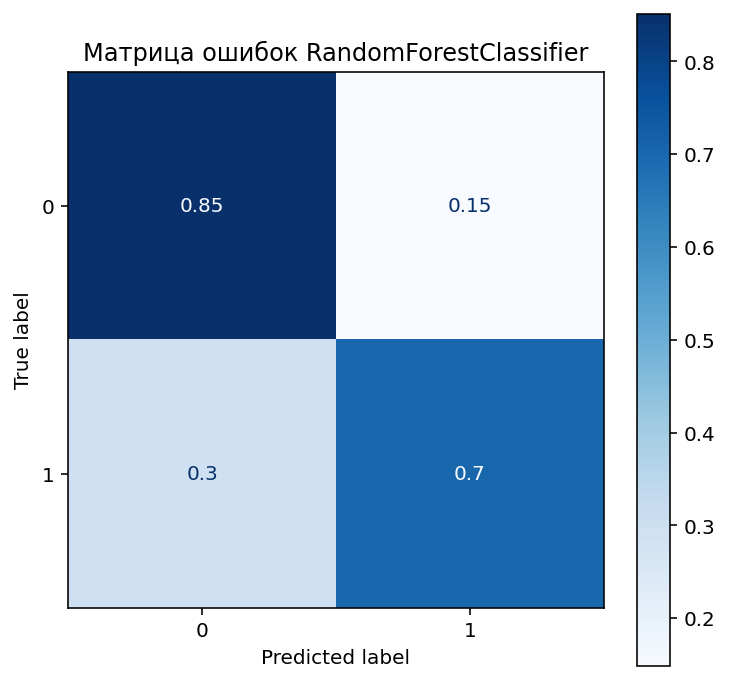

In [119]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN
conf_matrix = plot_confusion_matrix(estimator=model, X=valid_features, y_true=valid_target,
                      normalize='true', cmap='Blues')
conf_matrix.ax_.set_title('Матрица ошибок RandomForestClassifier')
None

In [120]:
# Модель логистической регрессии
model =  LogisticRegression()
model.fit(features_balance,target_balance)
prediction = model.predict(valid_features)
print('Метрики для модели логистической регрессии:')
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, prediction))
fpr_log, tpr_log, thresholds = roc_curve(valid_target, probabilities_valid)

Метрики для модели логистической регрессии:
Accuracy 0.6995
Precision 0.37783711615487314
Recall 0.6770334928229665
F1 0.4850042844901457
AUC-ROC 0.6912348247932785


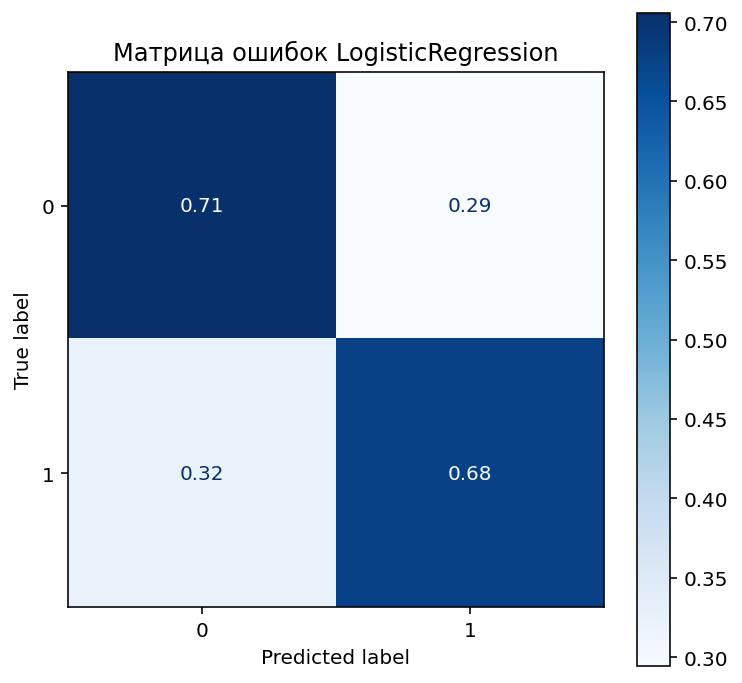

In [121]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN
conf_matrix = plot_confusion_matrix(estimator=model, X=valid_features, y_true=valid_target,
                      normalize='true', cmap='Blues')
conf_matrix.ax_.set_title('Матрица ошибок LogisticRegression')
None

In [122]:
result_f1 = pd.DataFrame({'model_name': ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression'],
                       'Imbalance': [0.5722, 0.5723, 0.33], 'Weighing': [0.59, 0.62, 0.48], 
                          'Downsampling ': [0.40, 0.28, 0.48], 'Upsampling ': [0.59, 0.62, 0.48]})
result_f1

model_name  Imbalance  Weighing  Downsampling   Upsampling 
0  DecisionTreeClassifier     0.5722      0.59           0.40         0.59
1  RandomForestClassifier     0.5723      0.62           0.28         0.62
2      LogisticRegression     0.3300      0.48           0.48         0.48

In [123]:
result_auc = pd.DataFrame({'model_name': ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression'],
                       'Imbalance': [0.78, 0.84, 0.75], 'Weighing': [0.83, 0.85, 0.76], 
                          'Downsampling ': [0.63, 0.53, 0.74], 'Upsampling ': [0.83, 0.85, 0.69]})
result_auc

model_name  Imbalance  Weighing  Downsampling   Upsampling 
0  DecisionTreeClassifier       0.78      0.83           0.63         0.83
1  RandomForestClassifier       0.84      0.85           0.53         0.85
2      LogisticRegression       0.75      0.76           0.74         0.69

<Figure size 432x432 with 0 Axes>

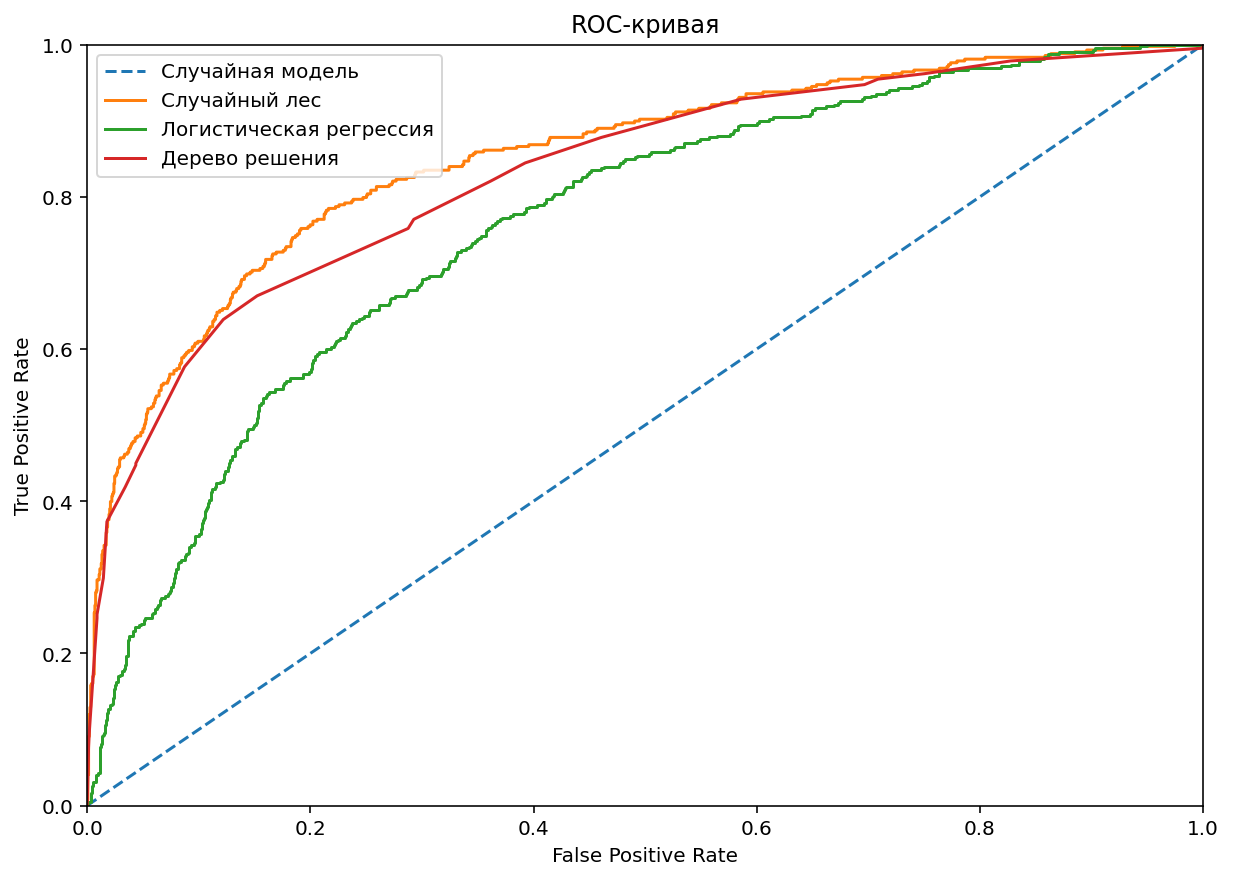

In [124]:
#Визуализируем AUC-ROC посредством графика площади

plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_forest,tpr_forest)
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_tree,tpr_tree)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес','Логистическая регрессия','Дерево решения'),
           loc= 'upper left') 
plt.show()

Наилучшее качество модели было достигнуто при взвешивании классов параметром class_weight='balanced' с использование модели случайного леса. Так же метрика AUC-ROC случайного леса лучше остальных

## Тестирование модели

In [125]:
#Обучим финальную модель
model_final = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=12345, class_weight='balanced')
model_final.fit(train_features, train_target)
prediction = model_final.predict(valid_features)
print('Метрики финальной модели:')
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model_final.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Метрики финальной модели:
Accuracy 0.8305
Precision 0.5801217038539553
Recall 0.6842105263157895
F1 0.6278814489571899
AUC-ROC 0.8572366152710821


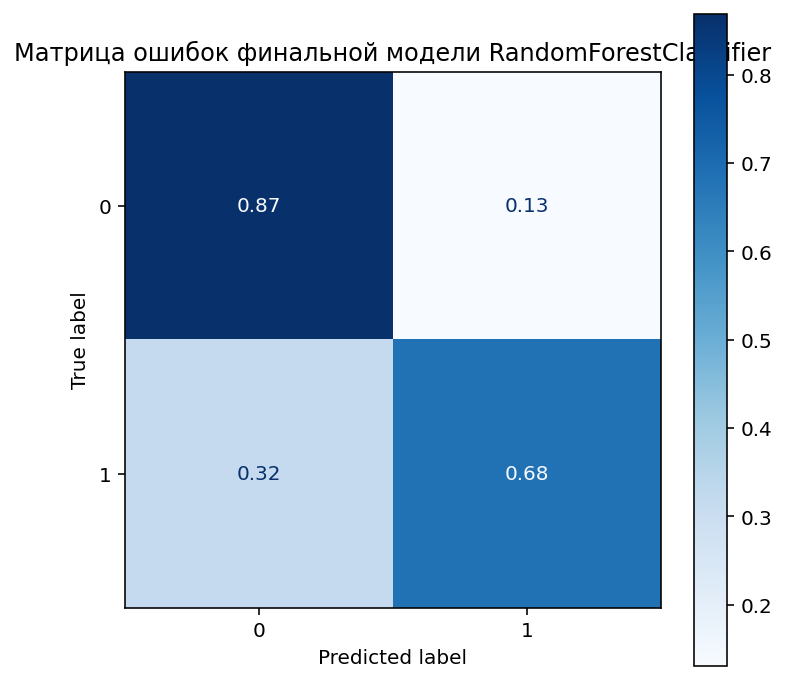

In [126]:
# построим матрицу ошибок, чтобы посмотреть на соотношения TP, TN, FP и FN
conf_matrix = plot_confusion_matrix(estimator=model_final, X=valid_features, y_true=valid_target,
                      normalize='true', cmap='Blues')
conf_matrix.ax_.set_title('Матрица ошибок финальной модели RandomForestClassifier')
None

### Проверка на адекватность

In [127]:
#Создаем константную модель
target_predict_constant = pd.Series([0]*len(valid_target))
target_predict_constant.value_counts()

0    2000
dtype: int64

In [128]:
#Сравним показатель точности (accuracy_score) константной модели и финальной
print('accuracy_score константой модели:', accuracy_score(valid_target, target_predict_constant))
print('accuracy_score финальной модели:', accuracy_score(valid_target, prediction))

accuracy_score константой модели: 0.791
accuracy_score финальной модели: 0.8305


In [129]:
#Сравним AUC-ROC, остальные метрики не работают на константной модели.
print('AUC-ROC константой модели:', roc_auc_score(valid_target, target_predict_constant))
print('AUC-ROC финальной модели:', roc_auc_score(valid_target, probabilities_valid))

AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.8572366152710821


Метрики финальной модели лучше, чем константной, соответственно, модель является адекватной

### Тестируем модель

In [130]:
model_final
prediction = model_final.predict(test_features)
print('Метрики для тестирования модели:')
print('Accuracy', accuracy_score(test_target, prediction))
print('Precision', precision_score(test_target, prediction))
print('Recall', recall_score(test_target, prediction))
print('F1', f1_score(test_target, prediction))
probabilities_valid = model_final.predict_proba(test_features)[:, 1]
print("AUC-ROC", roc_auc_score(test_target, probabilities_valid))
fpr, tpr, thresholds = roc_curve(test_target, probabilities_valid)

Метрики для тестирования модели:
Accuracy 0.82
Precision 0.5618860510805501
Recall 0.6761229314420804
F1 0.6137339055793991
AUC-ROC 0.857392991150867


<Figure size 432x432 with 0 Axes>

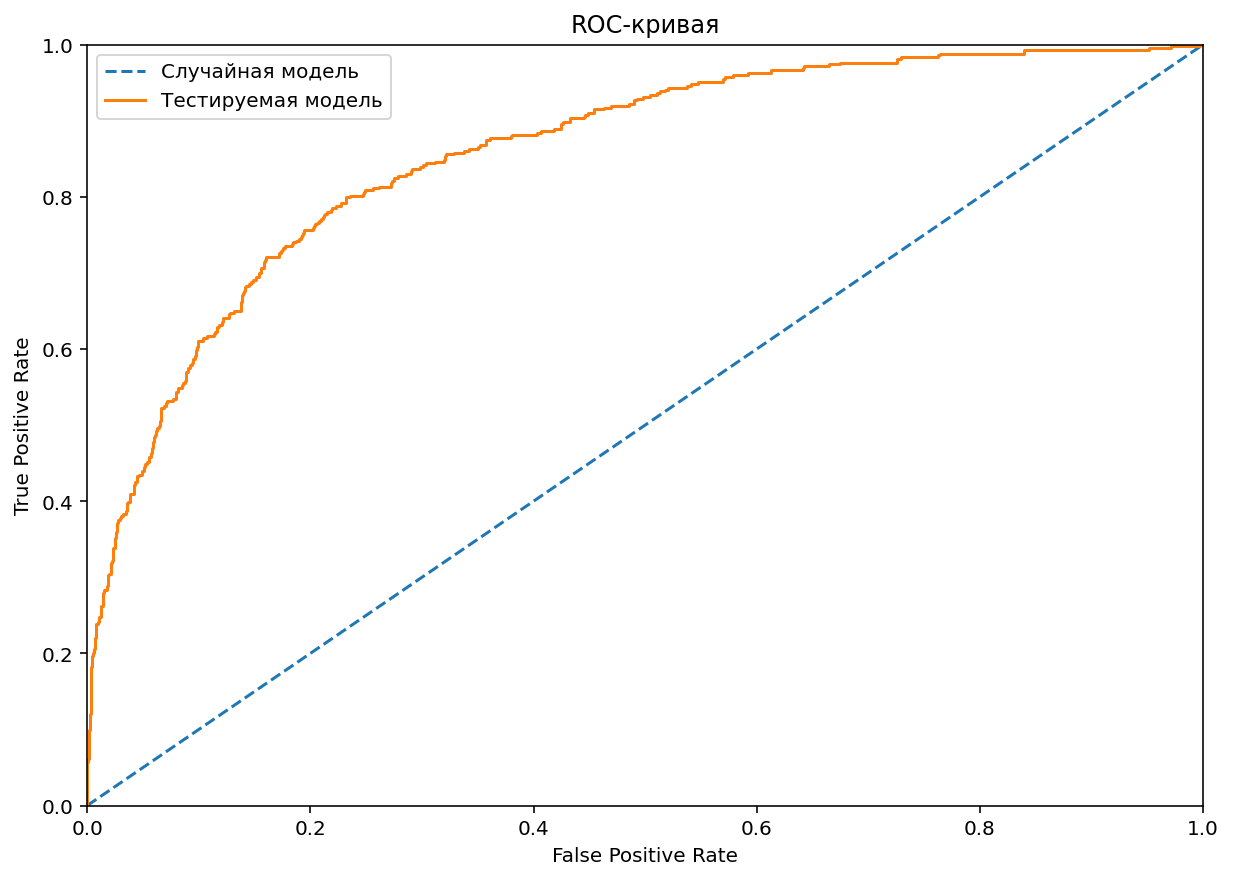

In [131]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Тестируемая модель'),
           loc= 'upper left') 
plt.show()

In [132]:
f_importances_test = model_final.feature_importances_
f_importances_test = pd.Series(data=f_importances_test.T, index=test_features.columns, name='feature_importance')
f_importances_test.sort_values(ascending=False).head(4).to_frame()

feature_importance
age                         0.359329
num_of_products             0.214829
balance                     0.100624
is_active_member            0.071035

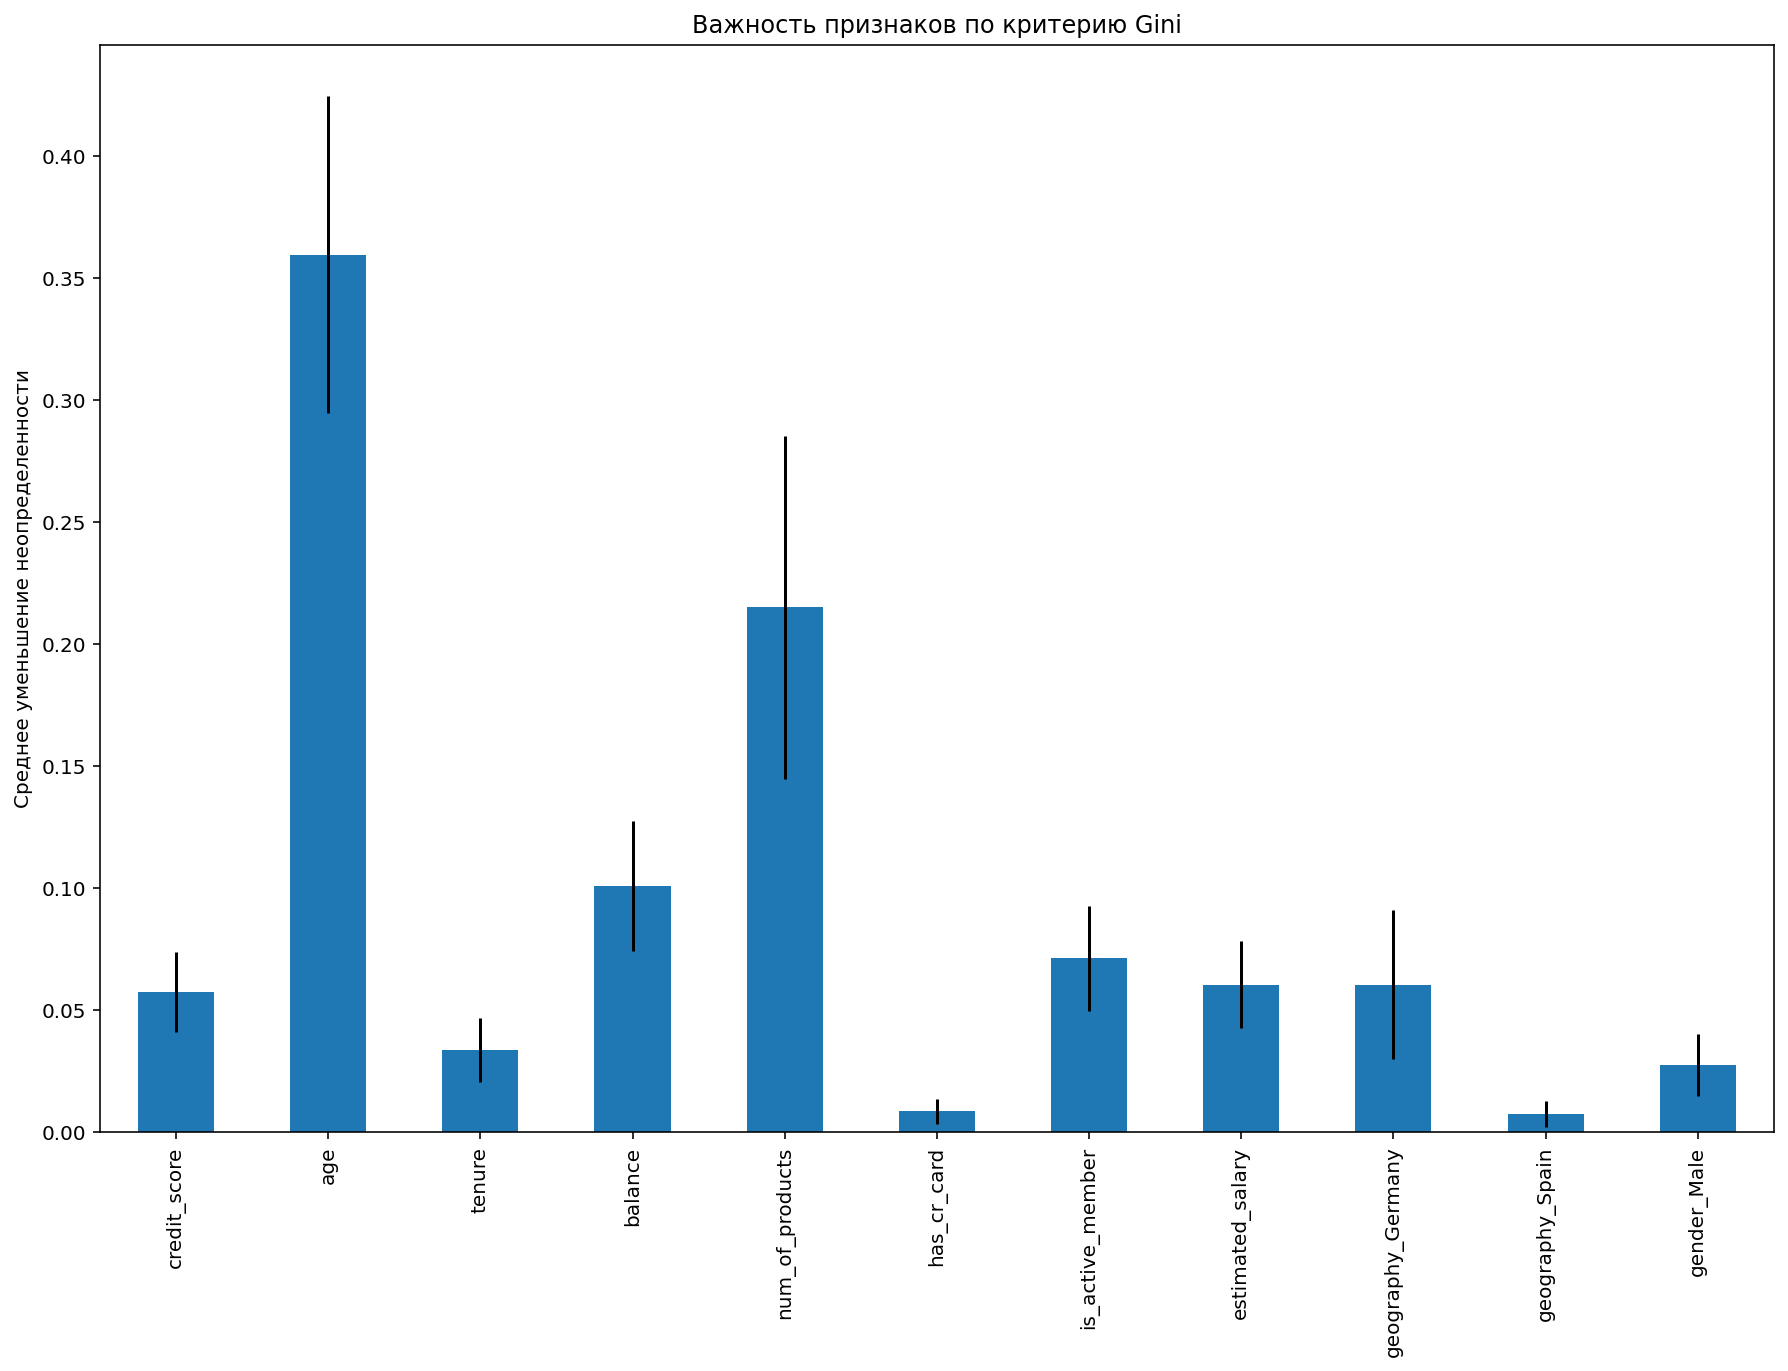

In [133]:
importances = model_final.feature_importances_

forest_importances = pd.Series(importances, index=test_features.columns)
std = np.std([tree.feature_importances_ for tree in model_final.estimators_], axis=0)

forest_importances.plot.bar(yerr=std, figsize=(15,10))
plt.title("Важность признаков по критерию Gini")
plt.ylabel("Cреднее уменьшение неопределенности")
plt.show()

### Вывод:

    Модели со сбалансированными данными путем увеличения количества недостающих классов показали себя лучше других видов баланса и несбалансированных моделей. 
    Модель характеризуется высоким показателем полноты = 0.67 (min = 0, max = 1), поэтому она с высокой вероятностью предскажит уход клиента из банка.
    Показатель точности невысокий = 0.56 (min = 0, max = 1) — модель верно предсказывает только половину ухода клиентов.
    С точки зрения бизнеса полученная модель поможет маркетологам лучше определять килентов, которые могут уйти в ближайшее время. Важно, что модель покрывает большое количество клиентов, в данном случае это важнее чем точность.
    
    Для улучшения модели следует использовать данные, отражающие отношения клиента с банком в динамике.

## Вывод по результатам исследования

    В первоначальные данных наблюдался значительный дисбаланс (80% ответов целевого признака были негативными и только 20% позитивными), из-за чего обученная на этих данных модель не проходила проверку на адекватность. Все модели не первоначальных данных характеризовались высокой степенью ошибок и низким качеством взвешенной величины (F1) — модели показывали низкие результаты точности и полноты.

    Мы устранили дисбаланс классов в обучающей выборки методом увеличения количества недостающих классов. 

    На новых данных все модели показали результат выше, чем на несбалансированной выборке. Лучшие показатели были у модели случайного леса.

    Было принято решение продолжать улучшение модели на основании алгоритма случайный лес (RandomForestClassifier)

    Финальные параметры выбранной модели RandomForestClassifier(n_estimators=100, max_depth=8, random_state=12345, class_weight='balanced')

    Финальная модель прошла проверку на адекватность в сравнении с контантной моделью: accuracy_score константой модели < accuracy_score финальной модели.
    AUC-ROC константой модели: 0.5 < AUC-ROC финальной модели